# PROJECT ON AMAZON REVIEW DATASET - SENTIMENT ANALYSIS 

## This project is focused mainly on categorizing types of customers with respect to sentiment based on predicting the sentiment from review text..

## Description

##### Amazon gives a platform to small businesses and companies with modest resources to grow larger. And Because of its popularity, people actually spend time and write detailed reviews, about the brand and the product. So, by analyzing that data we can tell companies a lot about their products and also the ways to enhance the quality of the product. But that large amount of data can not be analyzed by a person.

##### This dataset contains product reviews and metadata from Amazon, including 142.8 million reviews spanning May 1996 - July 2018.

##### This dataset includes reviews (ratings, text, helpfulness votes), product metadata (descriptions, category information, price, brand, and image features), and links (also viewed/also bought graphs).

# K-cores
    
#### These data have been reduced to extract the k-core, such that each of the remaining users and items have k reviews each.



## Ratings only 

#### These datasets include no metadata or reviews, but only (user,item,rating,timestamp) tuples. Thus they are suitable for use with mymedialite (or similar) packages.



# Importing the required libraries for initial process

In [37]:
import json
import gzip
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import re
import string
from nltk.corpus import stopwords
import spacy
from spacy.lang.en import English
import nltk
from textblob import TextBlob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Importing and loading the data

## Loading the Toy review data

In [2]:
df=pd.read_json('Toys_and_Games_5.json.gz',lines=True,nrows=100000)
df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5,3,True,"10 6, 2013",A2LSCFZM2FBZK7,0486427706,{'Format:': ' Paperback'},Ginger,The stained glass pages are pretty cool. And i...,Nice book,1381017600,NaN
1,5,9,True,"08 9, 2013",A3IXP5VS847GE5,0486427706,{'Format:': ' Paperback'},Dragonflies &amp; Autumn Leaves,My 11 y.o. loved this...and so do I (you know ...,Great pictures,1376006400,NaN
2,5,NaN,True,"04 5, 2016",A1274GG1EB2JLJ,0486427706,{'Format:': ' Paperback'},barbara ann,"The pictures are great , I've done one and gav...","The pictures are great, I've done one and gave...",1459814400,NaN
3,5,3,True,"02 13, 2016",A30X5EGBYAZQQK,0486427706,{'Format:': ' Paperback'},Samantha,I absolutely love this book! Its translucent p...,So beautiful!,1455321600,NaN
4,5,NaN,True,"12 10, 2015",A3U6UNXLAUY6ZV,0486427706,{'Format:': ' Paperback'},CP in Texas,I love it!,Five Stars,1449705600,NaN


The Toy review data contains 1 Lakh observations of review along with reviewer information in terms of name,Id,genuiness. Also we have product id as 'asin', rating from customers in terms of 'overall', the date at when review was given.

the description of features are as follows:

reviewerID - ID of the reviewer

asin - ID of the product
reviewerName - name of the reviewer

vote - helpful votes of the review

style - a disctionary of the product metadata

reviewText - text of the review

overall - rating of the product

summary - summary of the review

unixReviewTime - time of the review (unix time)

reviewTime - time of the review (raw)

image - images that users post after they have received the product

## Loading the Video Games review data

In [3]:
df2=pd.read_json('Video_Games_5.json.gz',lines=True,nrows=100000)
df2.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN
1,4,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN
2,3,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN
3,2,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN
4,5,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN


Similar to Toy data, we have everything in the loaded Video games review data

## Loading the Meta Data of toys ande games category 

In [4]:
df3=pd.read_json('meta_Toys_and_Games.json.gz',lines=True,nrows=100000)
df3.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"[Toys & Games, Puzzles, Jigsaw Puzzles]",,"[Three Dr. Suess' Puzzles: Green Eggs and Ham,...",,Dr. Suess 19163 Dr. Seuss Puzzle 3 Pack Bundle,[],,Dr. Seuss,"[Three giant floor puzzles, Includes: Dr. Sues...","[>#2,230,717 in Toys & Games (See Top 100 in T...",[],Toys & Games,,,,0000191639,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
1,[],,[<b>Prepare to be Afraid!</b><br /><br />The B...,,Pathfinder: Book of Beasts - Legendary Foes,[],,Pathfinder Roleplaying Jon Brazer Productions,[],"[>#2,294,535 in Toys & Games (See Top 100 in T...",[],Toys & Games,,,.a-box-inner{background-color:#fff}#alohaBuyBo...,0004950763,[],[],NaN
2,[],,[],,Nursery Rhymes Felt Book,[],,Betty Lukens,[],"[>#2,871,983 in Toys & Games (See Top 100 in T...",[],Toys & Games,,,.a-box-inner{background-color:#fff}#alohaBuyBo...,0005069491,[],[],NaN
3,"[Toys & Games, Games, Card Games]",,[Blitz Vintage Card Game],,Dutch Blitz Card Game,[B00WIIPQEC],,Dutch Blitz Games Co,[],"[>#376,337 in Toys & Games (See Top 100 in Toy...","[B000BBU0KS, B00NQQTZ5G, B00WIIPQEC, B001VIWAO...",Toys & Games,"class=""a-bordered a-horizontal-stripes a-spa...",,$24.95,0004983289,[],[],NaN
4,[],,"[Marvel SuperHeroes themed ""magic ink"" colorin...",,Magic Pen Painting (Marvel Super Heroes),"[B009SB7TI8, B009SB8Z1I]",,Lee Publications,[],"[>#934,954 in Toys & Games (See Top 100 in Toy...",[],Toys & Games,,,$4.92,0006466222,[],[],NaN


The meta data contains some main features which area as follows:

asin - ID of the product

title - name of the product

feature - bullet-point format features of the product

description - description of the product

price - price in US dollars (at time of crawl)

imageURL - url of the product image

related - related products (also bought, also viewed, bought together, buy after viewing)

salesRank - sales rank information

brand - brand name

categories - list of categories the product belongs to

tech1 - the first technical detail table of the product

tech2 - the second technical detail table of the product

similar - similar product table

# Loading the meta review data of video games category

In [5]:
df4=pd.read_json('meta_Video_Games.json.gz',lines=True,nrows=100000)
df4.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"[Video Games, PC, Games]",,[],,Reversi Sensory Challenger,[],,Fidelity Electronics,[],"[>#2,623,937 in Toys &amp; Games (See Top 100 ...",[],Toys &amp; Games,,,,0042000742,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
1,"[Video Games, Xbox 360, Games, </span></span><...",,[Brand new sealed!],,Medal of Honor: Warfighter - Includes Battlefi...,[B00PADROYW],,by\n \n EA Games,[],"[>#67,231 in Video Games (See Top 100 in Video...","[B0050SY5BM, B072NQJCW5, B000TI836G, B002SRSQ7...",Video Games,,,"\n\t\t\t\t\t\t\t\t\t\t\t\t<span class=""vertica...",0078764343,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
2,"[Video Games, Retro Gaming & Microconsoles, Su...",,[],,street fighter 2 II turbo super nintendo snes ...,[],,Nintendo,[],"[>#134,433 in Video Games (See Top 100 in Vide...",[],Video Games,,,$0.72,0276425316,[],[],NaN
3,"[Video Games, Xbox 360, Accessories, Controlle...",,[MAS's Pro Xbox 360 Stick (Perfect 360 Stick) ...,,Xbox 360 MAS STICK,[],,by\n \n MAS SYSTEMS,[Original PCB used from Xbox 360 Control Pad (...,"[>#105,263 in Video Games (See Top 100 in Vide...",[],Video Games,,,,0324411812,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
4,"[Video Games, PC, Games, </span></span></span>...",,"[Phonics Alive! 3, The Speller teaches student...",,Phonics Alive! 3: The Speller,[],,by\n \n Advanced Software Pty. Ltd.,"[Grades 2-12, Spelling Program, Teaches Spelli...","[>#92,397 in Video Games (See Top 100 in Video...",[B000BCZ7U0],Video Games,,,,0439335310,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN


This meta also contains the feeatures similar to toy meta data

# Loading the ratings only data from Toys and games category

In [7]:
#Loading the data
df5=pd.read_csv('Toys_and_Games.csv',header=None,nrows=100000)

#Naming the columns by information
df5.rename(columns={0:'asin',1:'reviewerID',2:'overall',3:'unixReviewTime'},inplace=True)
df5.head()

,asin,reviewerID,overall,unixReviewTime
0,0020232233,A1IDMI31WEANAF,2.0,1474502400
1,0020232233,A4BCEVVZ4Y3V3,1.0,1474156800
2,0020232233,A2EZ9PY1IHHBX0,3.0,1473638400
3,0020232233,A139PXTTC2LGHZ,5.0,1488412800
4,0020232233,A3IB33V29XIL8O,1.0,1486512000


# Loading the video games - rating only data

In [8]:
#Loading the data
df6=pd.read_csv('Video_Games.csv',header=None)

#Naming the columns by information
df6.rename(columns={0:'asin',1:'reviewerID',2:'overall',3:'unixReviewTime'},inplace=True)
df6.head()

,asin,reviewerID,overall,unixReviewTime
0,0439381673,A21ROB4YDOZA5P,1.0,1402272000
1,0439381673,A3TNZ2Q5E7HTHD,3.0,1399680000
2,0439381673,A1OKRM3QFEATQO,4.0,1391731200
3,0439381673,A2XO1JFCNEYV3T,1.0,1391731200
4,0439381673,A19WLPIRHD15TH,4.0,1389830400


# Data Preprocessing

## Cleaning the Toy Review Data

In [9]:
#understanding the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         100000 non-null  int64 
 1   vote            13325 non-null   object
 2   verified        100000 non-null  bool  
 3   reviewTime      100000 non-null  object
 4   reviewerID      100000 non-null  object
 5   asin            100000 non-null  object
 6   style           43282 non-null   object
 7   reviewerName    99991 non-null   object
 8   reviewText      99980 non-null   object
 9   summary         99988 non-null   object
 10  unixReviewTime  100000 non-null  int64 
 11  image           1244 non-null    object
dtypes: bool(1), int64(2), object(9)
memory usage: 8.5+ MB


The data contains overall and unix review time as interger type , verified feature as boolean and the remaining data in the form of object type. Also we have many null values which we analyse and treat in upcoming steps

In [10]:
#Visualizing the percentage of null values 
df.isnull().sum()*100/100000

overall            0.000
vote              86.675
verified           0.000
reviewTime         0.000
reviewerID         0.000
asin               0.000
style             56.718
reviewerName       0.009
reviewText         0.020
summary            0.012
unixReviewTime     0.000
image             98.756
dtype: float64

The dataset contains null values of 86% in vote feature, 56% in style, 98% in image feature which makes it difficult for imputation and less than 1% in name, reviewtext, and in summary data. 

### Dropping unnecessary and null containing features and standardizing the date 

In [11]:
#dropping selected columns
df.drop(labels=['vote','style','image','reviewerName','summary'],axis=1,inplace=True)

#replacing reviewTime values with standard format from unix review time
df['reviewTime']=df['unixReviewTime'].apply(lambda x:pd.to_datetime(x,unit='s'))

#dropping the unix time column after extraction
df.drop(labels='unixReviewTime',axis=1,inplace=True)
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewText
0,5,True,2013-10-06,A2LSCFZM2FBZK7,0486427706,The stained glass pages are pretty cool. And i...
1,5,True,2013-08-09,A3IXP5VS847GE5,0486427706,My 11 y.o. loved this...and so do I (you know ...
2,5,True,2016-04-05,A1274GG1EB2JLJ,0486427706,"The pictures are great , I've done one and gav..."
3,5,True,2016-02-13,A30X5EGBYAZQQK,0486427706,I absolutely love this book! Its translucent p...
4,5,True,2015-12-10,A3U6UNXLAUY6ZV,0486427706,I love it!


In [12]:
#dropping the null review text data and resetting index
df=df[df['reviewText'].notnull()]
df.reset_index(drop=True)
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewText
0,5,True,2013-10-06,A2LSCFZM2FBZK7,0486427706,The stained glass pages are pretty cool. And i...
1,5,True,2013-08-09,A3IXP5VS847GE5,0486427706,My 11 y.o. loved this...and so do I (you know ...
2,5,True,2016-04-05,A1274GG1EB2JLJ,0486427706,"The pictures are great , I've done one and gav..."
3,5,True,2016-02-13,A30X5EGBYAZQQK,0486427706,I absolutely love this book! Its translucent p...
4,5,True,2015-12-10,A3U6UNXLAUY6ZV,0486427706,I love it!


In [13]:
#checking for data after initial cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99980 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   overall     99980 non-null  int64         
 1   verified    99980 non-null  bool          
 2   reviewTime  99980 non-null  datetime64[ns]
 3   reviewerID  99980 non-null  object        
 4   asin        99980 non-null  object        
 5   reviewText  99980 non-null  object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(3)
memory usage: 4.7+ MB


From above information, we can see that after cleaning , we get 6 features with 99.998 thousand observations and review time in datetime format

## Cleaning the Video games review data

Repeating the previous steps for this dataset

In [14]:
#Understanding the data
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         100000 non-null  int64 
 1   verified        100000 non-null  bool  
 2   reviewTime      100000 non-null  object
 3   reviewerID      100000 non-null  object
 4   asin            100000 non-null  object
 5   reviewerName    99999 non-null   object
 6   reviewText      99990 non-null   object
 7   summary         99983 non-null   object
 8   unixReviewTime  100000 non-null  int64 
 9   vote            33645 non-null   object
 10  style           44447 non-null   object
 11  image           302 non-null     object
dtypes: bool(1), int64(2), object(9)
memory usage: 8.5+ MB


The data contains similar datatypes as in toy data. Overall and unix review time as interger type , verified feature as boolean and the remaining data in the form of object type. Also we have many null values which we analyse and treat in upcoming steps.

In [15]:
#Calculate the percentage of null values
df2.isnull().sum()*100/100000

overall            0.000
verified           0.000
reviewTime         0.000
reviewerID         0.000
asin               0.000
reviewerName       0.001
reviewText         0.010
summary            0.017
unixReviewTime     0.000
vote              66.355
style             55.553
image             99.698
dtype: float64

The dataset contains null values of 66% in vote feature, 56% in style, 99% in image feature which makes it difficult for imputation and less than 1% in name, reviewtext, and in summary data. 

### Dropping the data with less information and changing date into standard format

In [16]:
#Dropping certain features
df2.drop(labels=['vote','style','image','reviewerName','summary'],axis=1,inplace=True)

#Extracting date from unix review feature into Review time column
df2['reviewTime']=df2['unixReviewTime'].apply(lambda x:pd.to_datetime(x,unit='s'))

#Dropping unix date column after extraction 
df2.drop(labels='unixReviewTime',axis=1,inplace=True)
df2.head()

,overall,verified,reviewTime,reviewerID,asin,reviewText
0,5,True,2015-10-17,A1HP7NVNPFMA4N,0700026657,"This game is a bit hard to get the hang of, bu..."
1,4,False,2015-07-27,A1JGAP0185YJI6,0700026657,I played it a while but it was alright. The st...
2,3,True,2015-02-23,A1YJWEXHQBWK2B,0700026657,ok game.
3,2,True,2015-02-20,A2204E1TH211HT,0700026657,"found the game a bit too complicated, not what..."
4,5,True,2014-12-25,A2RF5B5H74JLPE,0700026657,"great game, I love it and have played it since..."


In [17]:
#Dropping null text containing observations and resetting index 
df2=df2[df2['reviewText'].notnull()]
df2.reset_index(drop=True)
df2.head()

,overall,verified,reviewTime,reviewerID,asin,reviewText
0,5,True,2015-10-17,A1HP7NVNPFMA4N,0700026657,"This game is a bit hard to get the hang of, bu..."
1,4,False,2015-07-27,A1JGAP0185YJI6,0700026657,I played it a while but it was alright. The st...
2,3,True,2015-02-23,A1YJWEXHQBWK2B,0700026657,ok game.
3,2,True,2015-02-20,A2204E1TH211HT,0700026657,"found the game a bit too complicated, not what..."
4,5,True,2014-12-25,A2RF5B5H74JLPE,0700026657,"great game, I love it and have played it since..."


In [18]:
#checking for data after initial cleaning
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99990 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   overall     99990 non-null  int64         
 1   verified    99990 non-null  bool          
 2   reviewTime  99990 non-null  datetime64[ns]
 3   reviewerID  99990 non-null  object        
 4   asin        99990 non-null  object        
 5   reviewText  99990 non-null  object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(3)
memory usage: 4.7+ MB


We can see that after initial cleaning , we get 6 features with 99.99 thousand observations and review time in datetime format.

# Second round of data cleaning using regex and spacy library

## Cleaning the review text column of toy review data

#### Defining a function to clean the data on the context of grammatical and logical data using regex functions

In [21]:
def text_process(text):
    
    #Remove punctuation
    text=re.sub('[^\w\s]','',text)
    #Remove hashtags
    text=re.sub('#\W+','',text)
    # Remove all non-letters and non-spaces
    text = re.sub("[^a-zA-Z0-9\s ]",'', text)
    # Remove all numbers
    text = re.sub("\d+", "", text)
    #Remove underscore
    text=re.sub('_','',text)
    #Remove urls
    text=re.sub('http\S+','',text)
    #Remove html tags
    text=re.sub('<.*?>','',text)
    # Remove all hyphens except between two words
    text = re.sub("-(?!\w)|(?<!\w)-", "", text)
    # Remove multiple spaces and lowercase everything
    text =re.sub('\s+',' ',text)
    text=text.lower()

    return text

#### Applying the clean function on text column of toy data

In [22]:
df['reviewText']=df['reviewText'].apply(text_process)
df['reviewText'].head()

0    the stained glass pages are pretty cool and it...
1    my yo loved thisand so do i you know i really ...
2    the pictures are great ive done one and gave i...
3    i absolutely love this book its translucent pa...
4                                            i love it
Name: reviewText, dtype: object

We can see that many characters are being removed when applying the clean function and also the text is converted into lowercase to make process more efficient

### Checking for stopwords and appyling lemmatization  using spacy library

In [25]:
#Loading the small english pipeline wich contains tokenization,parsing,nep,stopwords from spacy library 
nlp=spacy.load('en_core_web_sm')

#getting stop words from the library
spacy_words=spacy.lang.en.stop_words.STOP_WORDS

#### Defining a function to convert words into their base word using lemmatization from spacy library

In [30]:
def sp_lem(text):
    txt=nlp(text)
    return ' '.join(token.lemma_ for token in txt)

#### Applying lemmatization function to review text of toy data

In [31]:
df['reviewText']=df['reviewText'].apply(sp_lem)

#### Defining function for removeal of stop words from spacy library

In [32]:
def sp_stp(text):
    filterdata=[]    #creating empty list
    stp=nlp(text)
    for word in stp:
        if word.is_stop==False:
            filterdata.append(word)   #adding non stop words into list
    return ' '.join(i.text for i in filterdata) #joining the tokens into a string

#### Applying the stopWords function to text of toy Data

In [33]:
df['reviewText']=df['reviewText'].apply(sp_stp)

#### Checking the text data after spacy process

In [34]:
df['reviewText'].head()

0    stained glass page pretty cool nice black outl...
1    yo love thisand know buy want picture myselfim...
2                  picture great ve friend like dragon
3    absolutely love book translucent paper super f...
4                                                 love
Name: reviewText, dtype: object

We can see that after spacy process many words are converted into their base words and some common words are removed from data

In [35]:
#checking if there is any null observations in text feature after spacy process
df['reviewText'].isnull().sum()

0

There is no missing observation.

## Defining a function for sentiment analysis using textblob library

In [36]:
def sent_polar(text):
    blob=TextBlob(str(text))
    polar=blob.sentiment.polarity   #assinging polarity value based on text
    return polar
def sent_anal(polar):               #function to define type of review based on polarity
    if polar>0:
        return 'positive'
    elif polar<0:
        return 'negative'
    else:
        return 'neutral'

### applying sentiment analysis using defined function for polarity and type of review

In [37]:
df['polar']=df['reviewText'].apply(sent_polar)
df['sentiment']=df['polar'].apply(sent_anal)

In [38]:
#Looking into data after sentiment analysis
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewText,polar,sentiment
0,5,True,2013-10-06,A2LSCFZM2FBZK7,0486427706,stained glass page pretty cool nice black outl...,0.130952,positive
1,5,True,2013-08-09,A3IXP5VS847GE5,0486427706,yo love thisand know buy want picture myselfim...,0.518519,positive
2,5,True,2016-04-05,A1274GG1EB2JLJ,0486427706,picture great ve friend like dragon,0.800000,positive
3,5,True,2016-02-13,A30X5EGBYAZQQK,0486427706,absolutely love book translucent paper super f...,0.366667,positive
4,5,True,2015-12-10,A3U6UNXLAUY6ZV,0486427706,love,0.500000,positive


In [39]:
#Counting the data based on sentiment
df['sentiment'].value_counts()

positive    84583
negative     9527
neutral      5870
Name: sentiment, dtype: int64

From above, we can see that nearly 84.5k customers have positive sentiment, nearly 9.5k customers have negative sentiment and 6k customers have neutral sentiment which means they are not sure about the product 

### Writing the processed data into csv format

In [41]:
df.to_csv('toys_and_games_review_cleaned.csv',index=False)

### Loading the written data

In [5]:
dfc=pd.read_csv('toys_and_games_review_cleaned.csv')
dfc.head()

,overall,verified,reviewTime,reviewerID,asin,reviewText,polar,sentiment
0,5,True,2013-10-06,A2LSCFZM2FBZK7,0486427706,stained glass page pretty cool nice black outl...,0.130952,positive
1,5,True,2013-08-09,A3IXP5VS847GE5,0486427706,yo love thisand know buy want picture myselfim...,0.518519,positive
2,5,True,2016-04-05,A1274GG1EB2JLJ,0486427706,picture great ve friend like dragon,0.800000,positive
3,5,True,2016-02-13,A30X5EGBYAZQQK,0486427706,absolutely love book translucent paper super f...,0.366667,positive
4,5,True,2015-12-10,A3U6UNXLAUY6ZV,0486427706,love,0.500000,positive


# Second round of cleaning on Video games dataset

Here we are repeating the same steps as done in toy set to export a csv file with cleaned text feature.

### Applying the regex defined function on video games Data

In [43]:
df2['reviewText']=df2['reviewText'].apply(text_process)
df2['reviewText'].head()

0    this game is a bit hard to get the hang of but...
1    i played it a while but it was alright the ste...
2                                              ok game
3    found the game a bit too complicated not what ...
4    great game i love it and have played it since ...
Name: reviewText, dtype: object

The data is processed for punctuation and characters removal which we can see in the above output

### Applying the spacy functions in the data for lemmatization and stop words treatment

In [44]:
#Lemmatization function
df2['reviewText']=df2['reviewText'].apply(sp_lem)

In [45]:
#Stop words treatment function
df2['reviewText']=df2['reviewText'].apply(sp_stp)

In [46]:
#Sampling the output data to check for process
df2['reviewText'].head()

0                             game bit hard hang great
1    play alright steam bit trouble game steam hard...
2                                              ok game
3         find game bit complicated expect having play
4                          great game love play arrive
Name: reviewText, dtype: object

We can see that words are reduced to their base word and some common words are also removed to hhave a clean text for analysis

In [47]:
#Checking for null observations in review feature
df2['reviewText'].isnull().sum()

0

There is no missing observations in the above output

### Applying sentiment analysis using defined functions from Textblob library

In [48]:
df2['polar']=df2['reviewText'].apply(sent_polar)
df2['sentiment']=df2['polar'].apply(sent_anal)

In [49]:
#Checking the output after sentiment dedection
df2.head()

,overall,verified,reviewTime,reviewerID,asin,reviewText,polar,sentiment
0,5,True,2015-10-17,A1HP7NVNPFMA4N,0700026657,game bit hard hang great,0.036111,positive
1,4,False,2015-07-27,A1JGAP0185YJI6,0700026657,play alright steam bit trouble game steam hard...,-0.198333,negative
2,3,True,2015-02-23,A1YJWEXHQBWK2B,0700026657,ok game,0.050000,positive
3,2,True,2015-02-20,A2204E1TH211HT,0700026657,find game bit complicated expect having play,-0.450000,negative
4,5,True,2014-12-25,A2RF5B5H74JLPE,0700026657,great game love play arrive,0.300000,positive


In [50]:
#Checking the count based on sentiment feature
df2['sentiment'].value_counts()

positive    64643
negative    31653
neutral      3694
Name: sentiment, dtype: int64

From above, we can see that nearly 64.6k customers have positive sentiment, nearly 31.6k customers have negative sentiment and 3.7k customers have neutral sentiment which means they are not sure about the product

## Writing the processed data into csv format

In [51]:
df2.to_csv('videogames_review_cleaned.csv',index=False)

## Loading the written csv file

In [6]:
df2c=pd.read_csv('videogames_review_cleaned.csv')
df2c.head()

,overall,verified,reviewTime,reviewerID,asin,reviewText,polar,sentiment
0,5,True,2015-10-17,A1HP7NVNPFMA4N,0700026657,game bit hard hang great,0.036111,positive
1,4,False,2015-07-27,A1JGAP0185YJI6,0700026657,play alright steam bit trouble game steam hard...,-0.198333,negative
2,3,True,2015-02-23,A1YJWEXHQBWK2B,0700026657,ok game,0.050000,positive
3,2,True,2015-02-20,A2204E1TH211HT,0700026657,find game bit complicated expect having play,-0.450000,negative
4,5,True,2014-12-25,A2RF5B5H74JLPE,0700026657,great game love play arrive,0.300000,positive


### We have cleaned the review data of both datsets and have them as csv file for future purpose. Now we are going to perform data cleaning on meta data of both datasets. 

## Cleaning the meta data and feature selection on toys meta Dataset

In the next step,we are dropping some of the features which are irrelavant for analysis and also conataining null observations.

In [54]:
df3.drop(labels=['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2', 'feature', 'rank', 'also_view', 'similar_item','date', 'imageURL', 'imageURLHighRes', 'details'],axis=1,inplace=True)
df3.head()

,brand,main_cat,price,asin
0,Dr. Seuss,Toys & Games,,0000191639
1,Pathfinder Roleplaying Jon Brazer Productions,Toys & Games,.a-box-inner{background-color:#fff}#alohaBuyBo...,0004950763
2,Betty Lukens,Toys & Games,.a-box-inner{background-color:#fff}#alohaBuyBo...,0005069491
3,Dutch Blitz Games Co,Toys & Games,$24.95,0004983289
4,Lee Publications,Toys & Games,$4.92,0006466222


We can see from sample that there are some irregular and null observations in the data.Lets check for null observations

In [55]:
#Checking the data for datatype and for null values
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   brand     100000 non-null  object
 1   main_cat  100000 non-null  object
 2   price     100000 non-null  object
 3   asin      100000 non-null  object
dtypes: object(4)
memory usage: 3.1+ MB


From the inforamation, we can see all features are in object type and mainly the null values are not present. But from sample, we can also confirm that there are some null values which can be even in string form.

### Checking for unique values and counts in Price feature

In [56]:
cleann=df3['price'].value_counts().to_frame()
cleann.head()

price
                                                    47805
.a-box-inner{background-color:#fff}#alohaBuyBox...   3433
$9.99                                                 745
$19.99                                                681
$29.99                                                608

We can see that there are null observations and some irregular characters apart from price which are in string form making it difficult to perform null value treatment.

### Defining a function to filter the observations matching the price format using regex match function

In [57]:
def price_clean(text):
    if re.match('\$\d+.\d+',text):
        return text                 #if matched returns the text 
    else:
        return np.nan               #else it will return as nan values

### Applying the Price clean function to meta toy dataset

In [58]:
df3['price']=df3['price'].apply(price_clean)
df3.dropna(inplace=True)          #dropping the null observations after clean function
df3.head()

,brand,main_cat,price,asin
3,Dutch Blitz Games Co,Toys & Games,$24.95,0004983289
4,Lee Publications,Toys & Games,$4.92,0006466222
5,Gale Force Nine,Toys & Games,$13.50,0020232233
9,Oxford Ort Packs,Toys & Games,$35.09,019848710X
10,Oxford University Press,Toys & Games,$28.81,0198487126


From above we can see that price column is free from null and character strings.

Also in order to remove image sources from category columns, we can pass the below function to clean such observations from data

In [59]:
df3=df3[df3['main_cat'].str.contains('<img')==False]   #if string contains the matching charater they are filtered out

### The category feature also contains some empty string as object, and the following def function can be used to clean such data

In [60]:
def sp(text):
    if len(text)==0:     #if length is zero,it returns nan values
        return np.nan
    else:
        return text      #else it returns the original string

### Applying the space function into category feature of meta toy data

In [66]:
df3['main_cat']=df3['main_cat'].apply(sp)
df3.dropna(inplace=True)                 #dropping the nan values after space process
df3.reset_index(drop=True,inplace=True)  #resetting the index and storing it in original df variable
df3.head()

,brand,main_cat,price,asin
0,Dutch Blitz Games Co,Toys & Games,$24.95,0004983289
1,Lee Publications,Toys & Games,$4.92,0006466222
2,Gale Force Nine,Toys & Games,$13.50,0020232233
3,Oxford Ort Packs,Toys & Games,$35.09,019848710X
4,Oxford University Press,Toys & Games,$28.81,0198487126


After the space process, the final step in the data preparation is removing the price range observations and dollar symbol in the price feature.

### Creating a function to remove dollar symbol in order to convert price feature into number format

In [108]:
def dollar(text):
    if re.match('^\$\d+.\d+$',text):      #matching the string with target
        nume=re.sub('\$|,','',text)       # if matched substitute dollar symbol with null string
        return float(nume)                #converting string into float
    else:
        return np.nan                     #if not matched return nan observation

### Applying the dollar function to the price feature of meta Toy data

In [109]:
df3['price']=df3['price'].apply(dollar)

### Converting the object datatype into category type 

In [113]:
df3.dropna(inplace=True)         #drop null values
for i in df3.select_dtypes(include='object'):     
    df3[i]=df3[i].astype('category')          #calling function to convert into category datatype
df3.head()

,brand,main_cat,price,asin
0,Dutch Blitz Games Co,Toys & Games,24.95,0004983289
1,Lee Publications,Toys & Games,4.92,0006466222
2,Gale Force Nine,Toys & Games,13.50,0020232233
3,Oxford Ort Packs,Toys & Games,35.09,019848710X
4,Oxford University Press,Toys & Games,28.81,0198487126


From above sample, we can see that price column does not have dollar symbol and in float type

In [114]:
#Looking into the information of cleaned meta data 
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48339 entries, 0 to 48475
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   brand     48339 non-null  category
 1   main_cat  48339 non-null  category
 2   price     48339 non-null  float64 
 3   asin      48339 non-null  category
dtypes: category(3), float64(1)
memory usage: 2.6 MB


The cleaned data contains 48.3 thousand observations and price column as float and others as category type

### Writing the data into csv format 

In [115]:
df3.to_csv('meta_toys_cleaned.csv',index=False)

### Loading the meta Toy data csv

In [7]:
dfmc=pd.read_csv('meta_toys_cleaned.csv')
dfmc.head()

,brand,main_cat,price,asin
0,Dutch Blitz Games Co,Toys & Games,24.95,0004983289
1,Lee Publications,Toys & Games,4.92,0006466222
2,Gale Force Nine,Toys & Games,13.50,0020232233
3,Oxford Ort Packs,Toys & Games,35.09,019848710X
4,Oxford University Press,Toys & Games,28.81,0198487126


## Cleaning the meta data and feature selection on video games meta Dataset

Here we are repeating all the steps followed in meta Toy data to clean the dataset

Removing the unnecessary features from the dataset

In [117]:
df4.drop(labels=['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2', 'feature', 'rank', 'also_view', 'similar_item','date', 'imageURL', 'imageURLHighRes', 'details'],axis=1,inplace=True)
df4.head()

,brand,main_cat,price,asin
0,Fidelity Electronics,Toys &amp; Games,,0042000742
1,by\n \n EA Games,Video Games,"\n\t\t\t\t\t\t\t\t\t\t\t\t<span class=""vertica...",0078764343
2,Nintendo,Video Games,$0.72,0276425316
3,by\n \n MAS SYSTEMS,Video Games,,0324411812
4,by\n \n Advanced Software Pty. Ltd.,Video Games,,0439335310


We can see from sample that there are some irregular and null observations in the data.Lets check for null observations

In [119]:
#Checking for data types and null values
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84819 entries, 0 to 84818
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   brand     84819 non-null  object
 1   main_cat  84819 non-null  object
 2   price     84819 non-null  object
 3   asin      84819 non-null  object
dtypes: object(4)
memory usage: 2.6+ MB


Similar to Toy meta data we can see here no null observations but we can see from sample there are null observations in object type

In [121]:
#Looking for unique values in price feature
cleannn=df4['price'].value_counts().to_frame()
cleannn.head(10)

price
\n\t\t                                         ...  25785
                                                    25460
\n\t\t\t\t\t\t\t\t\t\t\t\t<span class="vertical...  13514
\n\t\t                                         ...   3686
.a-box-inner{background-color:#fff}#alohaBuyBox...    789
$14.99                                                371
$2.54                                                 325
$9.99                                                 311
$19.99                                                239
$7.99                                                 231

We can see that there are null observations and some irregular characters apart from price which are in string form making it difficult to perform null value treatment.

### Applying the clean function to the price feature and dropping nan values

In [122]:
df4['price']=df4['price'].apply(price_clean)
df4.dropna(inplace=True)
df4.head()

,brand,main_cat,price,asin
2,Nintendo,Video Games,$0.72,0276425316
8,Electronic Arts,Video Games,$49.98,043933702X
13,Star Wars,Video Games,$24.00,043940133X
38,Ubisoft,Video Games,$7.95,0700026657
43,,Books,$1.90,0763030945


We can see that there are some null values in Brand feature and apart from this also in category we have some image sources also

In order to remove image sources from category columns, we can pass the below function to clean such observations from data

In [124]:
df4=df4[df4['main_cat'].str.contains('<img')==False]   #if string contains matching charaters they are filtered out

### Applying the space function into category feature of meta video data similar to process in toy data

In [125]:
df4['main_cat']=df4['main_cat'].apply(sp)   #applying process to convert empty string into nan values
df4.dropna(inplace=True)                    #dropping nan values 
df4.reset_index(drop=True,inplace=True)     #resetting the index and storing in the same variable
df4.head()

,brand,main_cat,price,asin
0,Nintendo,Video Games,$0.72,0276425316
1,Electronic Arts,Video Games,$49.98,043933702X
2,Star Wars,Video Games,$24.00,043940133X
3,Ubisoft,Video Games,$7.95,0700026657
4,,Books,$1.90,0763030945


#### Checking for brand feature unique values

In [127]:
df4.brand.value_counts()

Nintendo           1176
                    909
Sony                581
Electronic Arts     493
Sega                486
                   ... 
Canon                 1
Nintendo Wii          1
Demon's               1
IO Interactive        1
Nixeus                1
Name: brand, Length: 2204, dtype: int64

We can apply the space process used to remove empty string in category column and the same procedure

In [128]:
df4['brand']=df4['brand'].apply(sp)     #converting empty string
df4.dropna(inplace=True)                #dropping nan values
df4.reset_index(drop=True,inplace=True) #resetting index
df4.head()

,brand,main_cat,price,asin
0,Nintendo,Video Games,$0.72,0276425316
1,Electronic Arts,Video Games,$49.98,043933702X
2,Star Wars,Video Games,$24.00,043940133X
3,Ubisoft,Video Games,$7.95,0700026657
4,DIAMOND SELECT TOYS,Video Games,$299.00,0804161380


Now the data is free from empty string and null observations

#### Now applying the dollar function to remove dollar symbol and dropping nan values where price is given as a range of values to avoid misinformation

In [129]:
df4['price']=df4['price'].apply(dollar)    #it removes dollar symbol and looks for the given pattern

### Converting the object datatype into category type

In [130]:
df4.dropna(inplace=True)
for i in df4.select_dtypes(include='object'):
    df4[i]=df4[i].astype('category')      #converting object into category datatype
df4.head()

,brand,main_cat,price,asin
0,Nintendo,Video Games,0.72,0276425316
1,Electronic Arts,Video Games,49.98,043933702X
2,Star Wars,Video Games,24.00,043940133X
3,Ubisoft,Video Games,7.95,0700026657
4,DIAMOND SELECT TOYS,Video Games,299.00,0804161380


From above sample, we can see that price column does not have dollar symbol and in float type

In [131]:
#Looking into the processed data
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14585 entries, 0 to 14586
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   brand     14585 non-null  category
 1   main_cat  14585 non-null  category
 2   price     14585 non-null  float64 
 3   asin      14585 non-null  category
dtypes: category(3), float64(1)
memory usage: 726.8 KB


The cleaned data contains 14.5 thousand observations and price column as float and others as category type

## Writing the data into csv format

In [132]:
df4.to_csv('video_games_cleaned.csv',index=False)

## Loading the meta Toy data csv

In [8]:
dfmvc=pd.read_csv('video_games_cleaned.csv')
dfmvc.head()

,brand,main_cat,price,asin
0,Nintendo,Video Games,0.72,0276425316
1,Electronic Arts,Video Games,49.98,043933702X
2,Star Wars,Video Games,24.00,043940133X
3,Ubisoft,Video Games,7.95,0700026657
4,DIAMOND SELECT TOYS,Video Games,299.00,0804161380


## Sampling the ratings only data from toy dataset

In [9]:
df5.head()

,asin,reviewerID,overall,unixReviewTime
0,0020232233,A1IDMI31WEANAF,2.0,1474502400
1,0020232233,A4BCEVVZ4Y3V3,1.0,1474156800
2,0020232233,A2EZ9PY1IHHBX0,3.0,1473638400
3,0020232233,A139PXTTC2LGHZ,5.0,1488412800
4,0020232233,A3IB33V29XIL8O,1.0,1486512000


## Sampling the ratings only data from video games dataset

In [10]:
df6.head()

,asin,reviewerID,overall,unixReviewTime
0,0439381673,A21ROB4YDOZA5P,1.0,1402272000
1,0439381673,A3TNZ2Q5E7HTHD,3.0,1399680000
2,0439381673,A1OKRM3QFEATQO,4.0,1391731200
3,0439381673,A2XO1JFCNEYV3T,1.0,1391731200
4,0439381673,A19WLPIRHD15TH,4.0,1389830400


Both ratings only data have similar data as in the respective review and meta data, so we can keep these data as backup incase if we need but as of now we perform the process using the merged data from review and meta which we get from the upcoming process

## Merging the review and meta data of Toy data to get final dataset for analysis

In [9]:
toy_df=pd.merge(left=dfc,right=dfmc,on='asin') #merging the review and meta data as a single data
toy_df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewText,polar,sentiment,brand,main_cat,price
0,5,True,2013-10-06,A2LSCFZM2FBZK7,0486427706,stained glass page pretty cool nice black outl...,0.130952,positive,Dover Publications,Office Products,5.68
1,5,True,2013-08-09,A3IXP5VS847GE5,0486427706,yo love thisand know buy want picture myselfim...,0.518519,positive,Dover Publications,Office Products,5.68
2,5,True,2016-04-05,A1274GG1EB2JLJ,0486427706,picture great ve friend like dragon,0.800000,positive,Dover Publications,Office Products,5.68
3,5,True,2016-02-13,A30X5EGBYAZQQK,0486427706,absolutely love book translucent paper super f...,0.366667,positive,Dover Publications,Office Products,5.68
4,5,True,2015-12-10,A3U6UNXLAUY6ZV,0486427706,love,0.500000,positive,Dover Publications,Office Products,5.68


### After merging we are looking for null values and dropping them

In [10]:
toy_df.dropna(inplace=True)
toy_df.reset_index(drop=True,inplace=True)

### Writing the final processed data into csv format for future analysis part

In [11]:
toy_df.to_csv('final_toy_review.csv',index=False)

## Merging the data of Video games similar to Toy data

In [12]:
vid_df=pd.merge(left=df2c,right=dfmvc,on='asin')
vid_df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewText,polar,sentiment,brand,main_cat,price
0,5,True,2015-10-17,A1HP7NVNPFMA4N,0700026657,game bit hard hang great,0.036111,positive,Ubisoft,Video Games,7.95
1,4,False,2015-07-27,A1JGAP0185YJI6,0700026657,play alright steam bit trouble game steam hard...,-0.198333,negative,Ubisoft,Video Games,7.95
2,3,True,2015-02-23,A1YJWEXHQBWK2B,0700026657,ok game,0.050000,positive,Ubisoft,Video Games,7.95
3,2,True,2015-02-20,A2204E1TH211HT,0700026657,find game bit complicated expect having play,-0.450000,negative,Ubisoft,Video Games,7.95
4,5,True,2014-12-25,A2RF5B5H74JLPE,0700026657,great game love play arrive,0.300000,positive,Ubisoft,Video Games,7.95


### Looking for null values and dropping them

In [ ]:
vid_df.dropna(inplace=True)
vid_df.reset_index(drop=True,inplace=True)

### Writing the final data into csv format

In [14]:
vid_df.to_csv('final_video_review.csv',index=False)

#### Now we have processed the data involving cleaning, feature selection, replacement, sentiment analysis and regrouping the data. Next we do the data exploration part and the analysis part for each dataset which we got from data preprocessing 

# DATA ANALYSIS

### Loading the Toy dataset

In [2]:
toy_df=pd.read_csv('final_toy_review.csv')
toy_df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewText,polar,sentiment,brand,main_cat,price
0,5,True,2013-10-06,A2LSCFZM2FBZK7,0486427706,stained glass page pretty cool nice black outl...,0.130952,positive,Dover Publications,Office Products,5.68
1,5,True,2013-08-09,A3IXP5VS847GE5,0486427706,yo love thisand know buy want picture myselfim...,0.518519,positive,Dover Publications,Office Products,5.68
2,5,True,2016-04-05,A1274GG1EB2JLJ,0486427706,picture great ve friend like dragon,0.800000,positive,Dover Publications,Office Products,5.68
3,5,True,2016-02-13,A30X5EGBYAZQQK,0486427706,absolutely love book translucent paper super f...,0.366667,positive,Dover Publications,Office Products,5.68
4,5,True,2015-12-10,A3U6UNXLAUY6ZV,0486427706,love,0.500000,positive,Dover Publications,Office Products,5.68


# Exploratory Data Analysis

### What would be the distribution of polarity in the data based on customer feedback?

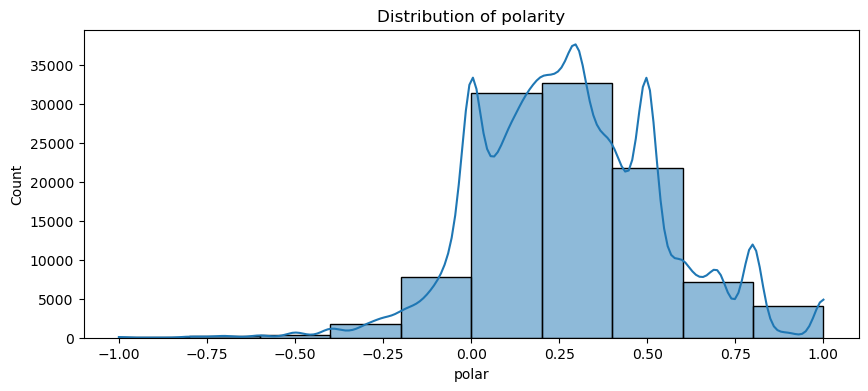

In [111]:
#Plotting polarity values as a histogram
plt.figure(figsize=(10,4))
sb.histplot(toy_df['polar'],binwidth=.2,kde=True)
plt.title('Distribution of polarity')
plt.show()

#### From the graph, we can see that majority of customers are in positive mood based on feedback and in the range of 0.2 to 0.4. But we can also see some 10 thousand customers in the range of -0.2 to 0 polar values. These customers are somewhat satisfied with the product and if we improve the quality of products we can get them into the positive range

## What would be the proportion of customers in terms of sentiment, rating and genuiness of customers?

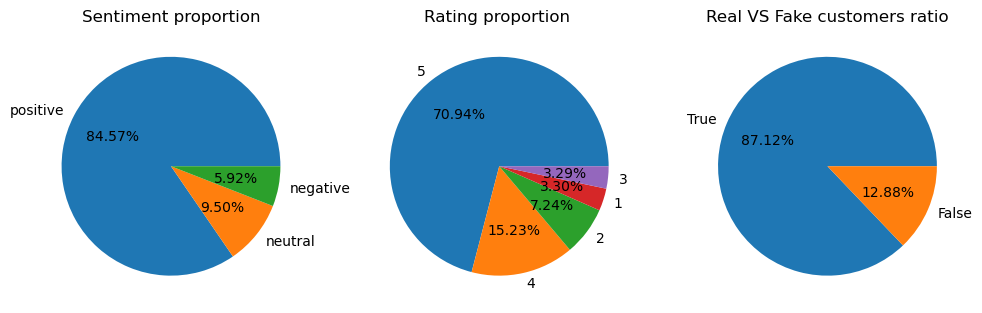

In [120]:
plt.figure(figsize=(12,12))

#Distribution of customers based on sentiment
plt.subplot(131)
plt.pie(toy_df['sentiment'].value_counts(),labels=toy_df['sentiment'].unique(),autopct='%.2f%%')
plt.title('Sentiment proportion')

#distribution of customers based on rating
plt.subplot(132)
plt.pie(toy_df['overall'].value_counts(),labels=toy_df['overall'].unique(),autopct='%.2f%%')
plt.title('Rating proportion ')

#proportion of verified and fake customers
plt.subplot(133)
plt.pie(toy_df['verified'].value_counts(),labels=toy_df['verified'].unique(),autopct='%.2f%%')
plt.title('Real VS Fake customers ratio')
plt.show()

#### From the charts we can see that nearly 85% of customers are positive about products sold and some 10% customers are neither satisfied nor diappointed, and some 6% customers are not so satisfied with the product maybe in terms of quality or price

#### Based on rating, it gives a similar picture about positive customer with nearly 85% customers giving 4 and above rating, and nearly some 10.5% customer gave 2 and 3 ratings while some 4% customers gave rating of 1 whom may be in the negative sentiment category

#### Another thing we must take into account is that nealy 13% customers are not verified customers out of which majority could be fake customers and their ratings and sentiment may affect the information about real feedback from the customers 

## Which would be the most preferred and bought product brand by the customers?

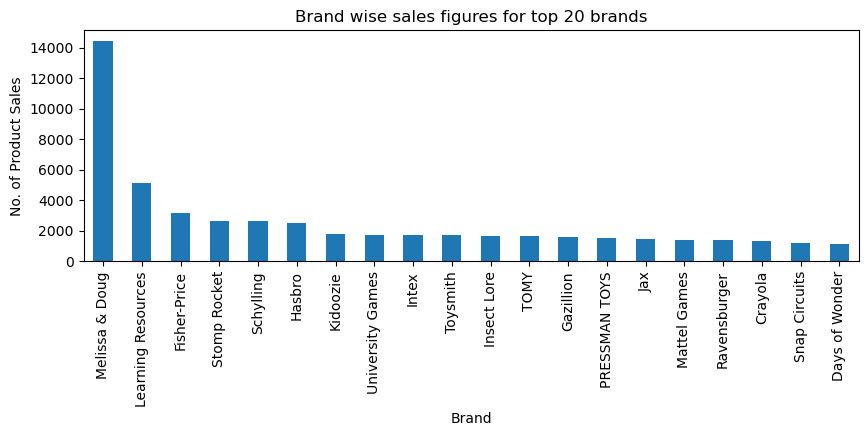

In [122]:
#Distribution of brand in terms of number of units sold under each brand
plt.figure(figsize=(10,3))
toy_df['brand'].value_counts().head(20).plot(kind='bar')
plt.title('Brand wise sales figures for top 20 brands')
plt.xlabel('Brand')
plt.ylabel('No. of Product Sales')
plt.show()

#### In terms of product sales, Melissa & Doug rates first in the list with about 14 thousand sales while Days of winter brand is the least in top 20 brands.

#### From this information, we can also optimize the inventory by increasing the Melissa brand products stock to a bit higher proportion and as Days of wonder brand and some other low selling brands stock holders can be allocated to top performing brands in terms of sales

## What would be the list of top 20 customers based on products sold and revenue generated from them individually?

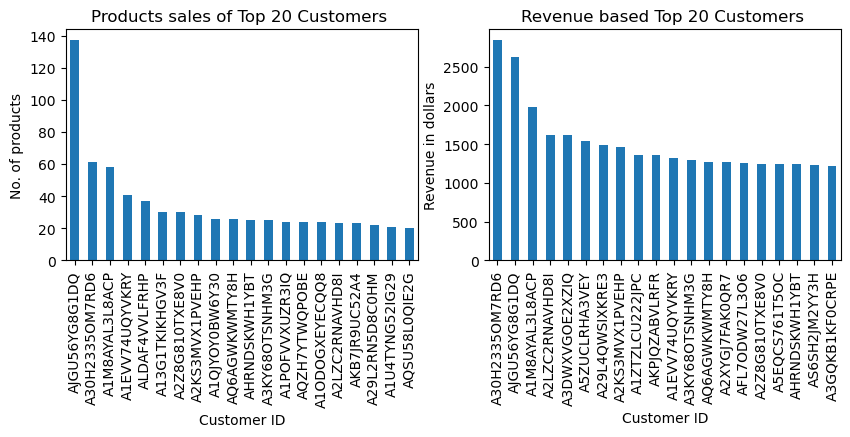

In [131]:
plt.figure(figsize=(10,3))
#Distribution of product sales based on top customers
plt.subplot(121)
toy_df['reviewerID'].value_counts().head(20).plot(kind='bar')
plt.title('Products sales of Top 20 Customers ')
plt.ylabel('No. of products')
plt.xlabel('Customer ID')

##Distribution of revenue from based on top customers
plt.subplot(122)
toy_df['price'].groupby(by=toy_df['reviewerID']).sum().sort_values(ascending=False).head(20).plot(kind='bar')
plt.title('Revenue based Top 20 Customers ')
plt.ylabel('Revenue in dollars')
plt.xlabel('Customer ID')
plt.show()

#### From the data on both charts, we can be able to visualize the most valuable customer from the toys category. When we look into the product sales count and revenue data, the customer with ID'AJGU56yG81DQ' who has bought the higher number of products is acutally second in terms of revenue. So he may  be the second most valuable customer and customer with ID 'A30H2335OM7RD6' can be declared as the best customer under this category

## What is the average rating based on various sentiment and do they follow any pattern?

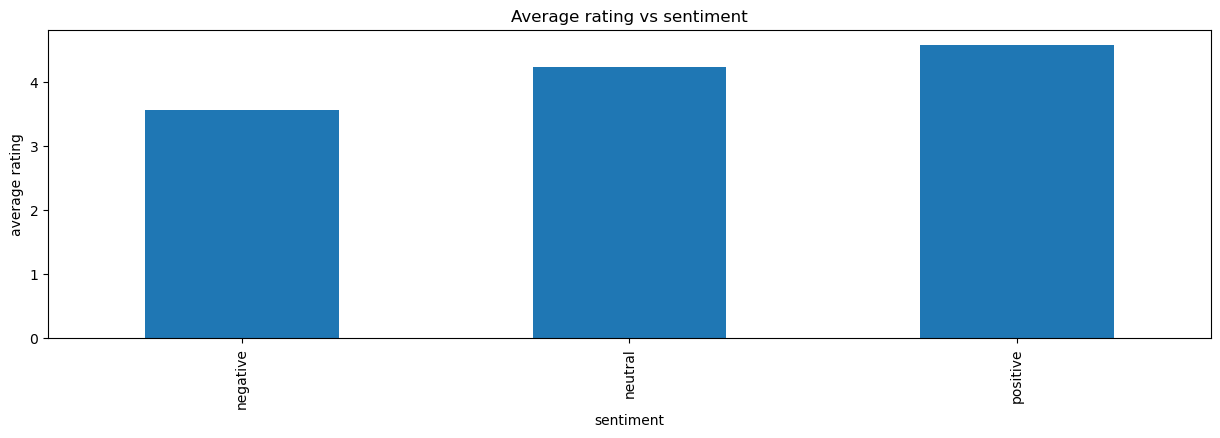

In [133]:
#Average rating based on sentiment feature
plt.figure(figsize=(15,4))
toy_df.groupby('sentiment')['overall'].mean().plot(kind='bar')
plt.title('Average rating vs sentiment')
plt.ylabel('average rating')
plt.show()

#### Based on sentiment, we can see that the rating is less from negative customers, rating is medium from neutral customers, and high from positive customers. Also we can say that rating follows a pattern as the sentiment turns positive gradually from negative through neutral sentiment. 

## How does the polarity score spread among the various categories of sentiment and what is the frequency observed in polarity based on individual sentiment levels?

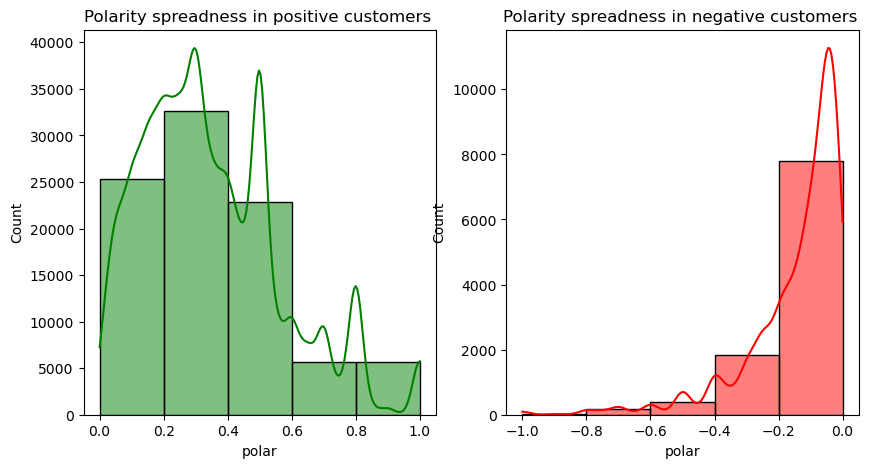

In [137]:
plt.figure(figsize=(10,5))
#Distribution of polarity in customers having positive sentiment
plt.subplot(121)
sb.histplot(toy_df[toy_df['sentiment']=='positive']['polar'],binwidth=.2,kde=True,color='g')
plt.title('Polarity spreadness in positive customers ')

#Distribution of polarity in customers having negative sentiment and also neutral customers technically
plt.subplot(122)
sb.histplot(toy_df[toy_df['sentiment']=='negative']['polar'],binwidth=.2,kde=True,color='r')
plt.title('Polarity spreadness in negative customers ')
plt.show()

#### From these histograms we can say that probability of  postive customers is high in terms of numbers generally but in specific if we look, the probability of customers with high polar value among positive customers is low, which means still improvement is needed in various mode of product delivery. 

#### When we look into negative data we can see that even neutral customers also included in the graph as it end with value 0 which may add the higher value in the range of -0.19 to 0. Some 1000 customers are not satisfied with the service which we need to look into for solutions to make them satisfied. 

## Is there any trend in the polarity values with respect to increase in rating from customers?

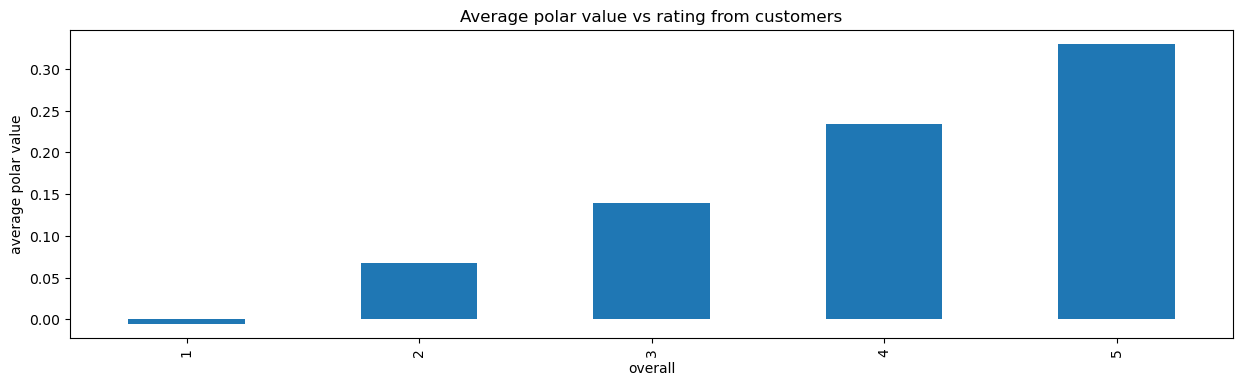

In [142]:
#Average polarity value for each rating category
plt.figure(figsize=(15,4))
toy_df.groupby('overall')['polar'].mean().plot(kind='bar')
plt.title('Average polar value vs rating from customers')
plt.ylabel('average polar value')
plt.show()

#### From the bar plot, we can see that as rating increases the polarity of review from customers increases proportionally. So we can easily interpret from rating whether the customer is satisfied or not.

## Does the sentiment and rating get affected by the price of the product?

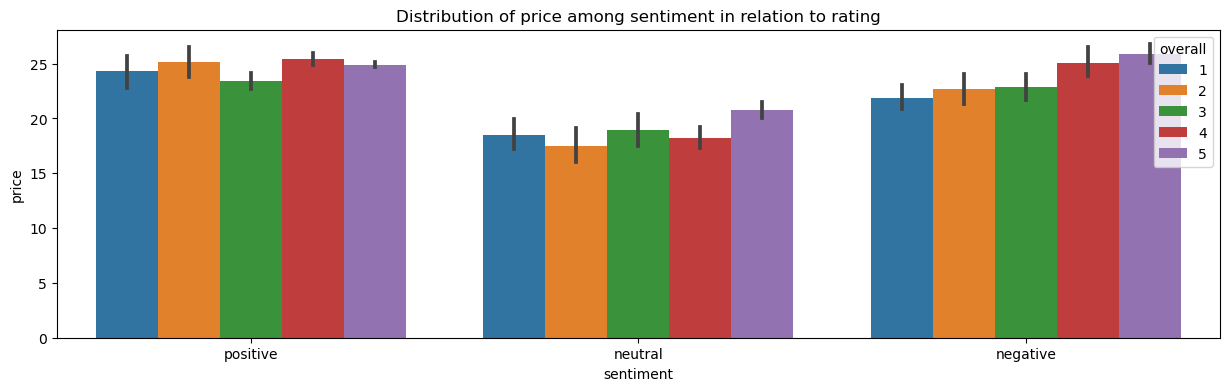

In [145]:
#Distribution of average price throughout sentiment and rating feature
plt.figure(figsize=(15,4))
sb.barplot(hue=toy_df['overall'],x=toy_df['sentiment'],y=toy_df['price'])
plt.title('Distribution of price among sentiment in relation to rating')
plt.show()

#### From above chart, we can interpret that overall price increase happens as the rating increases irrespective of sentiment. The highest average price is seen in negative sentiment with rating 5. This maybe a case where the customer feel that the product quality is best but in terms of price he is not satisfies with the price to quality aspect. It may be the case in whole negative customers. 

#### While looking into neutral customers, the price remains almost constant with minor fluctuations which could be due to some other issues but in general the neutral customers keep in mind both quality and price while rating the product

#### Positive customers have average price with rating 1 itself higher meaning it could be that they donot mind about price and just look into quality of product while rating the service.

# Does individual review from customers give us any information about overall sentiment about products?

## Creating a function to count the words and look for most frequent words from review 

In [83]:
# Visualizing the BiGrams and unigrams
from nltk.util import ngrams
import nltk
import collections
from sklearn.feature_extraction.text import CountVectorizer


# Defining a function to visualise n-grams
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

## Which unique word is most common from the reviews given?

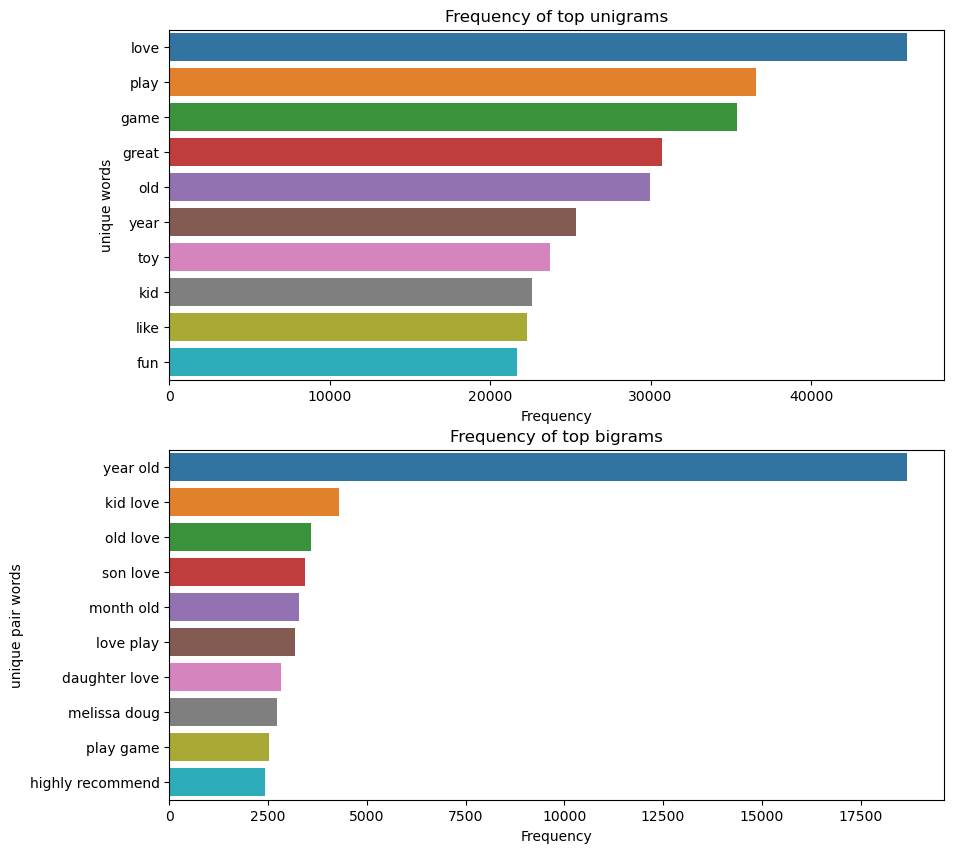

In [153]:
plt.figure(figsize=(10,10))
# Visualising the most frequent unigrams in the reviews
top_unigrams = get_top_ngram(toy_df['reviewText'],1)[:10]
x,y = map(list,zip(*top_unigrams))
plt.subplot(211)
sb.barplot(x = y,y = x)
plt.title('Frequency of top unigrams')
plt.ylabel('unique words')
plt.xlabel('Frequency')

# Visualising the most frequent bigrams in the reviews
plt.subplot(212)
top_bigrams = get_top_ngram(toy_df['reviewText'],2)[:10]
x,y = map(list,zip(*top_bigrams))
sb.barplot(x = y,y = x)
plt.title('Frequency of top bigrams')
plt.ylabel('unique pair words')
plt.xlabel('Frequency')
plt.show()

#### From the above graphs, we can see that word "LOVE" is the most frequent words representing the overall satisfaction among customers. Also other unique words also depict that the sentiment is positive.

#### From other graph, we can see that some words like 'love play' , 'kids love' and some words indicating the age are repeating.this gives us a picture that overall satisfation of customers is good.

# 

## Data Clustering using K-Means Clustering on TOY dataset

In [3]:
#Clustering function
from sklearn.cluster import KMeans

#Silhoutte score function
from sklearn.metrics import silhouette_score

#Scaling function 
from sklearn.preprocessing import StandardScaler

#### Creating dummy variables for sentiment analysis

In [16]:
sent=pd.get_dummies(toy_df['sentiment'],prefix='sentiment')
sent.head()

,sentiment_negative,sentiment_neutral,sentiment_positive
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


We get three columns with dummy variables for each class of sentiment feature

### Concatenating the main data frame with dummy dataset

In [17]:
toy_df_dum=pd.concat([toy_df,sent],axis='columns')         #concatenation
toy_df_dum.drop('sentiment',axis='columns',inplace=True)   #dropping the main sentiment feature
toy_df_dum.head()

,overall,verified,reviewTime,reviewerID,asin,reviewText,polar,brand,main_cat,price,sentiment_negative,sentiment_neutral,sentiment_positive
0,5,True,2013-10-06,A2LSCFZM2FBZK7,0486427706,stained glass page pretty cool nice black outl...,0.130952,Dover Publications,Office Products,5.68,0,0,1
1,5,True,2013-08-09,A3IXP5VS847GE5,0486427706,yo love thisand know buy want picture myselfim...,0.518519,Dover Publications,Office Products,5.68,0,0,1
2,5,True,2016-04-05,A1274GG1EB2JLJ,0486427706,picture great ve friend like dragon,0.800000,Dover Publications,Office Products,5.68,0,0,1
3,5,True,2016-02-13,A30X5EGBYAZQQK,0486427706,absolutely love book translucent paper super f...,0.366667,Dover Publications,Office Products,5.68,0,0,1
4,5,True,2015-12-10,A3U6UNXLAUY6ZV,0486427706,love,0.500000,Dover Publications,Office Products,5.68,0,0,1


In [152]:
#Looking into the features of dataset 
toy_df_dum.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'reviewText',
       'polar', 'brand', 'main_cat', 'price', 'sentiment_negative',
       'sentiment_neutral', 'sentiment_positive'],
      dtype='object')

#### Extracting the required features for clustering into a new variable

In [153]:
x=toy_df_dum[['overall','price','sentiment_negative','sentiment_neutral','sentiment_positive']]

#### Scaling the data using standard scalar function to get all the values in the same range

In [154]:
#scaling the data,fitting and transforming the data
scaled_x=StandardScaler().fit_transform(x)

In [155]:
#find best k value
error=[]         #list for appending errors
n_scores=[]      #list for appending silhoutte scores
for k in range(2,8):
    kmodel=KMeans(n_clusters=k,random_state=1)         #defining the model
    kmodel.fit(scaled_x)                               #fitting the model into the scaled data
    error.append(kmodel.inertia_)                      #finding the error and adding to error list
    n_scores.append(silhouette_score(scaled_x,kmodel.labels_))  #finding the score and adding to score list

### Plotting the data of error and silhoutte scores for various k value.

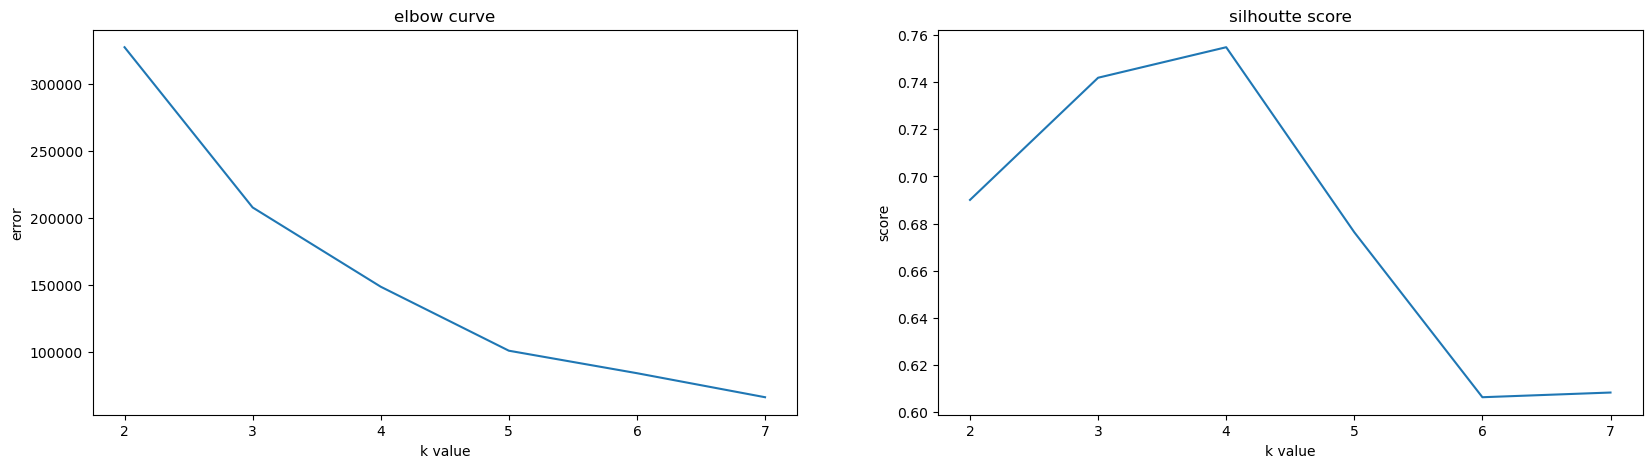

In [164]:
#Plotting the error as a subplot
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(range(2,8),error)
plt.title('elbow curve')
plt.xlabel('k value')
plt.ylabel('error')
#Plotting the score as another subplot
plt.subplot(122)
plt.plot(range(2,8),n_scores)
plt.title('silhoutte score')
plt.xlabel('k value')
plt.ylabel('score')
plt.show()

### We find that best k value from above graphs is 4

### Building k means with cluster k=4

In [167]:
k=4
km_model=KMeans(n_clusters=k,random_state=1)
km_model.fit(scaled_x)

KMeans(n_clusters=4, random_state=1)

### Predicting the clusters and storing them as a column with classes in the main data created for clustering

In [168]:
toy_df_dum['cluster']=km_model.predict(scaled_x)

### Calculating the mean value of all features in cluster data based on cluster class 

In [182]:
mean_val=toy_df_dum.groupby('cluster').mean()                               #mean of all values
mean_val['percent']=toy_df_dum['cluster'].value_counts(normalize=True)*100  #creating percentage of customers based on cluster classes
mean_val

,overall,verified,polar,price,sentiment_negative,sentiment_neutral,sentiment_positive,percent
cluster,,,,,,,,
0,4.590620,0.879443,0.351191,21.209772,0.000000,0.00000,1.000000,82.665456
1,4.230435,0.937267,0.000000,19.188115,0.000000,1.00000,0.000000,5.908148
2,3.563096,0.816943,-0.145152,22.668848,1.000000,0.00000,0.000000,9.421845
3,4.569794,0.592677,0.267223,185.161314,0.040732,0.00778,0.951487,2.004550


### Plotting the average values dataset

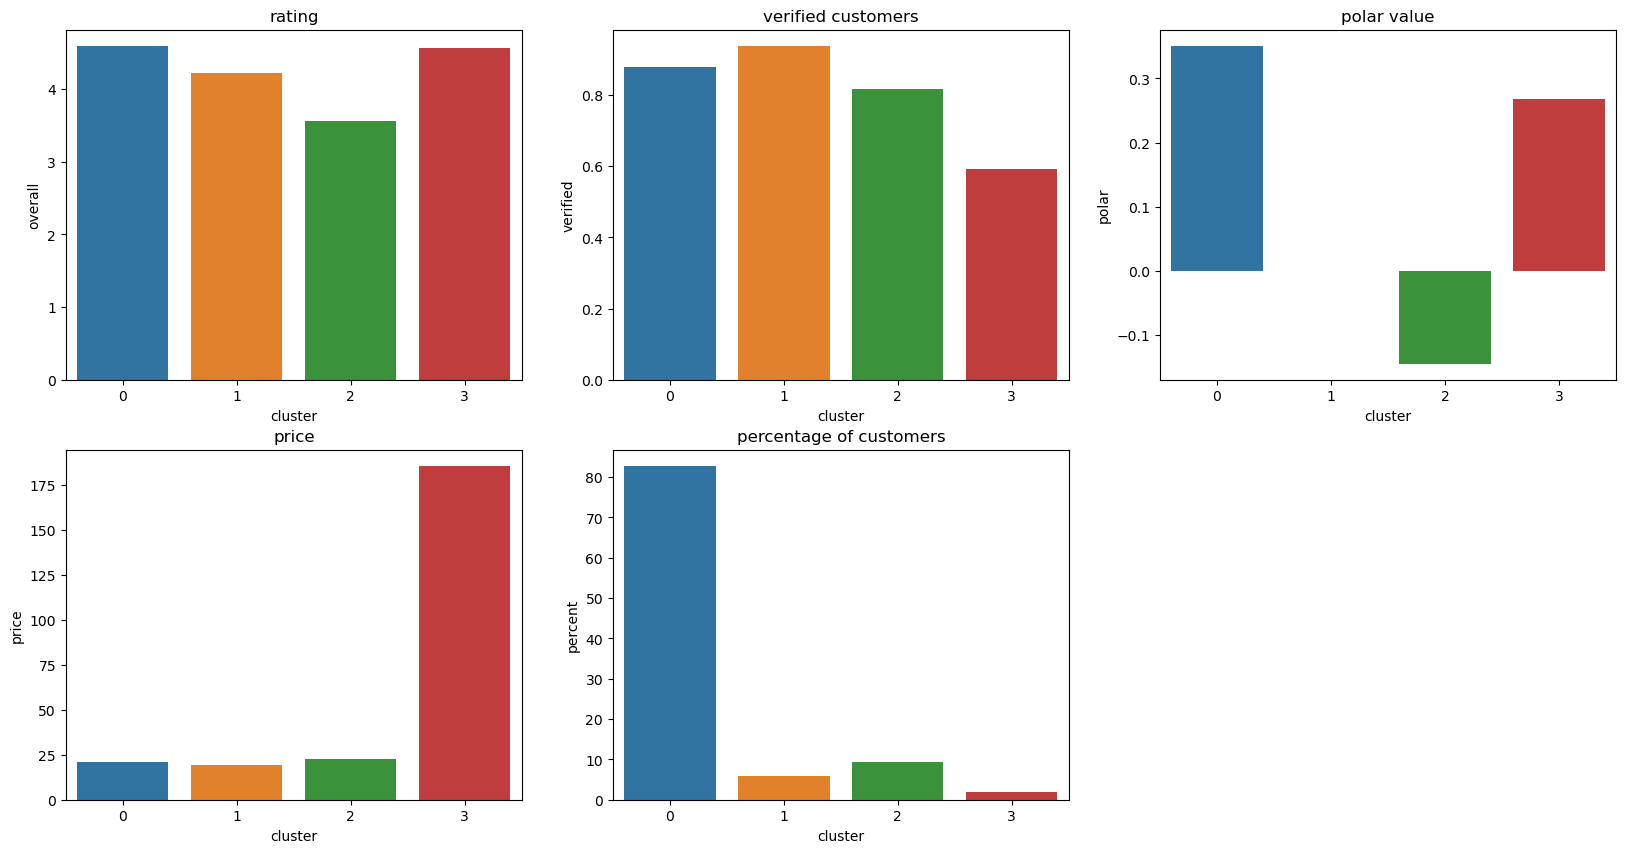

In [187]:
plt.figure(figsize=(20,10))
plt.subplot(231)
sb.barplot(mean_val.index,mean_val['overall'])
plt.title('rating')

plt.subplot(232)
sb.barplot(mean_val.index,mean_val['verified'])
plt.title('verified customers')

plt.subplot(233)
sb.barplot(mean_val.index,mean_val['polar'])
plt.title('polar value')

plt.subplot(234)
sb.barplot(mean_val.index,mean_val['price'])
plt.title('price')

plt.subplot(235)
sb.barplot(mean_val.index,mean_val['percent'])
plt.title('percentage of customers')
plt.show()

## Observations:

### Cluster 0:

   #### This cluster has a average rating of 4.59, verification genuiness at 87%, polarity at 0.35, average price at $21.20 and sentiment is positive. 83% of customers come under this category. They can be named as Loyal customers.
   
### Cluster 1:

   #### This cluster has a average rating of 4.23, verification genuiness at 93%, polarity at 0, average price at $19.19 and sentiment is neutral. 6% of customers come under this category. They can be named as Average customers.
   
### Cluster 2:

   #### This cluster has a average rating of 3.56, verification genuiness at 82%, polarity at -0.14, average price at $22.66 and sentiment is negative. 10% of customers come under this category. They can be named as Angry customers.
   
#### Cluster 3:

   #### This cluster has a average rating of 4.56, verification genuiness at 56%, polarity at 0.26, average price at $185.16 and sentiment is mixed in this category. Also in this category genuiness is too low. So this category may indicate fake customers too. 2% of customers come under this category. They can be named as Impassive customers.

# Time series modelling on Toy dataset

In [4]:
#Importing the required libraries
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.stattools import adfuller

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX

import statsmodels.api as sm

## Modelling for positive sentiment through time

In [38]:
#Creating a dataset with polarity and review time from main data where sentiment is positive
pos_toy=toy_df[toy_df['sentiment']=='positive'][['reviewTime','polar']]

#Converting the date feature into standard datetime feature
pos_toy['reviewTime'] = pd.to_datetime(pos_toy['reviewTime'], dayfirst = True)

#Setting the datetime feature as index of data 
pos_toy.set_index("reviewTime", inplace=True)
pos_toy.head()

,polar
reviewTime,
2013-10-06,0.130952
2013-08-09,0.518519
2016-04-05,0.800000
2016-02-13,0.366667
2015-12-10,0.500000


In [39]:
#Resampling data from daily data to monthly average data
pos_toy=pos_toy.resample('M').mean()
pos_toy.head()

,polar
reviewTime,
1999-10-31,0.122446
1999-11-30,NaN
1999-12-31,NaN
2000-01-31,NaN
2000-02-29,NaN


We can see that in the above data there are many nan values and we need to impute data to eliminate nan values

In [40]:
#imputation of missing data by interpolation method with time as ffactor
pos_toy['polar'].interpolate(method='time',inplace=True)
pos_toy.head()

,polar
reviewTime,
1999-10-31,0.122446
1999-11-30,0.129380
1999-12-31,0.136544
2000-01-31,0.143709
2000-02-29,0.150411


### Decomposing the data into components of time series to analyse the data

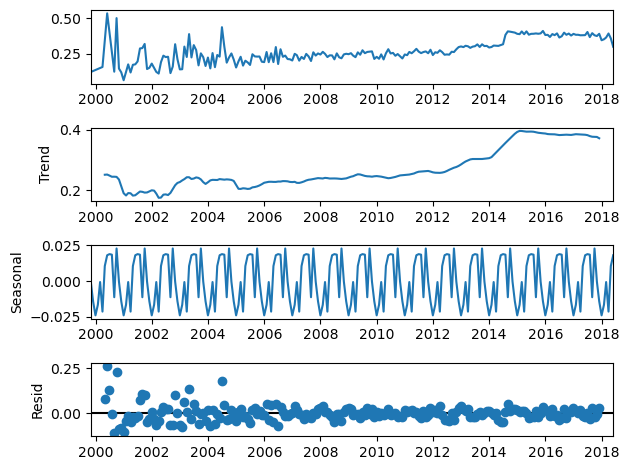

In [8]:
seasonal_decompose(pos_toy).plot()
plt.show()

From the above plot we can see that there is a trend in the data ,seasonal components show us that for each year at the same time there is a same pattern in polarity, then incase of noise initially there are alot of noise maybe because of imputation
and in most cases the noise is not too high

## Creating a function to check for stationarity of data using Augmented dickyfuller test

In [9]:
#to check stationarity
def adfullerm(data):
    pval=adfuller(data)[1]    #getting the pvalue from adfuller test
    if pval>0.05:             
        return 'data is not stationary'     #null hypothesis
    else:
        return 'data is stationary'         #alternate hypothesis

## Applying stationarity function to positive time series data

In [10]:
adfullerm(pos_toy)

'data is not stationary'

Data is not stationary. we need to smooth the data. Here we use shift function to find the lagged data.

In [41]:
pos_toy_diff=pos_toy-pos_toy.shift(1) #lagged data through shift function 
pos_toy_diff.dropna(inplace=True)  #dropping null values

## Again applying stationarity function in lagged data

In [12]:
adfullerm(pos_toy_diff)

'data is stationary'

We got the lagged data as stationary data with shift 1

#### After getting stationary data, now we apply pacf and acf plotting from statsmodels library in form of lollipop plot

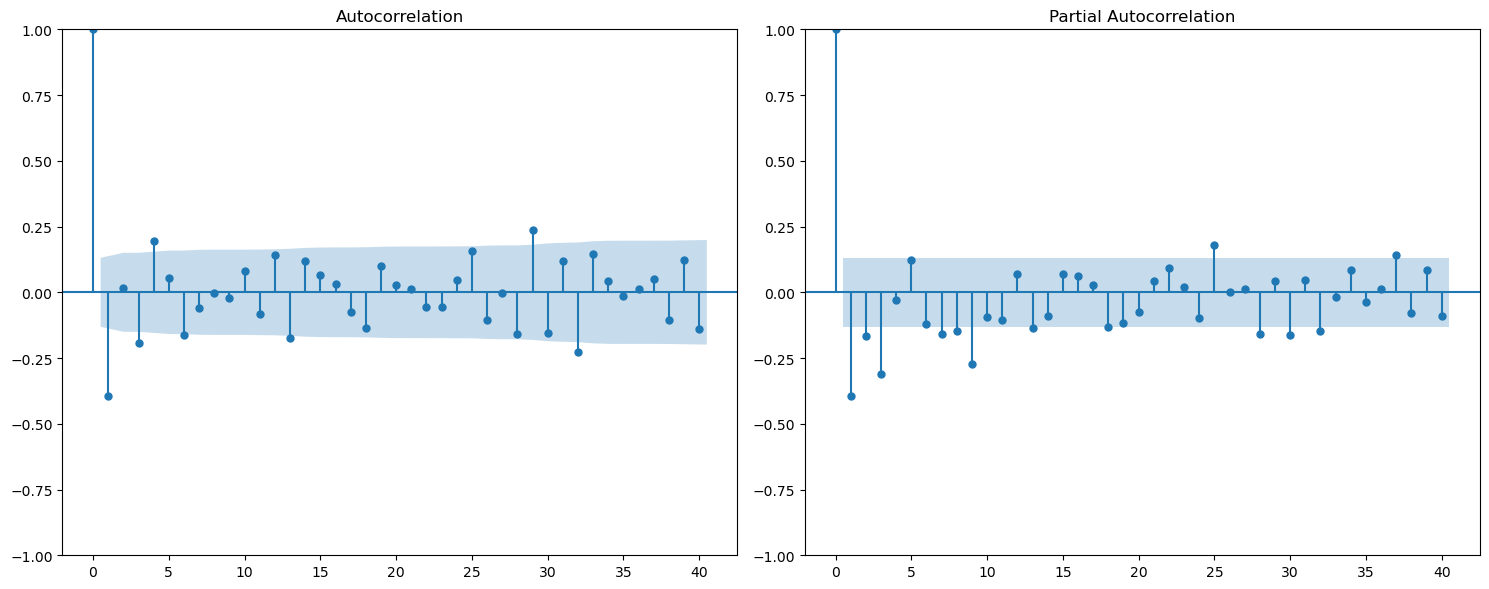

In [13]:
#plotting acf and pacf
fig = plt.figure(figsize=(15, 6))

# Show ACF
ax1 = fig.add_subplot(121)
plot_acf(pos_toy_diff, lags=40, ax=ax1)

# Show PACF
ax2 = fig.add_subplot(122)
plot_pacf(pos_toy_diff, lags=40, ax=ax2)

plt.tight_layout()

from the graph, we can see that in acf plot, AR(p) value as 2 and from pacf plot, MA(q) value as 4.

From these values, we get p,d,q values and do trial and error for best model with ljung box test and aic score

### split the data into train and test

In [42]:
ss = int(0.7 * len(pos_toy_diff))     #finding the length of train

train = pos_toy_diff['polar'].iloc[:ss]    #indexing the train data
test = pos_toy_diff['polar'].iloc[ss:]     #indexing the test data
print("train = {}, test = {}".format(len(train), len(test)))

train = 156, test = 67


In [43]:
#choosing the best values after looking for best aic and check for goodness on trial and error
p=2
q=4
d=1

### Building the sarima model

In [44]:
model_ma = SARIMAX(train, order=(p,d,q),seasonal_order=(1,3,1,12))  #Building the model with seasonal components 
model_fitted = model_ma.fit()                                       #fitting the model
print(model_fitted.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                polar   No. Observations:                  156
Model:             SARIMAX(2, 1, 4)x(1, 3, [1], 12)   Log Likelihood                  96.271
Date:                              Wed, 03 May 2023   AIC                           -174.543
Time:                                      09:49:37   BIC                           -149.531
Sample:                                  11-30-1999   HQIC                          -164.386
                                       - 10-31-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4899      0.080      6.128      0.000       0.333       0.647
ar.L2         -0.89

### Using Ljung box method to find the goodness of the model

In [115]:
lj_pval=sm.stats.acorr_ljungbox(model_fitted.resid,lags=[1],return_df=True)['lb_pvalue'].values[0]
if lj_pval>0.05:
    print('good model')   #null hypothesis
else:
    print('bad model')    #alternate hypothesis

good model


After finding a good model, the model is predicted for the length of test data as below

In [19]:
pred=model_fitted.predict(len(train),len(train)+len(test))   #predicting the data from end of train data upto length of test data 
pred

2012-11-30   -0.031128
2012-12-31   -0.021821
2013-01-31   -0.031407
2013-02-28    0.057780
2013-03-31   -0.000629
                ...   
2018-02-28    0.164323
2018-03-31    0.098010
2018-04-30   -0.180453
2018-05-31   -0.030843
2018-06-30    0.055084
Freq: M, Name: predicted_mean, Length: 68, dtype: float64

### Creating a dataset with actual test data and predicted data

In [20]:
actual,predicted=[],[]     #Lists for actual and predicted data
for i in range(len(pred)-1):
    actual.append(test.iloc[i])         #adding actual data to actual list
    predicted.append(pred.iloc[i])      #adding pred data to predicted list
new_df=pd.DataFrame({'actual':actual,'predicted':predicted})    #creating dataframe with both lists
new_df['error']=new_df['actual'] - new_df['predicted']          #finding difference of actual and pred data as error data in same dataframe

### Plotting the actual and pred data to visualize the spread of data

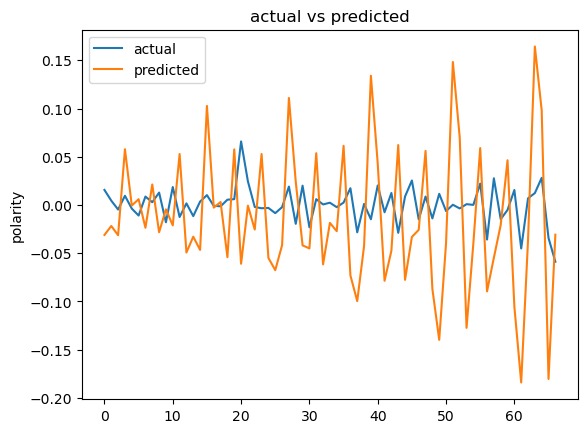

In [21]:
new_df[['actual','predicted']].plot()
plt.title('actual vs predicted')
plt.ylabel('polarity')
plt.show()

There may be difference between actual and predicted values but overall the data follows somewhat similar pattern

### Forecasting the data for next three years

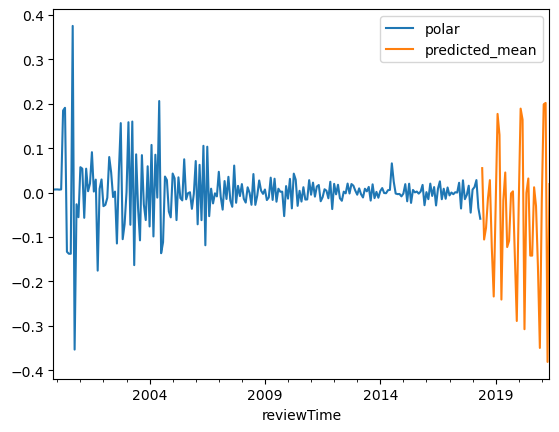

In [23]:
frst=model_fitted.predict(len(pos_toy_diff),len(pos_toy_diff)+35)   #predicting the model for next 36 values
pos_toy_diff['polar'].plot(legend=True)                             #plotting actual data 
frst.plot(legend=True)                                              #plotting forecast data in the same plot
plt.show()

## Modelling for negative sentiment through time

In [127]:
#Creating a dataset with polarity and review time from main data where sentiment is negative
neg_toy=toy_df[toy_df['sentiment']=='negative'][['reviewTime','polar']]

#Converting the date feature into standard datetime feature
neg_toy['reviewTime'] = pd.to_datetime(neg_toy['reviewTime'], dayfirst = True)

#Setting the datetime feature as index of data 
neg_toy.set_index("reviewTime", inplace=True)
neg_toy.head()

,polar
reviewTime,
2015-02-15,-0.166667
2014-09-12,-0.250000
2014-03-21,-0.043750
2013-11-16,-0.500000
2013-09-05,-0.166667


In [129]:
#Resampling data from daily data to monthly average data
neg_toy=neg_toy.resample('M').mean()
neg_toy.head()

,polar
reviewTime,
2000-08-31,-0.047917
2000-09-30,NaN
2000-10-31,-0.100000
2000-11-30,NaN
2000-12-31,-0.042150


We can see that in the above data there are many nan values and we need to impute data to eliminate nan values

In [130]:
#imputation of missing data by interpolation method with time as factor
neg_toy['polar'].interpolate(method='time',inplace=True)
neg_toy.head()

,polar
reviewTime,
2000-08-31,-0.047917
2000-09-30,-0.073531
2000-10-31,-0.100000
2000-11-30,-0.071549
2000-12-31,-0.042150


## Decomposing the data into components of time series to analyse the data

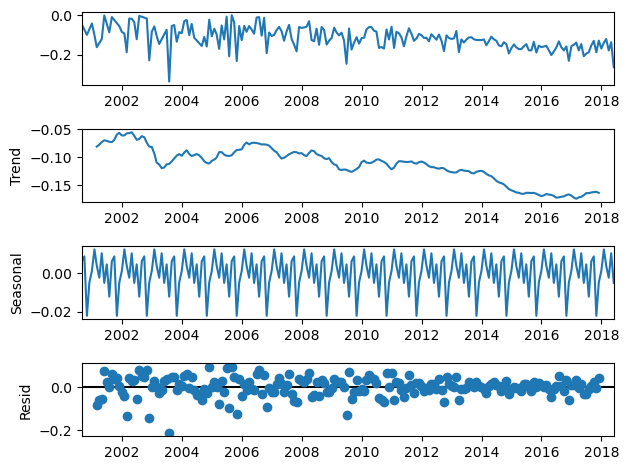

In [131]:
seasonal_decompose(neg_toy).plot()
plt.show()

From the above plot we can see that there is no trend in the data ,seasonal components show us that for each year at the same time there is a same pattern in polarity, then incase of noise initially there are a lot of noise maybe because of imputation and the noise gradually decreases.

## Applying stationarity function to positive time series data

In [132]:
adfullerm(neg_toy)

'data is not stationary'

Data is not stationary. we need to smooth the data. Here we use shift function to find the lagged data.

In [133]:
neg_toy_diff=neg_toy-neg_toy.shift(1) #lagged data through shift function 
neg_toy_diff.dropna(inplace=True)

## Again applying stationarity function in lagged data

In [134]:
adfullerm(neg_toy_diff)

'data is stationary'

We got the lagged data as stationary data with shift 1

#### After getting stationary data, now we apply pacf and acf plotting from statsmodels library in form of lollipop plot

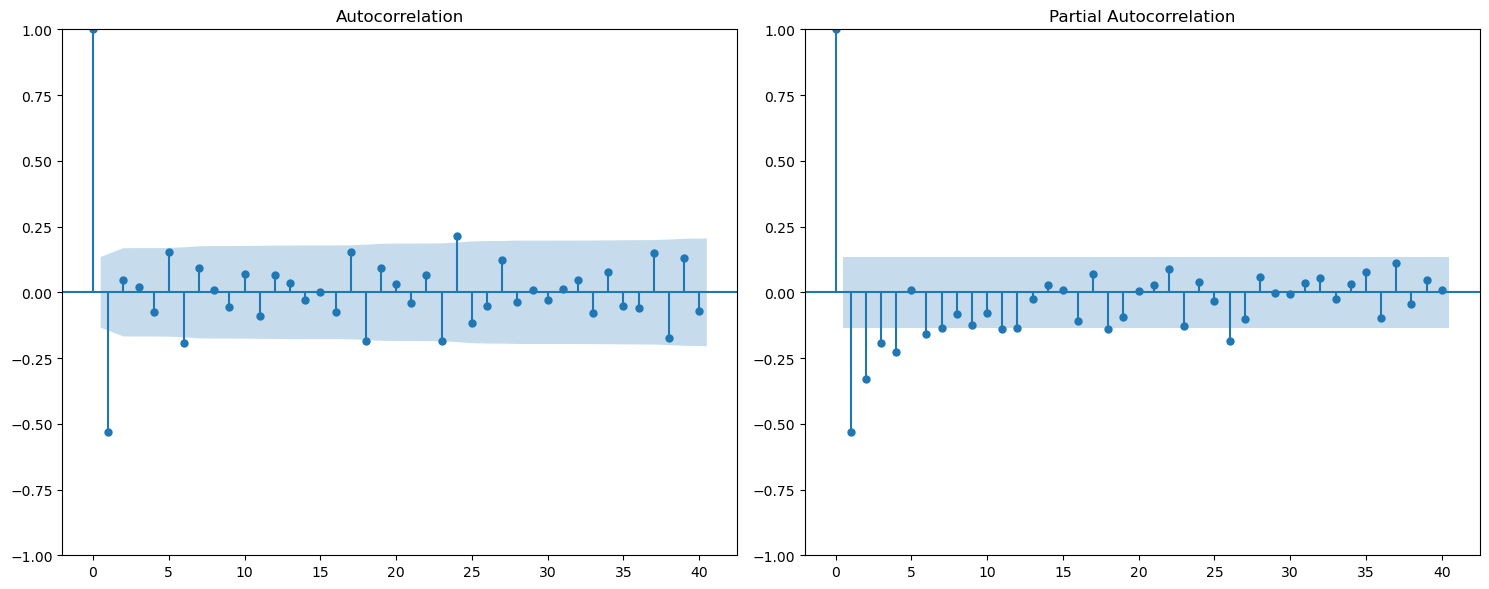

In [135]:
#plotting acf and pacf
fig = plt.figure(figsize=(15, 6))

# Show ACF
ax1 = fig.add_subplot(121)
plot_acf(neg_toy_diff, lags=40, ax=ax1)

# Show PACF
ax2 = fig.add_subplot(122)
plot_pacf(neg_toy_diff, lags=40, ax=ax2)

plt.tight_layout()

from the graph, we can see that in acf plot, AR(p) value as 5 and from pacf plot, MA(q) value as 2.

From these values, we get p,d,q values and do trial and error for best model with ljung box test and aic score

### Split the data into train and test

In [137]:
ss = int(0.7 * len(neg_toy_diff))       #finding the length of train

train = neg_toy_diff['polar'].iloc[:ss]      #indexing the train data
test = neg_toy_diff['polar'].iloc[ss:]       #indexing the test data
print("train = {}, test = {}".format(len(train), len(test)))

train = 149, test = 64


In [141]:
#choosing the best values after looking for best aic and check for goodness on trial and error below
p=2
q=5
d=1

## Building the sarima model

In [143]:
model_ma = SARIMAX(train, order=(p,d,q),seasonal_order=(1,1,1,12))         #Building the model with seasonal components 
model_fitted = model_ma.fit()
print(model_fitted.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                polar   No. Observations:                  149
Model:             SARIMAX(2, 1, 5)x(1, 1, [1], 12)   Log Likelihood                 181.556
Date:                              Sat, 22 Apr 2023   AIC                           -343.112
Time:                                      17:39:25   BIC                           -313.986
Sample:                                  09-30-2000   HQIC                          -331.276
                                       - 01-31-2013                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7359      0.090    -19.242      0.000      -1.913      -1.559
ar.L2         -0.93

In [144]:
model_ma2 = SARIMAX(train, order=(p,d,q),seasonal_order=(1,1,2,12))   #Building the model with seasonal components 
model_fitted2 = model_ma2.fit()
print(model_fitted2.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                   polar   No. Observations:                  149
Model:             SARIMAX(2, 1, 5)x(1, 1, [1, 2], 12)   Log Likelihood                 182.703
Date:                                 Sat, 22 Apr 2023   AIC                           -343.406
Time:                                         17:40:40   BIC                           -311.367
Sample:                                     09-30-2000   HQIC                          -330.386
                                          - 01-31-2013                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6565      0.065    -25.347      0.000      -1.785      -1

In [145]:
model_ma3 = SARIMAX(train, order=(p,d,q),seasonal_order=(2,1,1,12))     #Building the model with seasonal components 
model_fitted3 = model_ma3.fit()
print(model_fitted3.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                polar   No. Observations:                  149
Model:             SARIMAX(2, 1, 5)x(2, 1, [1], 12)   Log Likelihood                 182.650
Date:                              Sat, 22 Apr 2023   AIC                           -343.299
Time:                                      17:41:25   BIC                           -311.260
Sample:                                  09-30-2000   HQIC                          -330.279
                                       - 01-31-2013                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7781      0.062    -28.494      0.000      -1.900      -1.656
ar.L2         -0.95

From the above sarima models, we can see that the values selected from pacf and acf is good in terms of aic score and
seasonal p,d,q as 1,1,2

## Using Ljung box method to find the goodness of the model

In [146]:
lj_pval=sm.stats.acorr_ljungbox(model_fitted.resid,lags=[1],return_df=True)['lb_pvalue'].values[0]
if lj_pval>0.05:
    print('good model')
else:
    print('bad model')

good model


After finding a good model, the model is predicted for the length of test data as below

In [147]:
pred=model_fitted.predict(len(train),len(train)+len(test))   #predicting the data from end of train data upto length of test data 
pred

2013-02-28   -0.001862
2013-03-31    0.000865
2013-04-30    0.011733
2013-05-31   -0.018707
2013-06-30    0.008127
                ...   
2018-02-28   -0.010015
2018-03-31    0.004721
2018-04-30    0.007848
2018-05-31   -0.017355
2018-06-30    0.008794
Freq: M, Name: predicted_mean, Length: 65, dtype: float64

## Creating a dataset with actual test data and predicted data

In [148]:
actual,predicted=[],[]                  #Lists for actual and predicted data
for i in range(len(pred)-1):
    actual.append(test.iloc[i])              #adding actual data to actual list
    predicted.append(pred.iloc[i])           #adding pred data to predicted list
new_df=pd.DataFrame({'actual':actual,'predicted':predicted})   #creating dataframe with both lists
new_df['error']=new_df['actual'] - new_df['predicted']         #finding difference of actual and pred data as error data in same dataframe

## Plotting the actual and pred data to visualize the spread of data

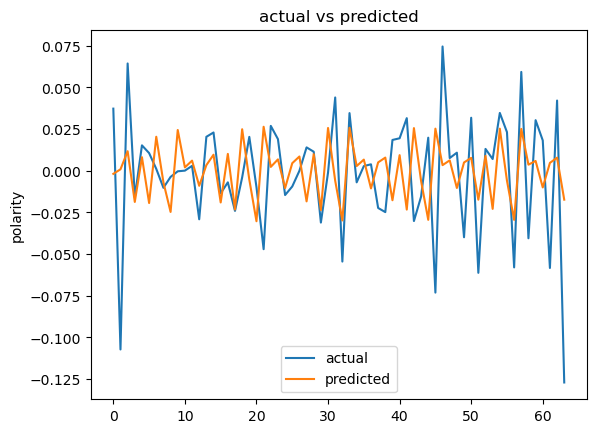

In [149]:
new_df[['actual','predicted']].plot()
plt.title('actual vs predicted')
plt.ylabel('polarity')
plt.show()

There is not much difference between actual and predicted values and the data follows similar pattern as the test data

## Forecasting the data for next three years

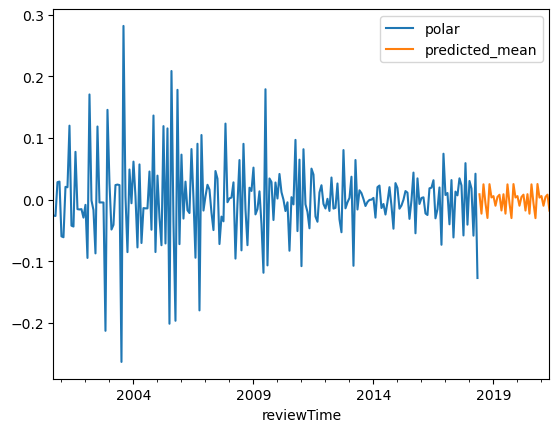

In [150]:
frst=model_fitted.predict(len(neg_toy_diff),len(neg_toy_diff)+35)     #predicting the model for next 36 values
neg_toy_diff['polar'].plot(legend=True)                               #plotting actual data 
frst.plot(legend=True)                                                #plotting forecast data in the same plot
plt.show()

## Modelling for sentiment on most frequent product through time

In [279]:
#Creating a dataset with polarity and review time from main data for most frequent product selled 
prdt_toy=toy_df[toy_df['asin']==(toy_df['asin'].value_counts().index[0])][['reviewTime','polar']]

#Converting the date feature into standard datetime feature
prdt_toy['reviewTime'] = pd.to_datetime(prdt_toy['reviewTime'], dayfirst = True)

#Setting the datetime feature as index of data
prdt_toy.set_index("reviewTime", inplace=True)
prdt_toy.head()

,polar
reviewTime,
2018-04-22,-0.076389
2018-04-22,-0.076389
2018-04-15,0.200000
2018-04-15,0.200000
2018-04-13,0.500000


In [280]:
#Resampling data from daily data to monthly average data
prdt_toy=prdt_toy.resample('M').mean()
prdt_toy.head()

,polar
reviewTime,
2008-01-31,0.285714
2008-02-29,NaN
2008-03-31,NaN
2008-04-30,NaN
2008-05-31,NaN


We can see that in the above data there are many nan values and we need to impute data to eliminate nan values

In [281]:
#imputation of missing data by interpolation method with time as factor
prdt_toy['polar'].interpolate(method='time',inplace=True)
prdt_toy.head()

,polar
reviewTime,
2008-01-31,0.285714
2008-02-29,0.280895
2008-03-31,0.275743
2008-04-30,0.270758
2008-05-31,0.265606


## Decomposing the data into components of time series to analyse the data

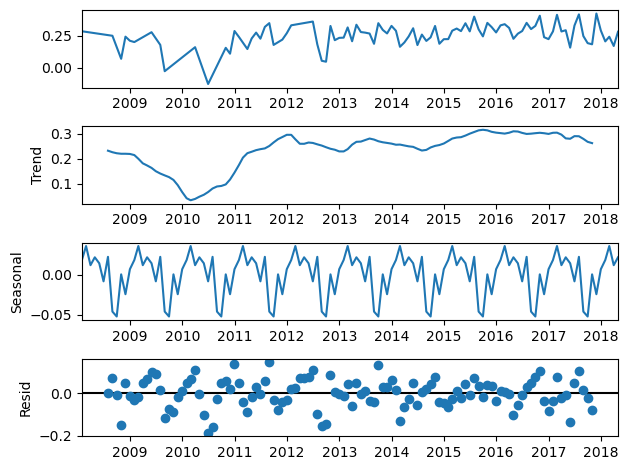

In [282]:
seasonal_decompose(prdt_toy).plot()
plt.show()

From the above plot we can see that there is a trend in the data ,seasonal components show us that for each year at the same time there is a same pattern in polarity, then incase of noise  there are a lot of noise maybe because of imputation and the noise is high in most cases

## Applying stationarity function to product time series data

In [283]:
adfullerm(prdt_toy)

'data is stationary'

We got the actual data as stationary data and hence no smoothing is required

#### After getting stationary data, now we apply pacf and acf plotting from statsmodels library in form of lollipop plot

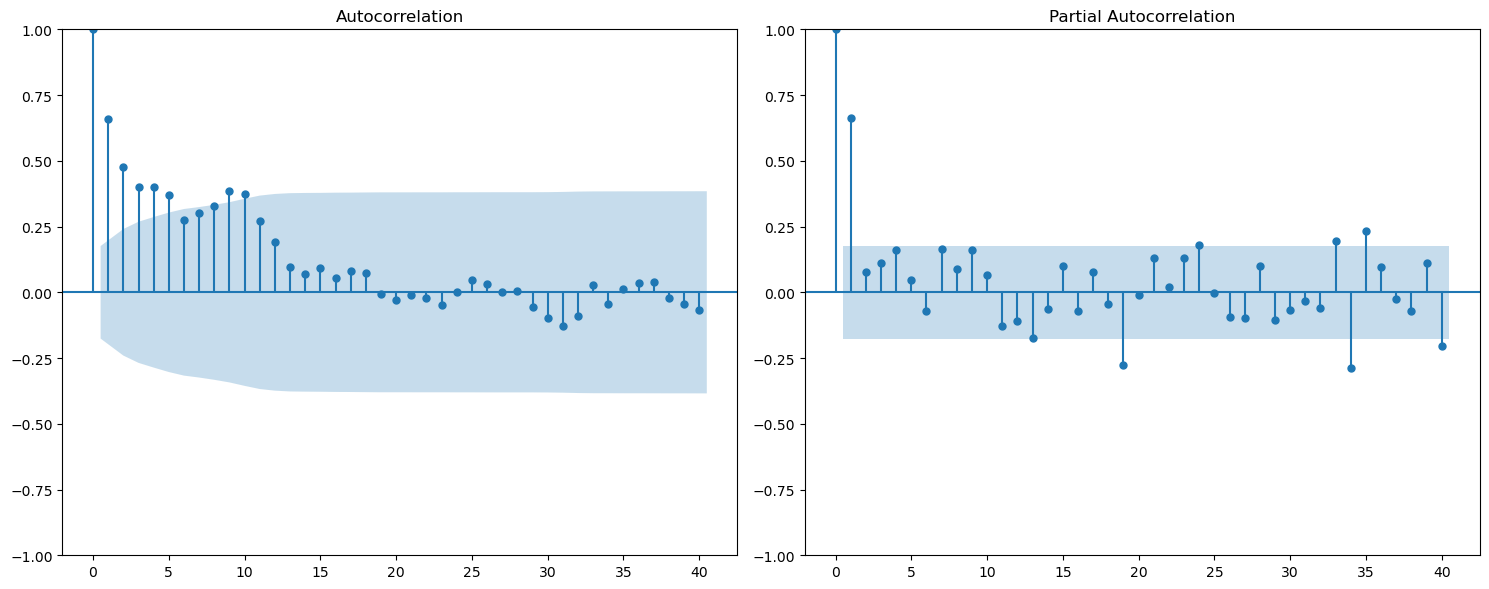

In [284]:
#plotting acf and pacf
fig = plt.figure(figsize=(15, 6))

# Show ACF
ax1 = fig.add_subplot(121)
plot_acf(prdt_toy, lags=40, ax=ax1)

# Show PACF
ax2 = fig.add_subplot(122)
plot_pacf(prdt_toy, lags=40, ax=ax2)

plt.tight_layout()

from the graph, we can see that in acf plot, AR(p) value as 6 and from pacf plot, MA(q) value as 2.

From these values, we get p,d,q values and do trial and error for best model with ljung box test and aic score

## split the data into train and test

In [286]:
ss = int(0.7 * len(prdt_toy))                                    #finding the length of train

train = prdt_toy['polar'].iloc[:ss]                              #indexing the train data
test = prdt_toy['polar'].iloc[ss:]                               #indexing the test data
print("train = {}, test = {}".format(len(train), len(test)))

train = 86, test = 38


In [292]:
#choosing the best values after looking for best aic and check for goodness on trial and error
p=6
d=1
q=2

## Building the sarima model

In [293]:
model_ma = SARIMAX(train, order=(p,d,q),seasonal_order=(p,d,q,12))     #Building the model with seasonal components
model_fitted = model_ma.fit()                                          #fitting the model
print(model_fitted.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              polar   No. Observations:                   86
Model:             SARIMAX(6, 1, 2)x(6, 1, 2, 12)   Log Likelihood                  79.893
Date:                            Sat, 22 Apr 2023   AIC                           -125.785
Time:                                    19:31:27   BIC                            -86.848
Sample:                                01-31-2008   HQIC                          -110.268
                                     - 02-28-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0806      4.846     -0.017      0.987      -9.579       9.418
ar.L2         -0.0488      1.251   

## Using Ljung box method to find the goodness of the model

In [294]:
lj_pval=sm.stats.acorr_ljungbox(model_fitted.resid,lags=[1],return_df=True)['lb_pvalue'].values[0]
if lj_pval>0.05:
    print('good model')
else:
    print('bad model')

good model


After finding a good model, the model is predicted for the length of test data as below

In [295]:
pred=model_fitted.predict(len(train),len(train)+len(test))   #predicting the data from end of train data upto length of test data 
pred

2015-03-31    0.273550
2015-04-30    0.298963
2015-05-31    0.270169
2015-06-30    0.256413
2015-07-31    0.180045
2015-08-31    0.207522
2015-09-30    0.187127
2015-10-31    0.457902
2015-11-30    0.290656
2015-12-31    0.381779
2016-01-31    0.357599
2016-02-29    0.404956
2016-03-31    0.262300
2016-04-30    0.484071
2016-05-31    0.510384
2016-06-30    0.543446
2016-07-31    0.473811
2016-08-31    0.346087
2016-09-30    0.381494
2016-10-31    0.452591
2016-11-30    0.362424
2016-12-31    0.360828
2017-01-31    0.382270
2017-02-28    0.324783
2017-03-31    0.325896
2017-04-30    0.398015
2017-05-31    0.417192
2017-06-30    0.348209
2017-07-31    0.274657
2017-08-31    0.147237
2017-09-30    0.319144
2017-10-31    0.511956
2017-11-30    0.287929
2017-12-31    0.305402
2018-01-31    0.253267
2018-02-28    0.303034
2018-03-31    0.230638
2018-04-30    0.364844
2018-05-31    0.348909
Freq: M, Name: predicted_mean, dtype: float64

### Creating a dataset with actual test data and predicted data

In [296]:
actual,predicted=[],[]                #Lists for actual and predicted data
for i in range(len(pred)-1):
    actual.append(test.iloc[i])           #adding actual data to actual list
    predicted.append(pred.iloc[i])        #adding pred data to predicted list
new_df=pd.DataFrame({'actual':actual,'predicted':predicted})     #creating dataframe with both lists
new_df['error']=new_df['actual'] - new_df['predicted']           #finding difference of actual and pred data as error data in same dataframe

## Plotting the actual and pred data to visualize the spread of data

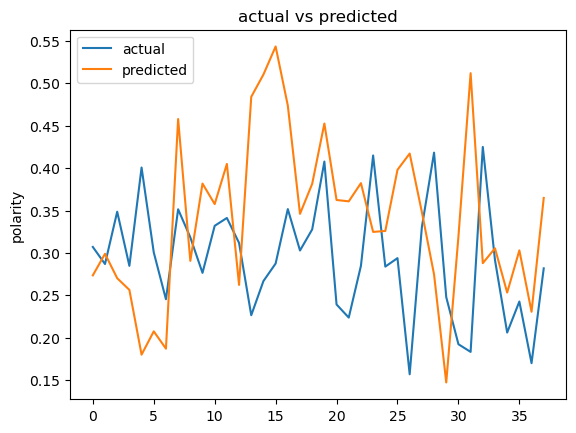

In [297]:
new_df[['actual','predicted']].plot()
plt.title('actual vs predicted')
plt.ylabel('polarity')
plt.show()

There is not much difference between actual and predicted values and the data follows similar pattern as the test data

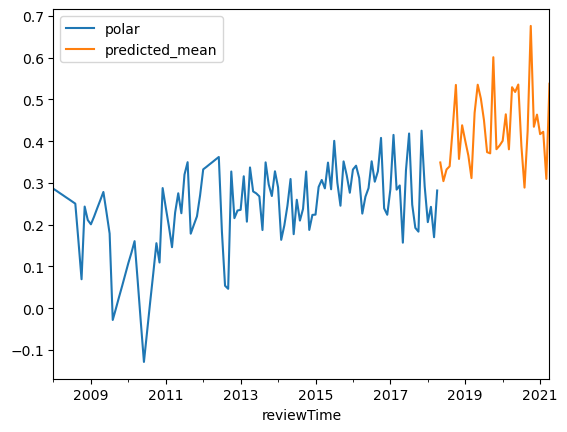

In [300]:
frst=model_fitted.predict(len(prdt_toy),len(prdt_toy)+35)   #predicting the model for next 36 values
prdt_toy['polar'].plot(legend=True)                         #plotting actual data 
frst.plot(legend=True)                                      #plotting forecast data in the same plot
plt.show()

# ML Classification Modelling on TOY dataset

In [24]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import GaussianNB,MultinomialNB

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier,StackingClassifier

from sklearn.neighbors import  KNeighborsClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score,roc_curve

In [4]:
#Loading the main data
toy_df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewText,polar,sentiment,brand,main_cat,price
0,5,True,2013-10-06,A2LSCFZM2FBZK7,0486427706,stained glass page pretty cool nice black outl...,0.130952,positive,Dover Publications,Office Products,5.68
1,5,True,2013-08-09,A3IXP5VS847GE5,0486427706,yo love thisand know buy want picture myselfim...,0.518519,positive,Dover Publications,Office Products,5.68
2,5,True,2016-04-05,A1274GG1EB2JLJ,0486427706,picture great ve friend like dragon,0.800000,positive,Dover Publications,Office Products,5.68
3,5,True,2016-02-13,A30X5EGBYAZQQK,0486427706,absolutely love book translucent paper super f...,0.366667,positive,Dover Publications,Office Products,5.68
4,5,True,2015-12-10,A3U6UNXLAUY6ZV,0486427706,love,0.500000,positive,Dover Publications,Office Products,5.68


In [5]:
#Taking the x independent variable
x=toy_df.reviewText

#Label encoding the data into classes and taking it as y target variable
le=LabelEncoder()
y=pd.Series(le.fit_transform(toy_df['sentiment']))

#Printing the labels of classes in target variable
print(le.fit(toy_df['sentiment']).classes_)

['negative' 'neutral' 'positive']


### Split the data into train and test

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, random_state = 1)

### Printing the shape of train and test data

In [7]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(87201,)
(21801,)
(87201,)
(21801,)


### Vectorization of test and train data

In [8]:
myvector = TfidfVectorizer()
x_train_tfi = myvector.fit_transform(x_train)      #vectorizing and fitting train data
x_test_tfi=myvector.transform(x_test)              #vectorizing and fitting test data

# Logistic regression

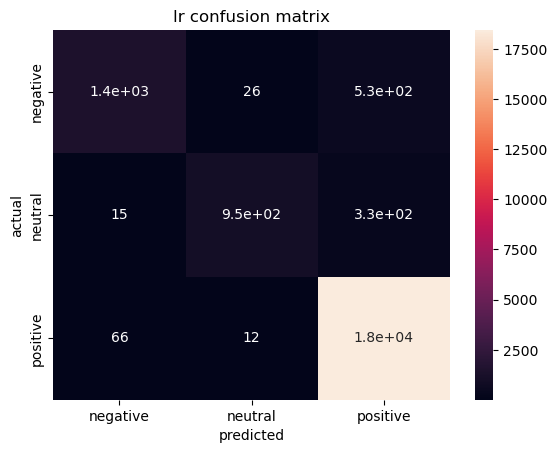

In [9]:
#building the model
lrmodel=LogisticRegression(multi_class='ovr')
lrmodel=lrmodel.fit(x_train_tfi,y_train)

#predicting the model
y_pred_lr = lrmodel.predict(x_test_tfi)

#confusion matrix
cm_lr=confusion_matrix(y_test,y_pred_lr)
sb.heatmap(cm_lr,annot=True,xticklabels=['negative','neutral','positive'],yticklabels=['negative','neutral','positive'])
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('lr confusion matrix')
plt.show()

### Calculating model scores

In [10]:
#accuracy score
ac_lr=accuracy_score(y_test,y_pred_lr)

#precision score
pr_lr=precision_score(y_test,y_pred_lr,average='weighted')

#recall score
re_lr=recall_score(y_test,y_pred_lr,average='weighted')

#f1 score
f1_lr=f1_score(y_test,y_pred_lr,average='weighted')

#train accuracy
y_pred_lrt = lrmodel.score(x_train_tfi,y_train)

print('train accuracy of logistic regression',y_pred_lrt)
print('accuracy of logistic regression',ac_lr)
print('precision of logistic regression',pr_lr)
print('recall score of logistic regression',re_lr)
print('f1 score of logistic regression',f1_lr)

train accuracy of logistic regression 0.9671678077086272
accuracy of logistic regression 0.9549561946699693
precision of logistic regression 0.9548553195006987
recall score of logistic regression 0.9549561946699693
f1 score of logistic regression 0.9522241047301663


### Plotting the roc curve

auc 0.9925658285212385


[]

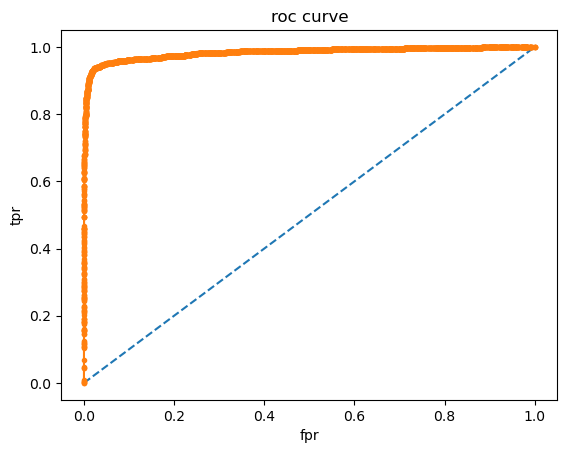

In [11]:
#auc score
auc_lr=roc_auc_score(y_test,lrmodel.predict_proba(x_test_tfi),multi_class='ovr',average='weighted')
print('auc',auc_lr)

#roc curve
lr_probs=lrmodel.predict_proba(x_test_tfi)
lr_auc=roc_auc_score(y_test,lr_probs,multi_class='ovr',average='weighted')
lr_fpr,lr_tpr,_=roc_curve(y_test,lr_probs[:,1],pos_label=1)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(lr_fpr,lr_tpr,marker='.')
plt.title('roc curve')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot()

# Multinomial naive bayes 

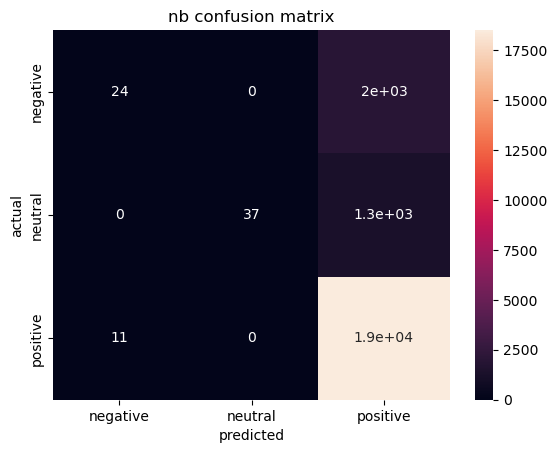

In [12]:
#building the model
nbmodel=MultinomialNB()
nbmodel=nbmodel.fit(x_train_tfi,y_train)

#predicting the model
y_pred_nb = nbmodel.predict(x_test_tfi)

#confusion matrix
cm_nb=confusion_matrix(y_test,y_pred_nb)
sb.heatmap(cm_nb,annot=True,xticklabels=['negative','neutral','positive'],yticklabels=['negative','neutral','positive'])
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('nb confusion matrix')
plt.show()

### Calculating model scores

In [13]:
#accuracy score
ac_nb=accuracy_score(y_test,y_pred_nb)

#precision score
pr_nb=precision_score(y_test,y_pred_nb,average='weighted')

#recall score
re_nb=recall_score(y_test,y_pred_nb,average='weighted')

#f1 score
f1_nb=f1_score(y_test,y_pred_nb,average='weighted')

#train accuracy
y_pred_nbt = nbmodel.score(x_train_tfi,y_train)

print('train accuracy of naive bayes algorithm',y_pred_nbt)
print('accuracy of naive bayes algorithm',ac_nb)
print('precision of naive bayes algorithm',pr_nb)
print('recall score of naive bayes algorithm',re_nb)
print('f1 score of naive bayes algorithm',f1_nb)

train accuracy of naive bayes algorithm 0.84924484810954
accuracy of naive bayes algorithm 0.8514747029952755
precision of naive bayes algorithm 0.8452134192695742
recall score of naive bayes algorithm 0.8514747029952755
f1 score of naive bayes algorithm 0.7863173882438717


### Plotting roc curve

auc 0.9034419876351557


[]

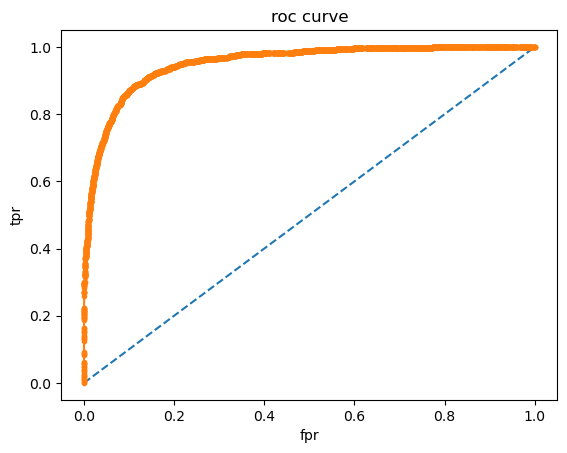

In [14]:
#auc score
auc_nb=roc_auc_score(y_test,nbmodel.predict_proba(x_test_tfi),multi_class='ovr',average='weighted')
print('auc',auc_nb)

#roc curve
nb_probs=nbmodel.predict_proba(x_test_tfi)
nb_auc=roc_auc_score(y_test,nb_probs,multi_class='ovr',average='weighted')
nb_fpr,nb_tpr,_=roc_curve(y_test,nb_probs[:,1],pos_label=1)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(nb_fpr,nb_tpr,marker='.')
plt.title('roc curve')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot()

# Ada boost classification

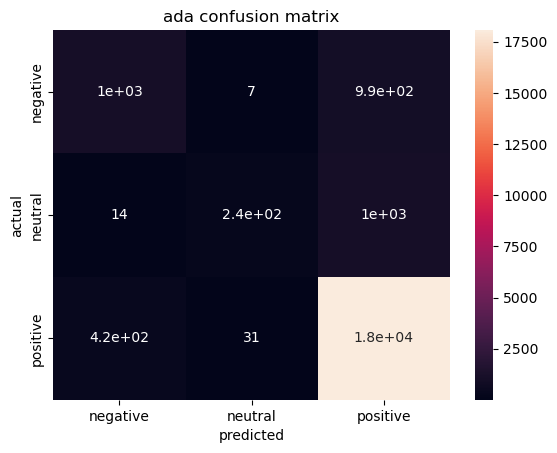

In [16]:
#building the model
admodel=AdaBoostClassifier()
admodel=admodel.fit(x_train_tfi,y_train)

#predicting the model
y_pred_ad = admodel.predict(x_test_tfi)

#confusion matrix
cm_ad=confusion_matrix(y_test,y_pred_ad)
sb.heatmap(cm_ad,annot=True,xticklabels=['negative','neutral','positive'],yticklabels=['negative','neutral','positive'])
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('ada confusion matrix')
plt.show()

### Calculating model scores

In [17]:
#accuracy score
ac_ad=accuracy_score(y_test,y_pred_ad)

#precision score
pr_ad=precision_score(y_test,y_pred_ad,average='weighted')

#recall score
re_ad=recall_score(y_test,y_pred_ad,average='weighted')

#f1 score
f1_ad=f1_score(y_test,y_pred_ad,average='weighted')

#train accuracy
y_pred_adt = admodel.score(x_train_tfi,y_train)

print('train accuracy of adaboost algorithm',y_pred_adt)
print('accuracy of adaboost algorithm',ac_ad)
print('precision of adaboost algorithm',pr_ad)
print('recall score of adaboost algorithm',re_ad)
print('f1 score of adaboost algorithm',f1_ad)

train accuracy of adaboost algorithm 0.8844279308723524
accuracy of adaboost algorithm 0.8854639695426816
precision of adaboost algorithm 0.8786697951418854
recall score of adaboost algorithm 0.8854639695426816
f1 score of adaboost algorithm 0.8662295382805517


### plotting roc curve

auc 0.7756037192885022


[]

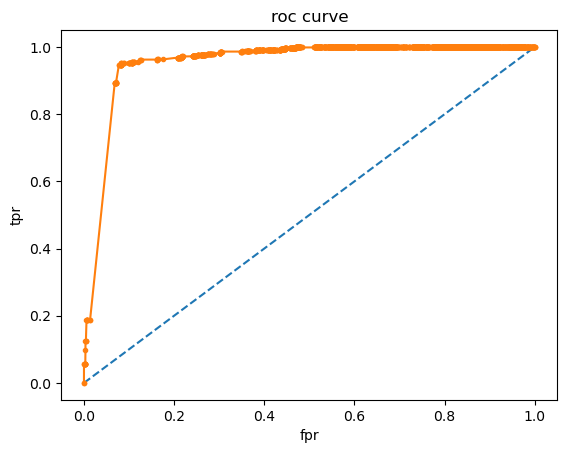

In [18]:
#auc score
auc_ad=roc_auc_score(y_test,admodel.predict_proba(x_test_tfi),multi_class='ovr',average='weighted')
print('auc',auc_ad)

#roc curve
ad_probs=admodel.predict_proba(x_test_tfi)
ad_auc=roc_auc_score(y_test,ad_probs,multi_class='ovr',average='weighted')
ad_fpr,ad_tpr,_=roc_curve(y_test,ad_probs[:,1],pos_label=1)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(ad_fpr,ad_tpr,marker='.')
plt.title('roc curve')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot()

# Knn algorithm

f1 value for K=  1 :is 0.8276844323108328
f1 value for K=  2 :is 0.5899770491845603
f1 value for K=  3 :is 0.5590511623624194
f1 value for K=  4 :is 0.5202037981257484
f1 value for K=  5 :is 0.5314154404456279
f1 value for K=  6 :is 0.4980484773517295
f1 value for K=  7 :is 0.49757366246888834
f1 value for K=  8 :is 0.4777111243477454
f1 value for K=  9 :is 0.4771124925150536
f1 value for K=  10 :is 0.46011890262981076


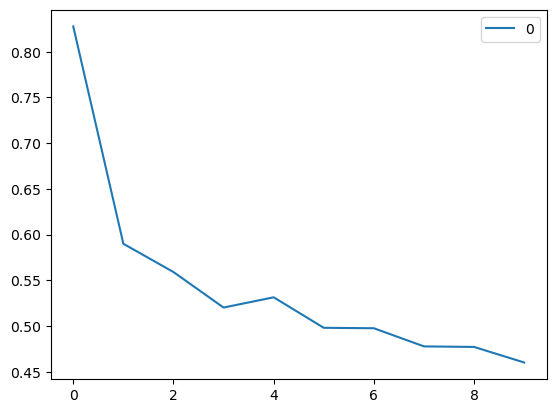

In [109]:
#To find the best value of k for knn algorithm
f1_val = []  
for K in range(10):
    K = K + 1
    model1 = KNeighborsClassifier(n_neighbors=K)   #building the model
    
    model1.fit(x_train_tfi, y_train)       
    y_pred1 = model1.predict(x_test_tfi)           #predict for test data
    f1 = f1_score(y_test, y_pred1,average='weighted')     #calculating f1 score     
    f1_val.append(f1)            
    print('f1 value for K= ', K, ':is', f1)
# Plot the Graph for K Values
curve = pd.DataFrame(f1_val)  # Elbow Curve
curve.plot()
plt.show()

From the elbow curve, we can get the best k value based on f1 score as k=4

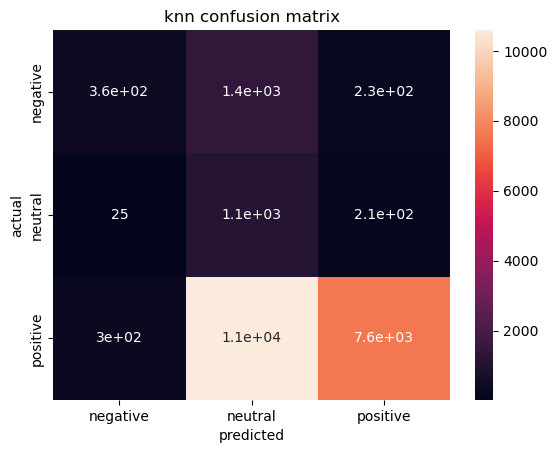

In [19]:
#building the model
knmodel=KNeighborsClassifier(n_neighbors=4)
knmodel=knmodel.fit(x_train_tfi,y_train)

#predicting the model
y_pred_kn = knmodel.predict(x_test_tfi)

#confusion matrix
cm_kn=confusion_matrix(y_test,y_pred_kn)
sb.heatmap(cm_kn,annot=True,xticklabels=['negative','neutral','positive'],yticklabels=['negative','neutral','positive'])
plt.title('knn confusion matrix')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

### Calculating model scores

In [20]:
#accuracy score
ac_kn=accuracy_score(y_test,y_pred_kn)

#precision score
pr_kn=precision_score(y_test,y_pred_kn,average='weighted')

#recall score
re_kn=recall_score(y_test,y_pred_kn,average='weighted')

#f1 score
f1_kn=f1_score(y_test,y_pred_kn,average='weighted')

#train accuracy
y_pred_knt = knmodel.score(x_train_tfi,y_train)

print('train accuracy of knn algorithm',y_pred_knt)
print('accuracy of knn algorithm',ac_kn)
print('precision score of knn algorithm',pr_kn)
print('recall score of knn algorithm',re_kn)
print('f1 score of knn algorithm',f1_kn)

train accuracy of knn algorithm 0.4998337175032396
accuracy of knn algorithm 0.41479748635383695
precision score of knn algorithm 0.8552936866635429
recall score of knn algorithm 0.41479748635383695
f1 score of knn algorithm 0.5202037981257484


### Plotting roc curve

auc 0.7710601927950558


[]

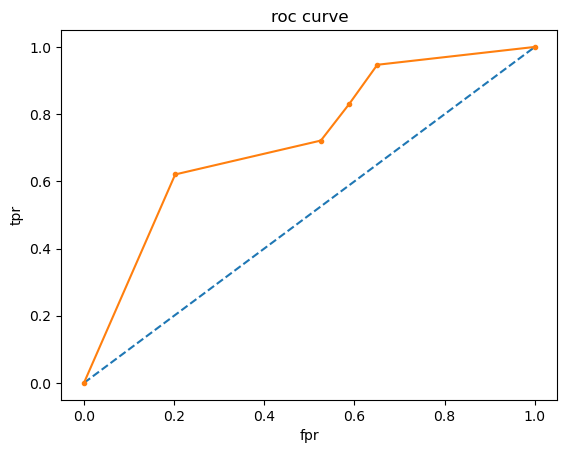

In [21]:
#auc score
auc_kn=roc_auc_score(y_test,knmodel.predict_proba(x_test_tfi),multi_class='ovr',average='weighted')
print('auc',auc_kn)

#roc curve
kn_probs=knmodel.predict_proba(x_test_tfi)
kn_auc=roc_auc_score(y_test,kn_probs,multi_class='ovr',average='weighted')
kn_fpr,kn_tpr,_=roc_curve(y_test,kn_probs[:,1],pos_label=1)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(kn_fpr,kn_tpr,marker='.')
plt.title('roc curve')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot()

### Creating a dataframe with all model scores 

In [22]:
df_acc=pd.DataFrame()
df_acc['test accuracy']=[ac_lr,ac_nb,ac_kn,ac_ad]
df_acc['precision']=[pr_lr,pr_nb,pr_kn,pr_ad]
df_acc['recall']=[re_lr,re_nb,re_kn,re_ad]
df_acc['f1 score']=[f1_lr,f1_nb,f1_kn,f1_ad]
df_acc['train accuracy']=[y_pred_lrt,y_pred_nbt,y_pred_knt,y_pred_adt]
df_acc.rename(index={0:'logistic regression',1:'naive bayes',2:'knn',3:'ada boost'},inplace=True)

### Plotting all model scores 

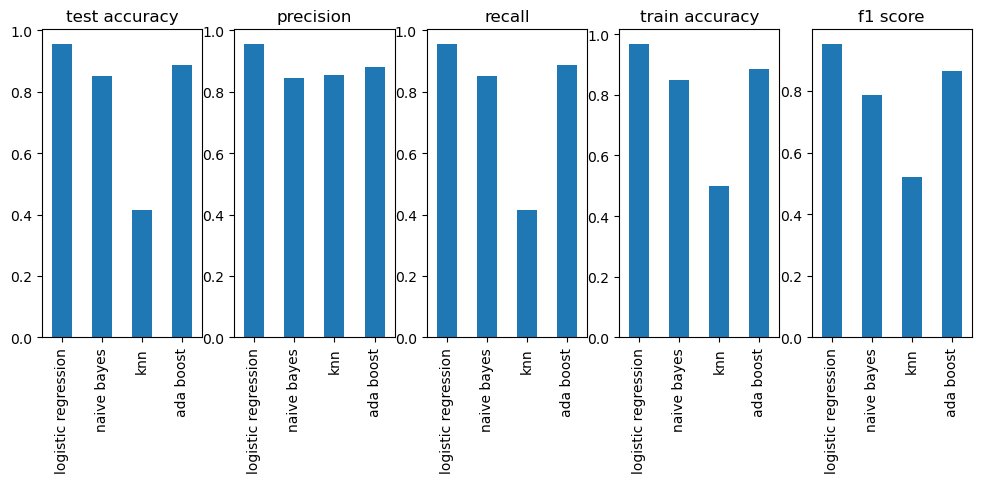

In [23]:
plt.figure(figsize=(12,4))
plt.subplot(151)
plt.title('test accuracy')
df_acc['test accuracy'].plot(kind='bar')

plt.subplot(152)
plt.title('precision')
df_acc['precision'].plot(kind='bar')

plt.subplot(153)
plt.title('recall')
df_acc['recall'].plot(kind='bar')

plt.subplot(154)
plt.title('train accuracy')
df_acc['train accuracy'].plot(kind='bar')

plt.subplot(155)
plt.title('f1 score')
df_acc['f1 score'].plot(kind='bar')
plt.show()

## Observations:

   ### From the above plots, we can see that Logistic regression with multiclass ovr classifier is the best model for prediction in terms of accuracy, f1 score and other scores.
   
   ### Also based on confusion matrix and AUC score, we can say that logistic regression is the best model for predicting the sentiment of customers

# 

# 

## Loading the Video games dataset

In [25]:
vid_df=pd.read_csv('final_video_review.csv')
vid_df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewText,polar,sentiment,brand,main_cat,price
0,5,True,2015-10-17,A1HP7NVNPFMA4N,0700026657,game bit hard hang great,0.036111,positive,Ubisoft,Video Games,7.95
1,4,False,2015-07-27,A1JGAP0185YJI6,0700026657,play alright steam bit trouble game steam hard...,-0.198333,negative,Ubisoft,Video Games,7.95
2,3,True,2015-02-23,A1YJWEXHQBWK2B,0700026657,ok game,0.050000,positive,Ubisoft,Video Games,7.95
3,2,True,2015-02-20,A2204E1TH211HT,0700026657,find game bit complicated expect having play,-0.450000,negative,Ubisoft,Video Games,7.95
4,5,True,2014-12-25,A2RF5B5H74JLPE,0700026657,great game love play arrive,0.300000,positive,Ubisoft,Video Games,7.95


# Exploratory Data Analysis

### What would be the distribution of polarity in the data based on customer feedback?

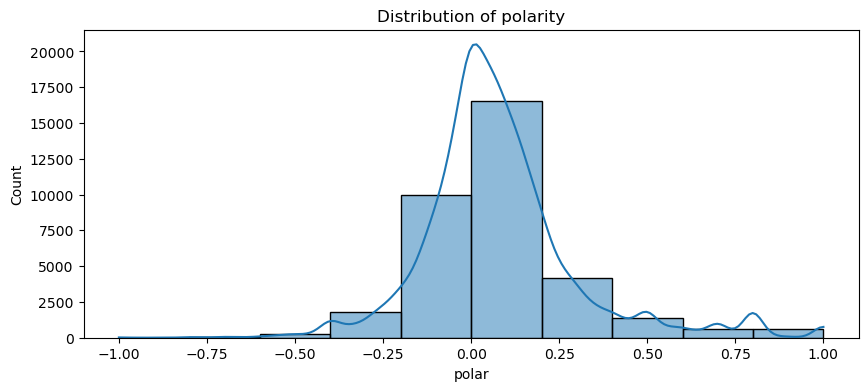

In [156]:
#Plotting polarity values as a histogram
plt.figure(figsize=(10,4))
sb.histplot(vid_df['polar'],binwidth=.2,kde=True)
plt.title('Distribution of polarity')
plt.show()

#### From the graph, we can see that majority of customers are in positive mood based on feedback and in the range of 0 to 0.2. But we can also see some 10 thousand customers in the range of -0.2 to 0 polar values. These customers are somewhat satisfied with the product and if we improve the quality of products we can get them into the positive range.But after 0.2 value the customers are less in number which says that there may be some issue in this category products

## What would be the proportion of customers in terms of sentiment, rating and genuiness of customers?

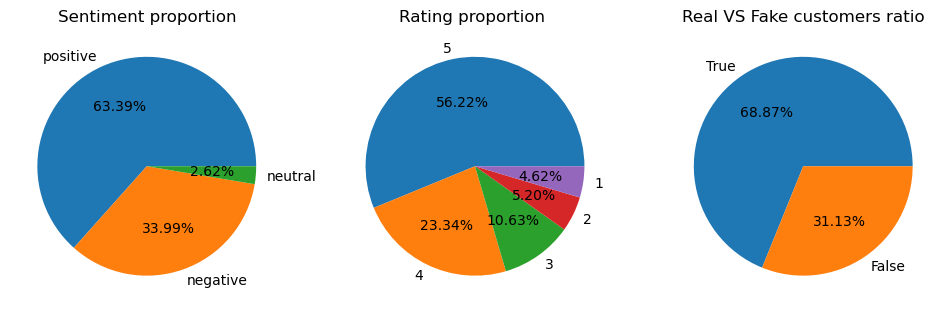

In [157]:
plt.figure(figsize=(12,12))

#Distribution of customers based on sentiment
plt.subplot(131)
plt.pie(vid_df['sentiment'].value_counts(),labels=vid_df['sentiment'].unique(),autopct='%.2f%%')
plt.title('Sentiment proportion')

#distribution of customers based on rating
plt.subplot(132)
plt.pie(vid_df['overall'].value_counts(),labels=vid_df['overall'].unique(),autopct='%.2f%%')
plt.title('Rating proportion ')

#proportion of verified and fake customers
plt.subplot(133)
plt.pie(vid_df['verified'].value_counts(),labels=vid_df['verified'].unique(),autopct='%.2f%%')
plt.title('Real VS Fake customers ratio')
plt.show()

#### From the charts we can see that nearly 63% of customers are positive about products sold and some 3% customers are neither satisfied nor diappointed, and some 34% customers are not so satisfied with the product maybe in terms of quality or price

#### Based on rating, it gives a similar picture about positive customer with nearly 57% customers giving 5 rating, and nearly some 39% customer gave 2,3 and 4 ratings while some 4.5% customers gave rating of 1 whom may be in the negative sentiment category

#### Another thing we must take into account is that nealy 31% customers are not verified customers out of which majority could be fake customers and their ratings and sentiment may affect the information about real feedback from the customers

## Which would be the most preferred and bought product brand by the customers?

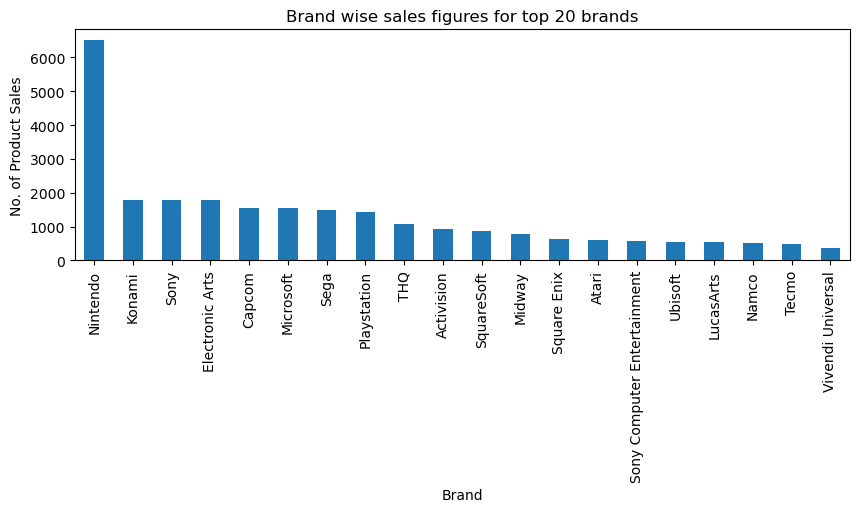

In [158]:
#Distribution of brand in terms of number of units sold under each brand
plt.figure(figsize=(10,3))
vid_df['brand'].value_counts().head(20).plot(kind='bar')
plt.title('Brand wise sales figures for top 20 brands')
plt.xlabel('Brand')
plt.ylabel('No. of Product Sales')
plt.show()

#### In terms of product sales, Nintendo rates first in the list with about 6.5 thousand sales while Vivendi Universal brand is the least in top 20 brands.

#### From this information, we can also optimize the inventory by increasing the Nintendo brand products stock to a bit higher proportion and as Vivendi Universal brand and some other low selling brands stock holders can be allocated to top performing brands in terms of sales

## What would be the list of top 20 customers based on products sold and revenue generated from them individually?

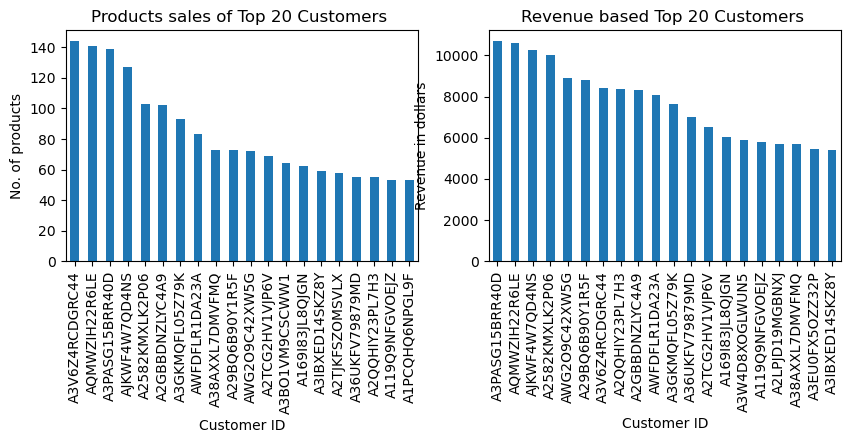

In [160]:
plt.figure(figsize=(10,3))
#Distribution of product sales based on top customers
plt.subplot(121)
vid_df['reviewerID'].value_counts().head(20).plot(kind='bar')
plt.title('Products sales of Top 20 Customers ')
plt.ylabel('No. of products')
plt.xlabel('Customer ID')

##Distribution of revenue from based on top customers
plt.subplot(122)
vid_df['price'].groupby(by=vid_df['reviewerID']).sum().sort_values(ascending=False).head(20).plot(kind='bar')
plt.title('Revenue based Top 20 Customers ')
plt.ylabel('Revenue in dollars')
plt.xlabel('Customer ID')
plt.show()

#### From the data on both charts, we can be able to visualize the most valuable customer from the VIDEO GAMES category. When we look into the product sales count and revenue data, the customer with ID'A3V6Z4RCDGRC44' who has bought the higher number of products is acutally seventh in terms of revenue. So he may be the second most valuable customer and customer with ID 'A3PASG15BRR40D' can be declared as the best customer under this category

## What is the average rating based on various sentiment and do they follow any pattern?

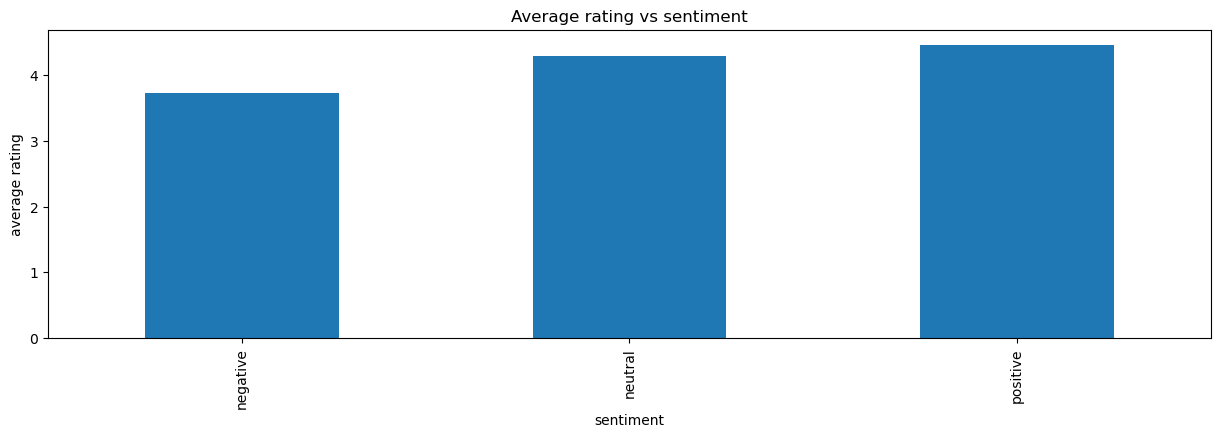

In [162]:
#Average rating based on sentiment feature
plt.figure(figsize=(15,4))
vid_df.groupby('sentiment')['overall'].mean().plot(kind='bar')
plt.title('Average rating vs sentiment')
plt.ylabel('average rating')
plt.show()

#### Based on sentiment, we can see that the rating is less from negative customers, rating is medium from neutral customers, and high from positive customers. Also we can say that rating follows a pattern as the sentiment turns positive gradually from negative through neutral sentiment.

## How does the polarity score spread among the various categories of sentiment and what is the frequency observed in polarity based on individual sentiment levels?

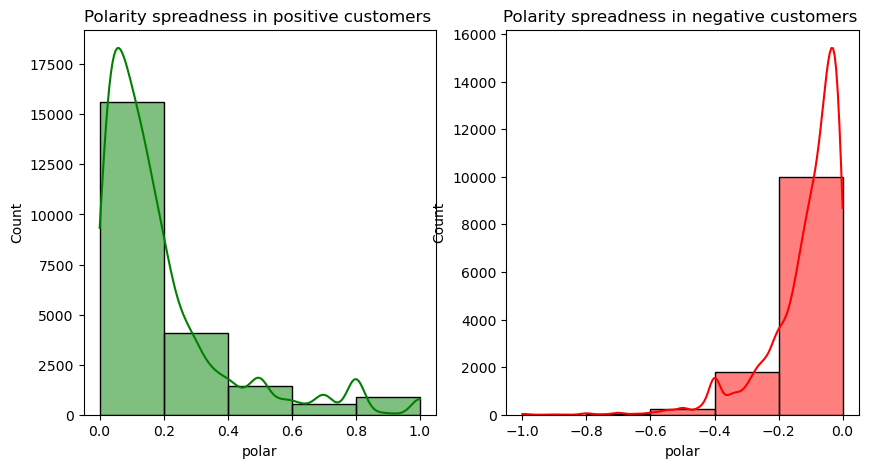

In [163]:
plt.figure(figsize=(10,5))
#Distribution of polarity in customers having positive sentiment
plt.subplot(121)
sb.histplot(vid_df[vid_df['sentiment']=='positive']['polar'],binwidth=.2,kde=True,color='g')
plt.title('Polarity spreadness in positive customers ')

#Distribution of polarity in customers having negative sentiment and also neutral customers technically
plt.subplot(122)
sb.histplot(vid_df[vid_df['sentiment']=='negative']['polar'],binwidth=.2,kde=True,color='r')
plt.title('Polarity spreadness in negative customers ')
plt.show()

#### From these histograms we can say that probability of postive customers is high in terms of numbers generally but in specific if we look, the probability of customers with high polar value among positive customers is low, which means still improvement is needed in various mode of product delivery.

#### When we look into negative data we can see that even neutral customers also included in the graph as it end with value 0 which may add the higher value in the range of -0.19 to 0. Some 500 customers are not satisfied with the service which we need to look into for solutions to make them satisfied.

## Is there any trend in the polarity values with respect to increase in rating from customers?

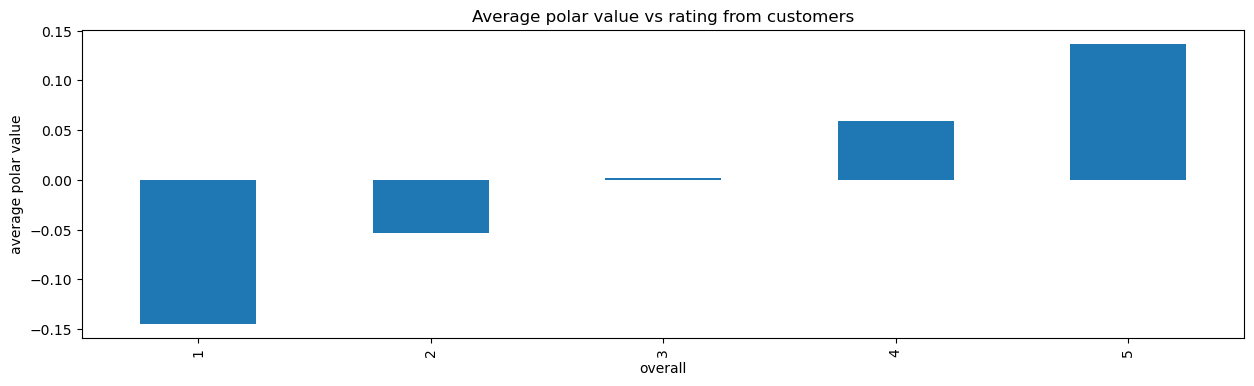

In [164]:
#Average polarity value for each rating category
plt.figure(figsize=(15,4))
vid_df.groupby('overall')['polar'].mean().plot(kind='bar')
plt.title('Average polar value vs rating from customers')
plt.ylabel('average polar value')
plt.show()

#### From the bar plot, we can see that as rating increases the polarity of review from customers increases proportionally. So we can easily interpret from rating whether the customer is satisfied or not.

## Does the sentiment and rating get affected by the price of the product?

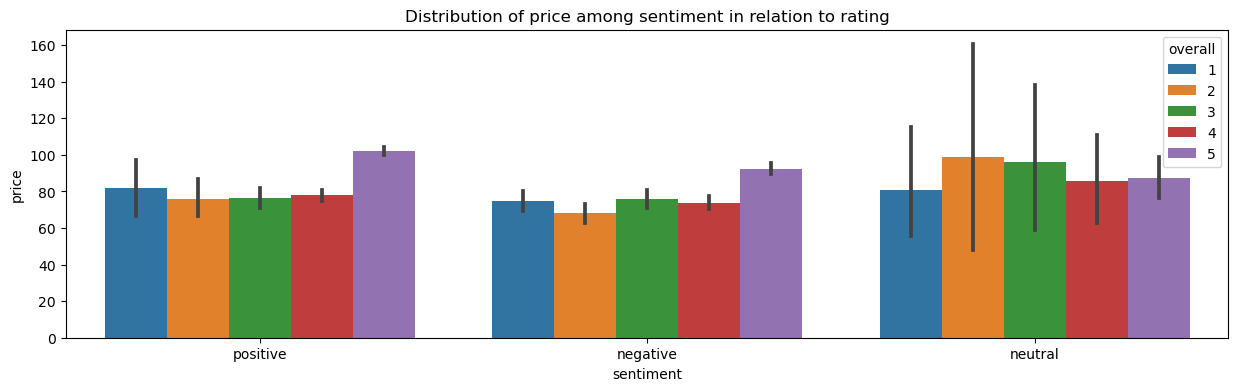

In [165]:
#Distribution of average price throughout sentiment and rating feature
plt.figure(figsize=(15,4))
sb.barplot(hue=vid_df['overall'],x=vid_df['sentiment'],y=vid_df['price'])
plt.title('Distribution of price among sentiment in relation to rating')
plt.show()

#### From above chart, we can interpret that overall price increase happens as the rating increases irrespective of sentiment. The highest average price is seen in negative sentiment with rating 5. This maybe a case where the customer feel that the product quality is best but in terms of price he is not satisfies with the price to quality aspect. It may be the case in whole negative customers.

#### While looking into neutral customers, the price remains almost constant with minor fluctuations which could be due to some other issues but in general the neutral customers keep in mind both quality and price while rating the product.

#### Positive customers have average price with rating 5 higher meaning it could be that they donot mind about price and just look into quality of product while rating the service.

## Does individual review from customers give us any information about overall sentiment about products?

### Applying the user defined function for word count used in toy dataset and plotting most frequent words

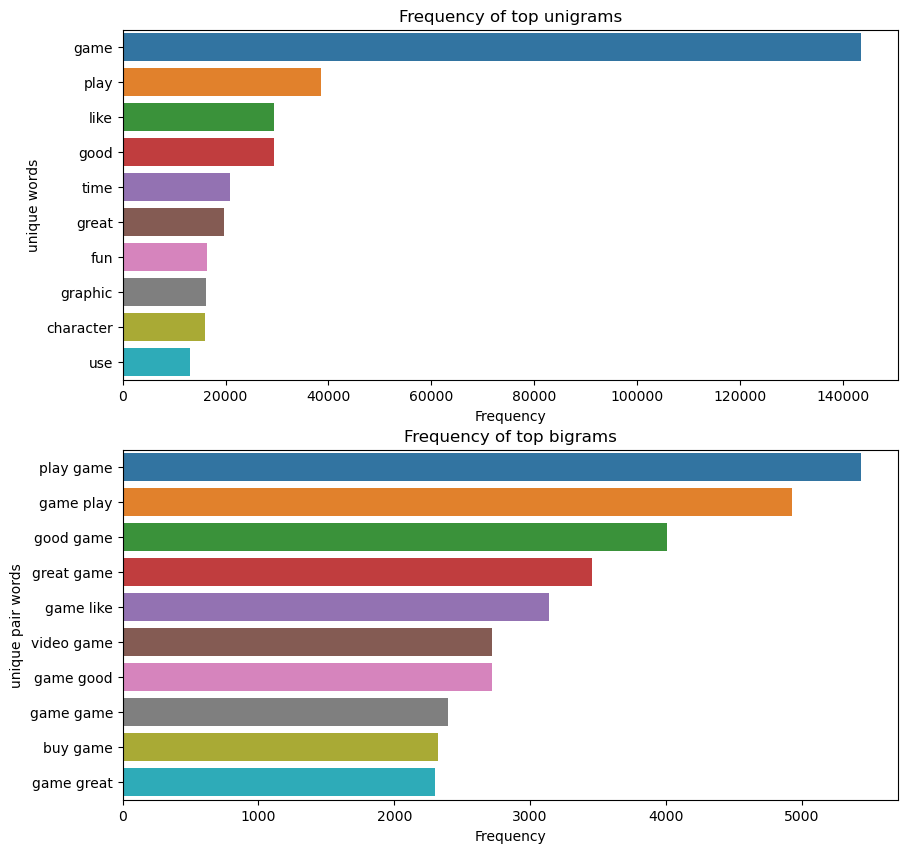

In [166]:
plt.figure(figsize=(10,10))
# Visualising the most frequent unigrams in the reviews
top_unigrams = get_top_ngram(vid_df['reviewText'],1)[:10]
x,y = map(list,zip(*top_unigrams))
plt.subplot(211)
sb.barplot(x = y,y = x)
plt.title('Frequency of top unigrams')
plt.ylabel('unique words')
plt.xlabel('Frequency')

# Visualising the most frequent bigrams in the reviews
plt.subplot(212)
top_bigrams = get_top_ngram(vid_df['reviewText'],2)[:10]
x,y = map(list,zip(*top_bigrams))
sb.barplot(x = y,y = x)
plt.title('Frequency of top bigrams')
plt.ylabel('unique pair words')
plt.xlabel('Frequency')
plt.show()

#### From the above graphs, we can see that word 'play','love','like are the most frequent words representing the overall satisfaction among customers. Also other unique words also depict that the sentiment is positive.

#### From other graph, we can see that some words like 'great game' , 'good game' and some words indicating the age are repeating.this gives us a picture that overall satisfation of customers is good.

# 

## Data Clustering using K-Means Clustering on Video games dataset

### Creating dummy variables for sentiment analysis 

In [7]:
sent=pd.get_dummies(vid_df['sentiment'],prefix='sentiment')
sent.head()

,sentiment_negative,sentiment_neutral,sentiment_positive
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


We get three columns with dummy variables for each class of sentiment feature

### Concatenating the main data frame with dummy dataset

In [8]:
vid_df_dum=pd.concat([vid_df,sent],axis='columns')          #concatenation
vid_df_dum.drop('sentiment',axis='columns',inplace=True)    #dropping the main sentiment feature
vid_df_dum.head()

,overall,verified,reviewTime,reviewerID,asin,reviewText,polar,brand,main_cat,price,sentiment_negative,sentiment_neutral,sentiment_positive
0,5,True,2015-10-17,A1HP7NVNPFMA4N,0700026657,game bit hard hang great,0.036111,Ubisoft,Video Games,7.95,0,0,1
1,4,False,2015-07-27,A1JGAP0185YJI6,0700026657,play alright steam bit trouble game steam hard...,-0.198333,Ubisoft,Video Games,7.95,1,0,0
2,3,True,2015-02-23,A1YJWEXHQBWK2B,0700026657,ok game,0.050000,Ubisoft,Video Games,7.95,0,0,1
3,2,True,2015-02-20,A2204E1TH211HT,0700026657,find game bit complicated expect having play,-0.450000,Ubisoft,Video Games,7.95,1,0,0
4,5,True,2014-12-25,A2RF5B5H74JLPE,0700026657,great game love play arrive,0.300000,Ubisoft,Video Games,7.95,0,0,1


#### Extracting the required features for clustering into a new variable

In [9]:
x=vid_df_dum[['overall','price','sentiment_negative','sentiment_neutral','sentiment_positive']]

#### Scaling the data using standard scalar function to get all the values in the same range

In [10]:
#scaling the data,fitting and transforming the data
scaled_x=StandardScaler().fit_transform(x)

In [11]:
#find best k value
error=[]                 #list for appending errors
n_scores=[]              #list for appending silhoutte scores
for k in range(2,8):
    kmodel=KMeans(n_clusters=k,random_state=1)                #defining the model
    kmodel.fit(scaled_x)                                      #fitting the model into the scaled data
    error.append(kmodel.inertia_)                              #finding the error and adding to error list
    n_scores.append(silhouette_score(scaled_x,kmodel.labels_)) #finding the score and adding to score list

### Plotting the data of error and silhoutte scores for various k value.

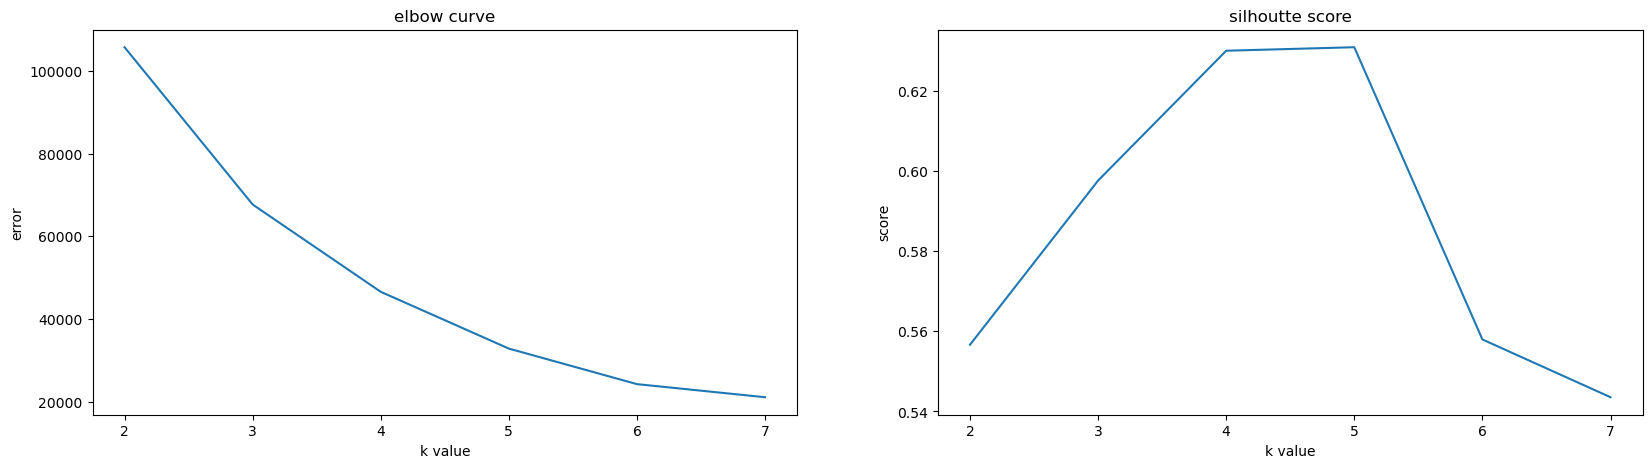

In [12]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(range(2,8),error)
plt.title('elbow curve')
plt.xlabel('k value')
plt.ylabel('error')

plt.subplot(122)
plt.plot(range(2,8),n_scores)
plt.title('silhoutte score')
plt.xlabel('k value')
plt.ylabel('score')
plt.show()

### We find that best k value from above graphs is 5

### Building k means with cluster k=5

In [16]:
k=5
km_model=KMeans(n_clusters=k,random_state=1)
km_model.fit(scaled_x)

KMeans(n_clusters=5, random_state=1)

### Predicting the clusters and storing them as a column with classes in the main data created for clustering

In [17]:
vid_df_dum['cluster']=km_model.predict(scaled_x)

### Calculating the mean value of all features in cluster data based on cluster class 

In [18]:
mean_val=vid_df_dum.groupby('cluster').mean()                                    #mean of all values
mean_val['percent']=vid_df_dum['cluster'].value_counts(normalize=True)*100       #creating percentage of customers based on cluster classes
mean_val

,overall,verified,polar,price,sentiment_negative,sentiment_neutral,sentiment_positive,percent
cluster,,,,,,,,
0,4.500742,0.342711,0.189451,64.217067,0.000000,0.0,1.000000,58.723871
1,4.629855,0.229882,-0.098249,72.479406,1.000000,0.0,0.000000,21.192965
2,4.292605,0.810289,0.000000,87.272497,0.000000,1.0,0.000000,2.621376
3,4.546603,0.418521,0.173979,545.307733,0.160553,0.0,0.839447,4.672398
4,2.066344,0.160589,-0.132015,63.673524,0.941564,0.0,0.058436,12.789391


### Plotting the average values dataset

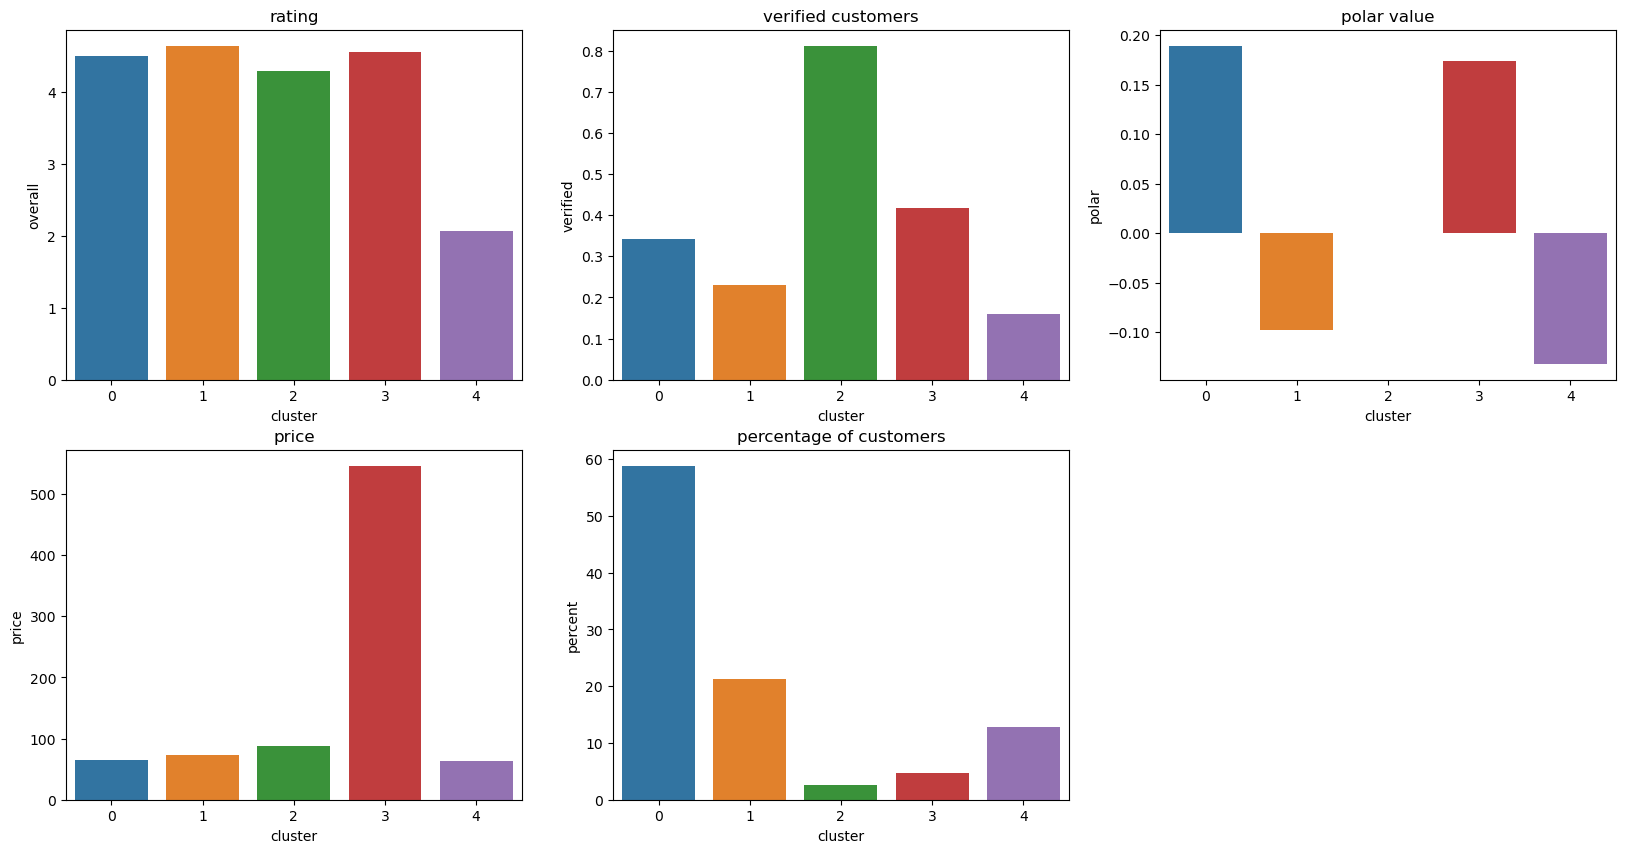

In [19]:
plt.figure(figsize=(20,10))
plt.subplot(231)
sb.barplot(mean_val.index,mean_val['overall'])
plt.title('rating')

plt.subplot(232)
sb.barplot(mean_val.index,mean_val['verified'])
plt.title('verified customers')

plt.subplot(233)
sb.barplot(mean_val.index,mean_val['polar'])
plt.title('polar value')

plt.subplot(234)
sb.barplot(mean_val.index,mean_val['price'])
plt.title('price')

plt.subplot(235)
sb.barplot(mean_val.index,mean_val['percent'])
plt.title('percentage of customers')
plt.show()

## Observations:

### Cluster 0:

   #### This cluster has a average rating of 4.50, verification genuiness at 34%, polarity at 0.19, average price at $64.20 and sentiment is positive. 59% of customers come under this category. They can be named as Loyal customers.
   
### Cluster 1:

   #### This cluster has a average rating of 4.62, verification genuiness at 23%, polarity at -0.09, average price at $72.5 and sentiment is negative. 22% of customers come under this category. They can be named as Angry customers.
   
### Cluster 2:

   #### This cluster has a average rating of 4.29, verification genuiness at 82%, polarity at 0, average price at $87.27 and sentiment is neutral. 10% of customers come under this category. They can be named as Average customers.
   
#### Cluster 3:

   #### This cluster has a average rating of 4.55, verification genuiness at 42%, polarity at 0.17, average price at $545.30 and sentiment is relatively positive in this category. 4.7% of customers come under this category. They can be named as Satisfied customers.
   
#### Cluster 4:

   #### This cluster has a average rating of 2.01, verification genuiness at 16%, polarity at -0.13, average price at $63.70 and sentiment is relatively negative in this category. Also in this category genuiness is too low. So this category may indicate fake customers too. 12% of customers come under this category. They can be named as Impassive customers.

# Time series modelling on Video games dataset

# Modelling for positive sentiment through time

In [13]:
#Creating a dataset with polarity and review time from main data where sentiment is positive
pos_vid=vid_df[vid_df['sentiment']=='positive'][['reviewTime','polar']]

#Converting the date feature into standard datetime feature
pos_vid['reviewTime'] = pd.to_datetime(pos_vid['reviewTime'], dayfirst = True)

#Setting the datetime feature as index of data 
pos_vid.set_index("reviewTime", inplace=True)
pos_vid.head()

,polar
reviewTime,
2015-10-17,0.036111
2015-02-23,0.050000
2014-12-25,0.300000
2014-02-21,0.027841
2013-06-27,0.278788


In [14]:
#Resampling data from daily data to monthly average data
pos_vid=pos_vid.resample('M').mean()
pos_vid.head()

,polar
reviewTime,
1999-11-30,0.390000
1999-12-31,0.170325
2000-01-31,NaN
2000-02-29,0.040521
2000-03-31,0.095381


We can see that in the above data there are many nan values and we need to impute data to eliminate nan values

In [15]:
#imputation of missing data by interpolation method with time as ffactor
pos_vid['polar'].interpolate(method='time',inplace=True)
pos_vid.head()

,polar
reviewTime,
1999-11-30,0.390000
1999-12-31,0.170325
2000-01-31,0.103260
2000-02-29,0.040521
2000-03-31,0.095381


### Decomposing the data into components of time series to analyse the data

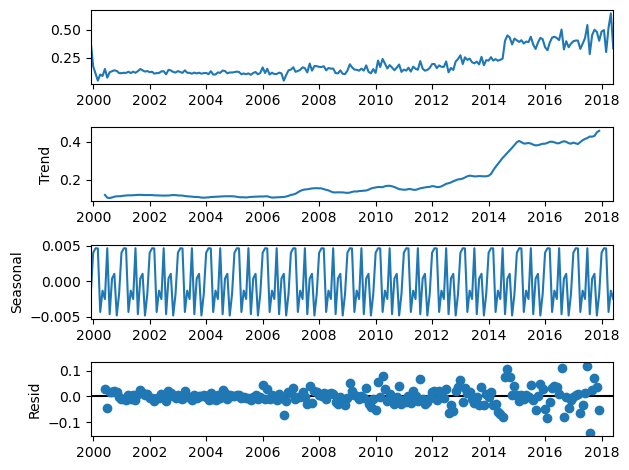

In [16]:
seasonal_decompose(pos_vid).plot()
plt.show()

From the above plot we can see that there is a trend in the data ,seasonal components show us that for each year at the same time there is a same pattern in polarity, then incase of noise initially there is not a lot of noise and in end stages the noise is a bit high 

## Applying stationarity function to positive time series data

In [17]:
adfullerm(pos_vid)

'data is not stationary'

Data is not stationary. we need to smooth the data. Here we use shift function to find the lagged data.

In [18]:
pos_vid_diff=pos_vid-pos_vid.shift(1)    #lagged data through shift function
pos_vid_diff.dropna(inplace=True)        #dropping null values

## Again applying stationarity function in lagged data

In [19]:
adfullerm(pos_vid_diff)

'data is stationary'

We got the lagged data as stationary data with shift 1

#### After getting stationary data, now we apply pacf and acf plotting from statsmodels library in form of lollipop plot

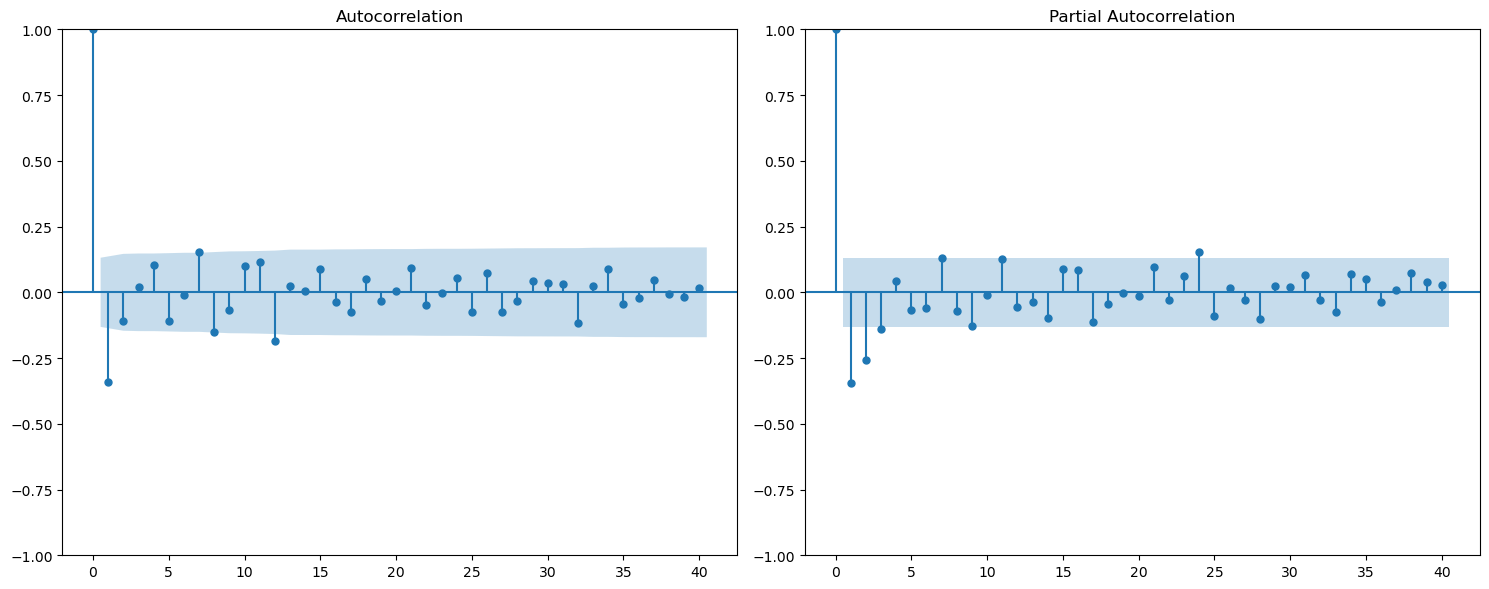

In [20]:
#plotting acf and pacf
fig = plt.figure(figsize=(15, 6))

# Show ACF
ax1 = fig.add_subplot(121)
plot_acf(pos_vid_diff, lags=40, ax=ax1)

# Show PACF
ax2 = fig.add_subplot(122)
plot_pacf(pos_vid_diff, lags=40, ax=ax2)

plt.tight_layout()

from the graph, we can see that in acf plot, AR(p) value as 2 and from pacf plot, MA(q) value as 3.

From these values, we get p,d,q values and do trial and error for best model with ljung box test and aic score

### split the data into train and test

In [22]:
ss = int(0.7 * len(pos_vid_diff))         #finding the length of train

train = pos_vid_diff['polar'].iloc[:ss]      #indexing the train data
test = pos_vid_diff['polar'].iloc[ss:]       #indexing the test data
print("train = {}, test = {}".format(len(train), len(test)))

train = 155, test = 67


In [21]:
#choosing the best values after looking for best aic and check for goodness on trial and error
p=2
d=1
q=3

## Building the sarima model

In [40]:
model_ma = SARIMAX(train, order=(p,d,q),seasonal_order=(p,d,q,12))      #Building the model with seasonal components
model_fitted = model_ma.fit()                                            #fitting the model
print(model_fitted.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              polar   No. Observations:                  155
Model:             SARIMAX(2, 1, 3)x(2, 1, 3, 12)   Log Likelihood                 260.070
Date:                            Sun, 23 Apr 2023   AIC                           -498.139
Time:                                    00:52:53   BIC                           -465.625
Sample:                                12-31-1999   HQIC                          -484.927
                                     - 10-31-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3641      0.555     -2.458      0.014      -2.452      -0.276
ar.L2         -0.5248      0.294   

## Using Ljung box method to find the goodness of the model

In [41]:
lj_pval=sm.stats.acorr_ljungbox(model_fitted.resid,lags=[1],return_df=True)['lb_pvalue'].values[0]
if lj_pval>0.05:
    print('good model')
else:
    print('bad model')

good model


After finding a good model, the model is predicted for the length of test data as below

In [42]:
pred=model_fitted.predict(len(train),len(train)+len(test))    #predicting the data from end of train data upto length of test data 
pred

2012-11-30   -0.034598
2012-12-31    0.015373
2013-01-31    0.010634
2013-02-28   -0.007278
2013-03-31    0.003476
                ...   
2018-02-28   -0.007932
2018-03-31    0.009497
2018-04-30    0.010957
2018-05-31   -0.009060
2018-06-30    0.019704
Freq: M, Name: predicted_mean, Length: 68, dtype: float64

### Creating a dataset with actual test data and predicted data

In [43]:
actual,predicted=[],[]            #Lists for actual and predicted data
for i in range(len(pred)-1):
    actual.append(test.iloc[i])      #adding actual data to actual list
    predicted.append(pred.iloc[i])   #adding pred data to predicted list
new_df=pd.DataFrame({'actual':actual,'predicted':predicted})    #creating dataframe with both lists
new_df['error']=new_df['actual'] - new_df['predicted']          #finding difference of actual and pred data as error data in same dataframe

### Plotting the actual and pred data to visualize the spread of data

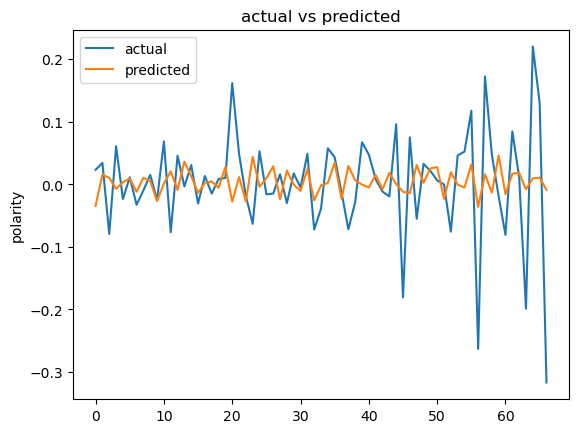

In [44]:
new_df[['actual','predicted']].plot()
plt.title('actual vs predicted')
plt.ylabel('polarity')
plt.show()

There may be difference between actual and predicted values but overall the data follows somewhat similar pattern

### Forecasting the data for next three years

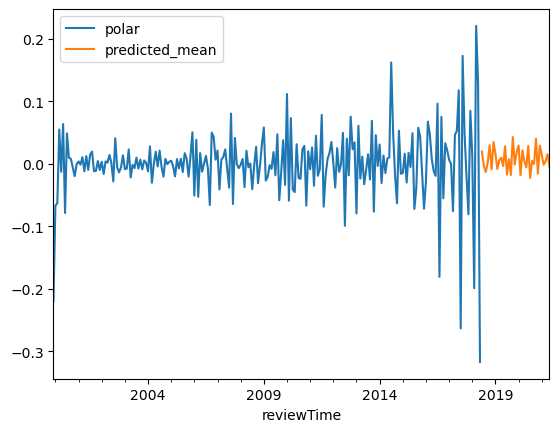

In [45]:
frst=model_fitted.predict(len(pos_vid_diff),len(pos_vid_diff)+35)    #predicting the model for next 36 values
pos_vid_diff['polar'].plot(legend=True)                              #plotting actual data
frst.plot(legend=True)                                               #plotting forecast data in the same plot
plt.show()

## Modelling for negative sentiment through time

In [24]:
#Creating a dataset with polarity and review time from main data where sentiment is negative
neg_vid=vid_df[vid_df['sentiment']=='negative'][['reviewTime','polar']]

#Converting the date feature into standard datetime feature
neg_vid['reviewTime'] = pd.to_datetime(neg_vid['reviewTime'], dayfirst = True)

#Setting the datetime feature as index of data
neg_vid.set_index("reviewTime", inplace=True)
neg_vid.head()

,polar
reviewTime,
2015-07-27,-0.198333
2015-02-20,-0.450000
2014-11-13,-0.050000
2014-08-02,-0.121429
2014-03-03,-0.078231


In [25]:
#Resampling data from daily data to monthly average data
neg_vid=neg_vid.resample('M').mean()
neg_vid.head()

,polar
reviewTime,
1999-11-30,-0.176667
1999-12-31,NaN
2000-01-31,-0.071598
2000-02-29,NaN
2000-03-31,NaN


We can see that in the above data there are many nan values and we need to impute data to eliminate nan values

In [26]:
#imputation of missing data by interpolation method with time as factor
neg_vid['polar'].interpolate(method='time',inplace=True)
neg_vid.head()

,polar
reviewTime,
1999-11-30,-0.176667
1999-12-31,-0.124132
2000-01-31,-0.071598
2000-02-29,-0.096394
2000-03-31,-0.122900


## Decomposing the data into components of time series to analyse the data

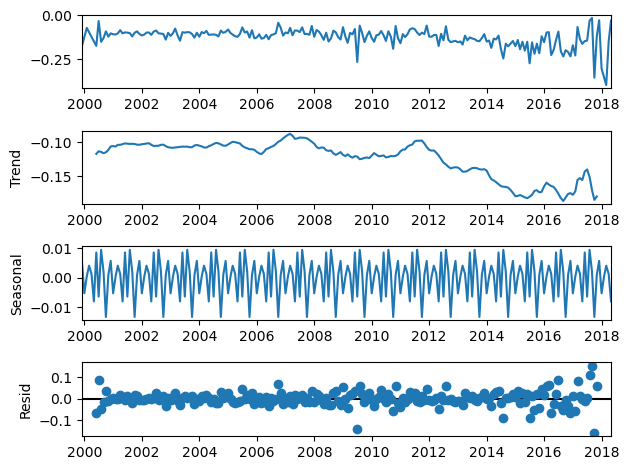

In [27]:
seasonal_decompose(neg_vid).plot()
plt.show()

From the above plot we can see that there is not a great trend in the data ,seasonal components show us that for each year at the same time there is a same pattern in polarity but seasonality is not invloved much, then incase of noise initially there is not a lot of noise and in end stages the noise is a bit high

## Applying stationarity function to positive time series data

In [28]:
adfullerm(neg_vid)

'data is not stationary'

Data is not stationary. we need to smooth the data. Here we use shift function to find the lagged data.

In [29]:
neg_vid_diff=neg_vid-neg_vid.shift(1)   #lagged data through shift function
neg_vid_diff.dropna(inplace=True)       #dropping null values

## Again applying stationarity function in lagged data

In [33]:
adfullerm(neg_vid_diff)

'data is stationary'

We got the lagged data as stationary data with shift 1

#### After getting stationary data, now we apply pacf and acf plotting from statsmodels library in form of lollipop plot

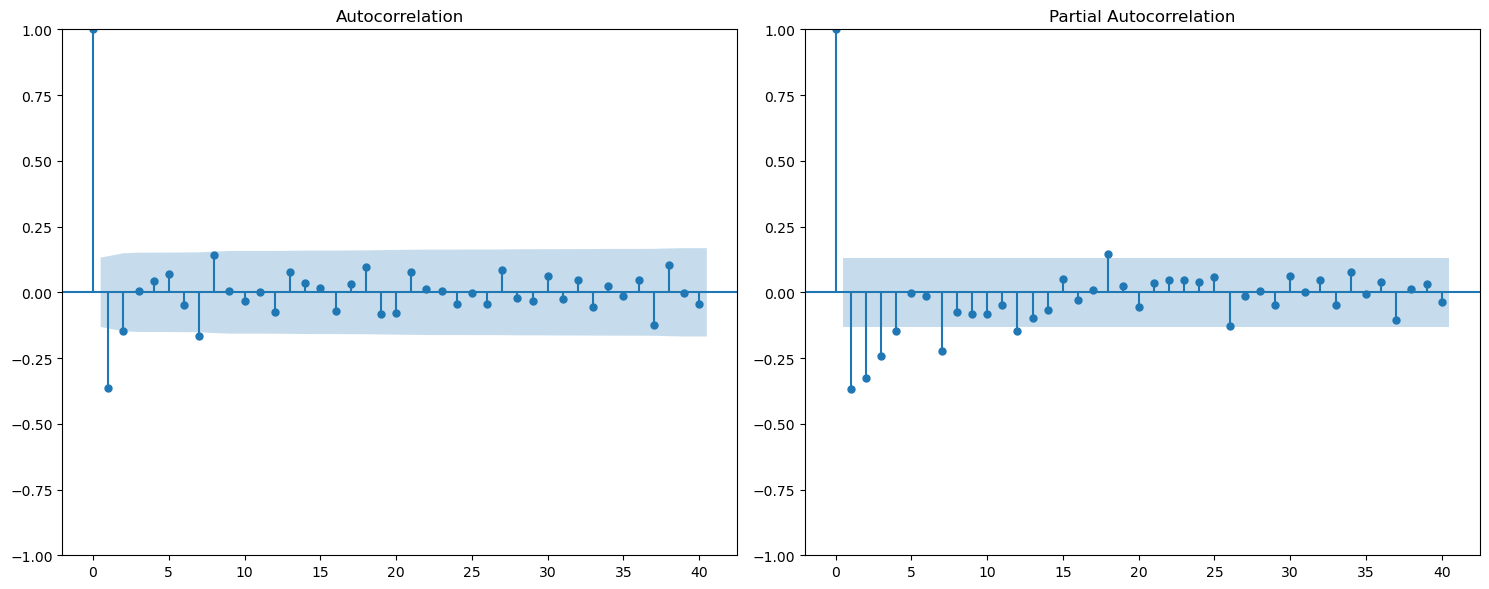

In [34]:
#plotting acf and pacf
fig = plt.figure(figsize=(15, 6))

# Show ACF
ax1 = fig.add_subplot(121)
plot_acf(neg_vid_diff, lags=40, ax=ax1)

# Show PACF
ax2 = fig.add_subplot(122)
plot_pacf(neg_vid_diff, lags=40, ax=ax2)

plt.tight_layout()

from the graph, we can see that in acf plot, AR(p) value as 2 and from pacf plot, MA(q) value as 4.

From these values, we get p,d,q values and do trial and error for best model with ljung box test and aic score

### Split the data into train and test

In [391]:
ss = int(0.9 * len(neg_vid_diff))       #finding the length of train

train = neg_vid_diff['polar'].iloc[:ss]     #indexing the train data
test = neg_vid_diff['polar'].iloc[ss:]      #indexing the test data
print("train = {}, test = {}".format(len(train), len(test)))

train = 198, test = 23


In [390]:
#choosing the best values after looking for best aic and check for goodness on trial and error below
p=2
d=1
q=4

## Building the arima model

In [393]:
model_ma = ARIMA(train, order=(p,d,q))              #Building the model with seasonal components
model_fitted = model_ma.fit()
print(model_fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  polar   No. Observations:                  198
Model:                 ARIMA(2, 1, 4)   Log Likelihood                 397.472
Date:                Sun, 23 Apr 2023   AIC                           -780.945
Time:                        13:16:56   BIC                           -757.962
Sample:                    12-31-1999   HQIC                          -771.641
                         - 05-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7853      0.114    -15.599      0.000      -2.010      -1.561
ar.L2         -0.9181      0.107     -8.579      0.000      -1.128      -0.708
ma.L1         -0.1293      0.122     -1.064      0.2

From the above arima models, we can see that the values selected from pacf and acf.

### Using Ljung box method to find the goodness of the model

In [394]:
lj_pval=sm.stats.acorr_ljungbox(model_fitted.resid,lags=[1],return_df=True)['lb_pvalue'].values[0]
if lj_pval>0.05:
    print('good model')
else:
    print('bad model')

good model


After finding a good model, the model is predicted for the length of test data as below

In [395]:
pred=model_fitted.predict(len(train),len(train)+len(test))   #predicting the data from end of train data upto length of test data 
pred

2016-06-30   -0.024037
2016-07-31   -0.016960
2016-08-31    0.014316
2016-09-30   -0.012575
2016-10-31    0.006720
2016-11-30   -0.003039
2016-12-31   -0.003331
2017-01-31    0.006150
2017-02-28   -0.010508
2017-03-31    0.010527
2017-04-30   -0.011733
2017-05-31    0.008696
2017-06-30   -0.007339
2017-07-31    0.002533
2017-08-31   -0.000370
2017-09-30   -0.004251
2017-10-31    0.005343
2017-11-30   -0.008222
2017-12-31    0.007187
2018-01-31   -0.007869
2018-02-28    0.004864
2018-03-31   -0.004045
2018-04-30    0.000170
2018-05-31    0.000824
Freq: M, Name: predicted_mean, dtype: float64

## Creating a dataset with actual test data and predicted data

In [396]:
actual,predicted=[],[]                   #Lists for actual and predicted data
for i in range(len(pred)-1):
    actual.append(test.iloc[i])              #adding actual data to actual list
    predicted.append(pred.iloc[i])           #adding pred data to predicted list
new_df=pd.DataFrame({'actual':actual,'predicted':predicted})        #creating dataframe with both lists
new_df['error']=new_df['actual'] - new_df['predicted']              #finding difference of actual and pred data as error data in same dataframe

## Plotting the actual and pred data to visualize the spread of data

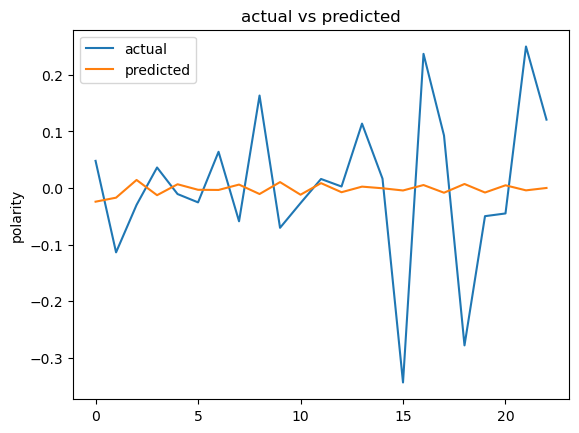

In [397]:
new_df[['actual','predicted']].plot()
plt.title('actual vs predicted')
plt.ylabel('polarity')
plt.show()

There is certain difference between actual and predicted values and the data follows somewhat similar pattern as the test data

## Forecasting the data for next three years

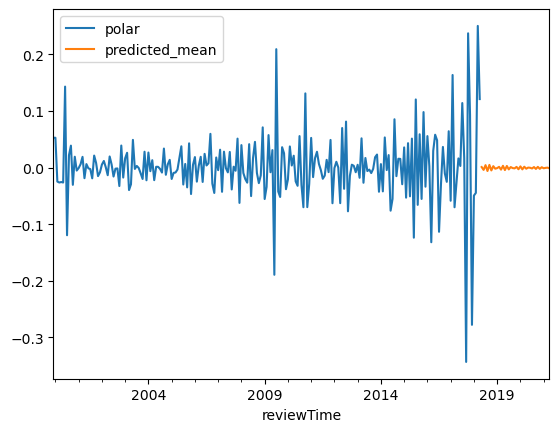

In [398]:
frst=model_fitted.predict(len(neg_vid_diff),len(neg_vid_diff)+35)       #predicting the model for next 36 values
neg_vid_diff['polar'].plot(legend=True)                                 #plotting actual data
frst.plot(legend=True)                                                  #plotting forecast data in the same plot
plt.show()

In [399]:
"""P=2
for D in range (1,3):
    for Q in range (1,10): 
            model_ma = ARIMA(train, order=(p,d,q),seasonal_order=(P,D,Q,12))
            model_fitted = model_ma.fit()
            lj_pval=sm.stats.acorr_ljungbox(model_fitted.resid,lags=[1],return_df=True)['lb_pvalue'].values[0]
            if lj_pval>0.05:
                print(P,D,Q)
            else:
                print('bad')"""

"P=2\nfor D in range (1,3):\n    for Q in range (1,10): \n            model_ma = ARIMA(train, order=(p,d,q),seasonal_order=(P,D,Q,12))\n            model_fitted = model_ma.fit()\n            lj_pval=sm.stats.acorr_ljungbox(model_fitted.resid,lags=[1],return_df=True)['lb_pvalue'].values[0]\n            if lj_pval>0.05:\n                print(P,D,Q)\n            else:\n                print('bad')"

## Modelling for sentiment on most frequent product through time

In [45]:
#Creating a dataset with polarity and review time from main data for most frequent product selled
prdt_vid=vid_df[vid_df['asin']==(vid_df['asin'].value_counts().index[0])][['reviewTime','polar']]

#Converting the date feature into standard datetime feature
prdt_vid['reviewTime'] = pd.to_datetime(prdt_vid['reviewTime'], dayfirst = True)

#Setting the datetime feature as index of data
prdt_vid.set_index("reviewTime", inplace=True)
prdt_vid.head()

,polar
reviewTime,
2006-11-18,0.360000
2006-08-28,0.130556
2006-04-28,0.063019
2018-04-06,-0.025000
2018-04-02,-0.033333


In [46]:
#Resampling data from daily data to monthly average data
prdt_vid=prdt_vid.resample('M').mean()
prdt_vid.head()

,polar
reviewTime,
2006-04-30,0.063019
2006-05-31,NaN
2006-06-30,NaN
2006-07-31,NaN
2006-08-31,0.130556


We can see that in the above data there are many nan values and we need to impute data to eliminate nan values

In [47]:
#imputation of missing data by interpolation method with time as factor
prdt_vid['polar'].interpolate(method='time',inplace=True)
prdt_vid.head()

,polar
reviewTime,
2006-04-30,0.063019
2006-05-31,0.080040
2006-06-30,0.096513
2006-07-31,0.113534
2006-08-31,0.130556


## Decomposing the data into components of time series to analyse the data

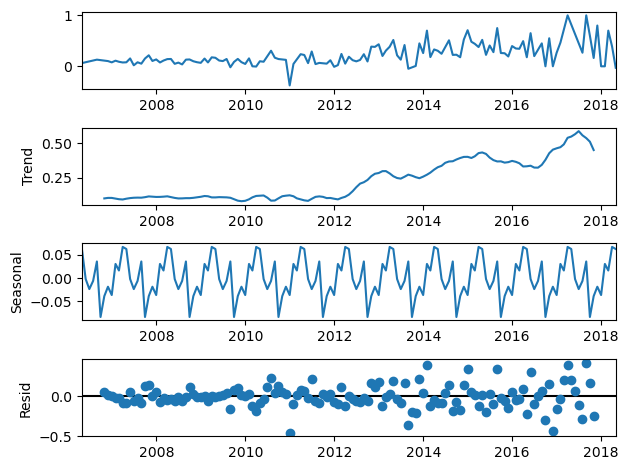

In [80]:
seasonal_decompose(prdt_vid).plot()
plt.show()

From the above plot we can see that there is a trend in the data ,seasonal components show us that for each year at the same time there is a same pattern in polarity, then incase of noise there are a lot of noise in the later stages maybe because of imputation and the noise is high in second half cases

## Applying stationarity function to product time series data

In [81]:
adfullerm(prdt_vid)

'data is not stationary'

Data is not stationary. we need to smooth the data. Here we use shift function to find the lagged data.

In [48]:
prdt_vid_diff=prdt_vid-prdt_vid.shift(1)  #lagged data through shift function
prdt_vid_diff.dropna(inplace=True)

## Again applying stationarity function in lagged data

In [93]:
adfullerm(prdt_vid_diff)

'data is stationary'

We got the lagged data as stationary data with shift 1

#### After getting stationary data, now we apply pacf and acf plotting from statsmodels library in form of lollipop plot

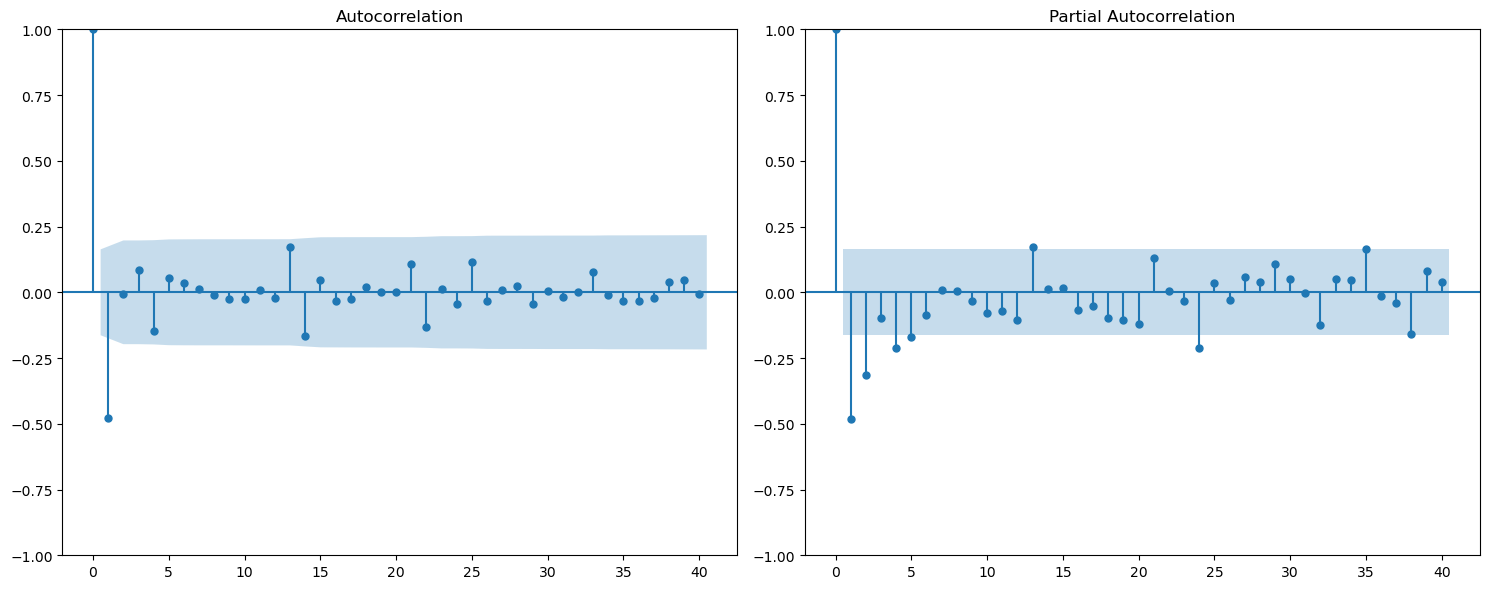

In [94]:
#plotting acf and pacf
fig = plt.figure(figsize=(15, 6))

# Show ACF
ax1 = fig.add_subplot(121)
plot_acf(prdt_vid_diff, lags=40, ax=ax1)

# Show PACF
ax2 = fig.add_subplot(122)
plot_pacf(prdt_vid_diff, lags=40, ax=ax2)

plt.tight_layout()

from the graph, we can see that in acf plot, AR(p) value as 2 and from pacf plot, MA(q) value as 3.

From these values, we get p,d,q values and do trial and error for best model with ljung box test and aic score

## split the data into train and test

In [49]:
ss = int(0.7 * len(prdt_vid))                                #finding the length of train

train = prdt_vid['polar'].iloc[:ss]                          #indexing the train data
test = prdt_vid['polar'].iloc[ss:]                           #indexing the test data
print("train = {}, test = {}".format(len(train), len(test)))

train = 101, test = 44


In [50]:
#choosing the best values after looking for best aic and check for goodness on trial and error
p=2
d=1
q=3

## Building the sarima model

In [51]:
model_ma = SARIMAX(train, order=(p,d,q),seasonal_order=(p,d,q,12))   #Building the model with seasonal components
model_fitted = model_ma.fit()                                        #fitting the model
print(model_fitted.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              polar   No. Observations:                  101
Model:             SARIMAX(2, 1, 3)x(2, 1, 3, 12)   Log Likelihood                  50.974
Date:                            Wed, 03 May 2023   AIC                            -79.947
Time:                                    09:50:29   BIC                            -52.696
Sample:                                04-30-2006   HQIC                           -68.969
                                     - 08-31-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5151      0.415     -1.241      0.215      -1.329       0.298
ar.L2          0.1791      0.350   

## Using Ljung box method to find the goodness of the model

In [118]:
lj_pval=sm.stats.acorr_ljungbox(model_fitted.resid,lags=[1],return_df=True)['lb_pvalue'].values[0]
if lj_pval>0.05:
    print('good model')
else:
    print('bad model')

good model


After finding a good model, the model is predicted for the length of test data as below

In [33]:
pred=model_fitted.predict(len(train),len(train)+len(test))   #predicting the data from end of train data upto length of test data 
pred

2014-09-30    0.198488
2014-10-31    0.203746
2014-11-30    0.350783
2014-12-31    0.134321
2015-01-31    0.412007
2015-02-28    0.251101
2015-03-31    0.310637
2015-04-30    0.336755
2015-05-31    0.263853
2015-06-30    0.366393
2015-07-31    0.395216
2015-08-31    0.266472
2015-09-30    0.242237
2015-10-31    0.277657
2015-11-30    0.356849
2015-12-31    0.164962
2016-01-31    0.332138
2016-02-29    0.330797
2016-03-31    0.335608
2016-04-30    0.388461
2016-05-31    0.290925
2016-06-30    0.345588
2016-07-31    0.362501
2016-08-31    0.291032
2016-09-30    0.254345
2016-10-31    0.337197
2016-11-30    0.421977
2016-12-31    0.316606
2017-01-31    0.384638
2017-02-28    0.385180
2017-03-31    0.398943
2017-04-30    0.464361
2017-05-31    0.332136
2017-06-30    0.341954
2017-07-31    0.429421
2017-08-31    0.282509
2017-09-30    0.257928
2017-10-31    0.344145
2017-11-30    0.487658
2017-12-31    0.397048
2018-01-31    0.518390
2018-02-28    0.386846
2018-03-31    0.449258
2018-04-30 

## Creating a dataset with actual test data and predicted data

In [34]:
actual,predicted=[],[]                  #Lists for actual and predicted data
for i in range(len(pred)-1):
    actual.append(test.iloc[i])         #adding actual data to actual list
    predicted.append(pred.iloc[i])      #adding pred data to predicted list
new_df=pd.DataFrame({'actual':actual,'predicted':predicted})     #creating dataframe with both lists
new_df['error']=new_df['actual'] - new_df['predicted']           #finding difference of actual and pred data as error data in same dataframe

## Plotting the actual and pred data to visualize the spread of data

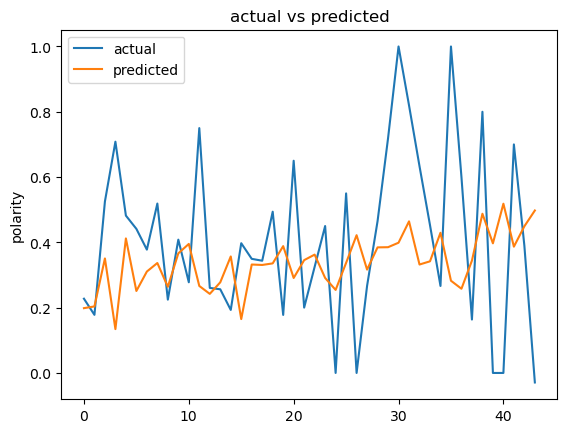

In [35]:
new_df[['actual','predicted']].plot()
plt.title('actual vs predicted')
plt.ylabel('polarity')
plt.show()

There is not much difference between actual and predicted values and the data follows similar pattern as the test data

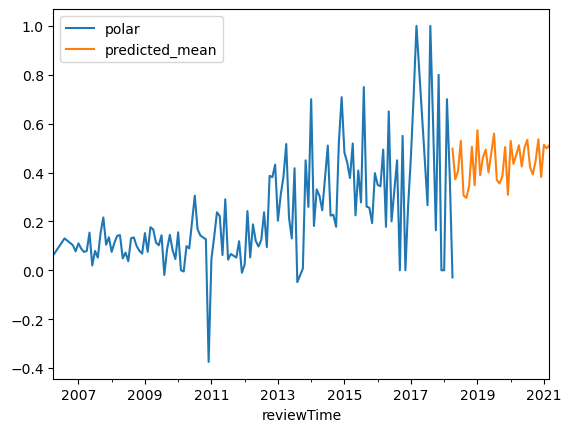

In [36]:
frst=model_fitted.predict(len(prdt_vid_diff),len(prdt_vid_diff)+35)      #predicting the model for next 36 values
prdt_vid['polar'].plot(legend=True)                                 #plotting actual data 
frst.plot(legend=True)                                                   #plotting forecast data in the same plot
plt.show()

# ML Classification Modelling on Video games dataset

In [170]:
#Loading the main data
vid_df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewText,polar,sentiment,brand,main_cat,price
0,5,True,2015-10-17,A1HP7NVNPFMA4N,0700026657,game bit hard hang great,0.036111,positive,Ubisoft,Video Games,7.95
1,4,False,2015-07-27,A1JGAP0185YJI6,0700026657,play alright steam bit trouble game steam hard...,-0.198333,negative,Ubisoft,Video Games,7.95
2,3,True,2015-02-23,A1YJWEXHQBWK2B,0700026657,ok game,0.050000,positive,Ubisoft,Video Games,7.95
3,2,True,2015-02-20,A2204E1TH211HT,0700026657,find game bit complicated expect having play,-0.450000,negative,Ubisoft,Video Games,7.95
4,5,True,2014-12-25,A2RF5B5H74JLPE,0700026657,great game love play arrive,0.300000,positive,Ubisoft,Video Games,7.95


In [25]:
#Taking the x independent variable
x=vid_df.reviewText

#Label encoding the data into classes and taking it as y target variable
le=LabelEncoder()
y=pd.Series(le.fit_transform(vid_df['sentiment']))

#Printing the labels of classes in target variable
print(le.fit(vid_df['sentiment']).classes_)

['negative' 'neutral' 'positive']


### Split the data into train and test

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, random_state = 1)

### Printing the shape of train and test data

In [27]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(28473,)
(7119,)
(28473,)
(7119,)


### Vectorization of test and train data

In [28]:
myvector = TfidfVectorizer()
x_train_tfi = myvector.fit_transform(x_train)        #vectorizing and fitting train data
x_test_tfi=myvector.transform(x_test)                #vectorizing and fitting test data

# logistic regression

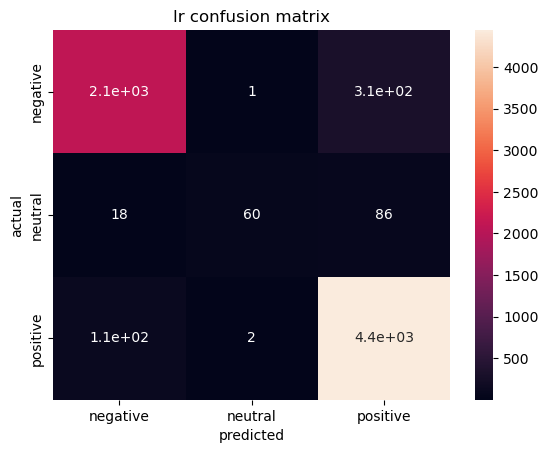

In [29]:
#building the model
lrmodel=LogisticRegression(multi_class='ovr')
lrmodel=lrmodel.fit(x_train_tfi,y_train)

#predicting the model
y_pred_lr = lrmodel.predict(x_test_tfi)

#confusion matrix
cm_lr=confusion_matrix(y_test,y_pred_lr)
sb.heatmap(cm_lr,annot=True,xticklabels=['negative','neutral','positive'],yticklabels=['negative','neutral','positive'])
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('lr confusion matrix')
plt.show()

## Calculating model scores

In [30]:
#accuracy score
ac_lr=accuracy_score(y_test,y_pred_lr)

#precision score
pr_lr=precision_score(y_test,y_pred_lr,average='weighted')

#recall score
re_lr=recall_score(y_test,y_pred_lr,average='weighted')

#f1 score
f1_lr=f1_score(y_test,y_pred_lr,average='weighted')

#train accuracy
y_pred_lrt = lrmodel.score(x_train_tfi,y_train)

print('train accuracy of logistic regression',y_pred_lrt)
print('accuracy of logistic regression',ac_lr)
print('precision of logistic regression',pr_lr)
print('recall score of logistic regression',re_lr)
print('f1 score of logistic regression',f1_lr)

train accuracy of logistic regression 0.9545183155972324
accuracy of logistic regression 0.9252704031465093
precision of logistic regression 0.9263510709383188
recall score of logistic regression 0.9252704031465093
f1 score of logistic regression 0.9217809410908444


## Plotting the roc curve

auc 0.983918036994516


[]

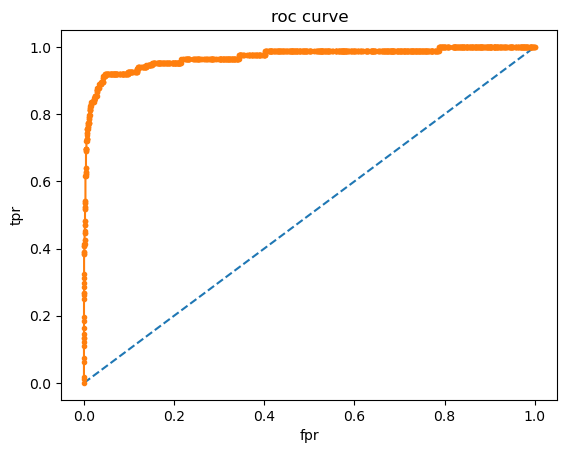

In [31]:
auc_lr=roc_auc_score(y_test,lrmodel.predict_proba(x_test_tfi),multi_class='ovr',average='weighted')
print('auc',auc_lr)

#roc curve
lr_probs=lrmodel.predict_proba(x_test_tfi)
lr_auc=roc_auc_score(y_test,lr_probs,multi_class='ovr',average='weighted')
lr_fpr,lr_tpr,_=roc_curve(y_test,lr_probs[:,1],pos_label=1)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(lr_fpr,lr_tpr,marker='.')
plt.title('roc curve')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot()

# Multinomial naive bayes 

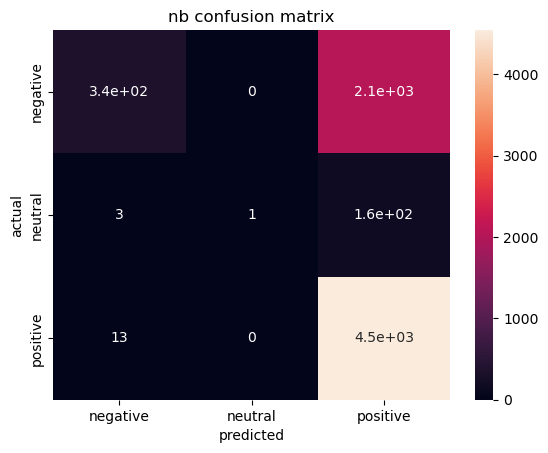

In [32]:
#building the model
nbmodel=MultinomialNB()
nbmodel=nbmodel.fit(x_train_tfi,y_train)

#predicting the model
y_pred_nb = nbmodel.predict(x_test_tfi)

#confusion matrix
cm_nb=confusion_matrix(y_test,y_pred_nb)
sb.heatmap(cm_nb,annot=True,xticklabels=['negative','neutral','positive'],yticklabels=['negative','neutral','positive'])
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('nb confusion matrix')
plt.show()

## Calculating model scores

In [33]:
#accuracy score
ac_nb=accuracy_score(y_test,y_pred_nb)

#precision score
pr_nb=precision_score(y_test,y_pred_nb,average='weighted')

#recall score
re_nb=recall_score(y_test,y_pred_nb,average='weighted')

#f1 score
f1_nb=f1_score(y_test,y_pred_nb,average='weighted')

#train accuracy
y_pred_nbt = nbmodel.score(x_train_tfi,y_train)

print('train accuracy of naive bayes algorithm',y_pred_nbt)
print('accuracy of naive bayes algorithm',ac_nb)
print('precision of naive bayes algorithm',pr_nb)
print('recall score of naive bayes algorithm',re_nb)
print('f1 score of naive bayes algorithm',f1_nb)

train accuracy of naive bayes algorithm 0.7009096336880554
accuracy of naive bayes algorithm 0.6866132883831999
precision of naive bayes algorithm 0.7751629192287337
recall score of naive bayes algorithm 0.6866132883831999
f1 score of naive bayes algorithm 0.5980955189597538


## Plotting roc curve

auc 0.8658836329527635


[]

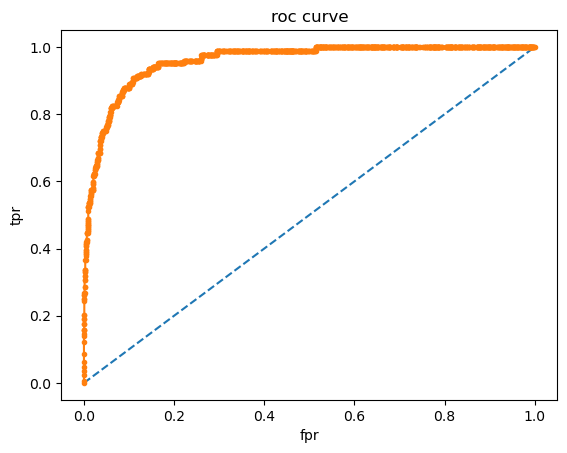

In [34]:
#auc score
auc_nb=roc_auc_score(y_test,nbmodel.predict_proba(x_test_tfi),multi_class='ovr',average='weighted')
print('auc',auc_nb)

#roc curve
nb_probs=nbmodel.predict_proba(x_test_tfi)
nb_auc=roc_auc_score(y_test,nb_probs,multi_class='ovr',average='weighted')
nb_fpr,nb_tpr,_=roc_curve(y_test,nb_probs[:,1],pos_label=1)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(nb_fpr,nb_tpr,marker='.')
plt.title('roc curve')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot()

# Ada boost classification

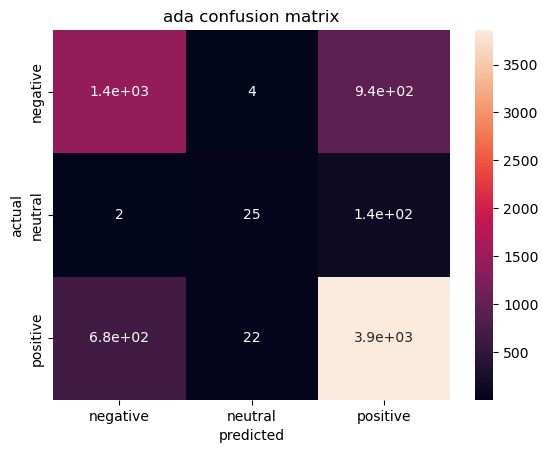

In [35]:
#building the model
admodel=AdaBoostClassifier()
admodel=admodel.fit(x_train_tfi,y_train)

#predicting the model
y_pred_ad = admodel.predict(x_test_tfi)

#confusion matrix
cm_ad=confusion_matrix(y_test,y_pred_ad)
sb.heatmap(cm_ad,annot=True,xticklabels=['negative','neutral','positive'],yticklabels=['negative','neutral','positive'])
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('ada confusion matrix')
plt.show()

## Calculating model scores

In [36]:
#accuracy score
ac_ad=accuracy_score(y_test,y_pred_ad)

#precision score
pr_ad=precision_score(y_test,y_pred_ad,average='weighted')

#recall score
re_ad=recall_score(y_test,y_pred_ad,average='weighted')

#f1 score
f1_ad=f1_score(y_test,y_pred_ad,average='weighted')

#train accuracy
y_pred_adt = admodel.score(x_train_tfi,y_train)

print('train accuracy of adaboost algorithm',y_pred_adt)
print('accuracy of adaboost algorithm',ac_ad)
print('precision of adaboost algorithm',pr_ad)
print('recall score of adaboost algorithm',re_ad)
print('f1 score of adaboost algorithm',f1_ad)

train accuracy of adaboost algorithm 0.7597372949812102
accuracy of adaboost algorithm 0.7489815985391206
precision of adaboost algorithm 0.7405634518527228
recall score of adaboost algorithm 0.7489815985391206
f1 score of adaboost algorithm 0.7411102153428717


## Plotting roc curve

auc 0.6049027388168751


[]

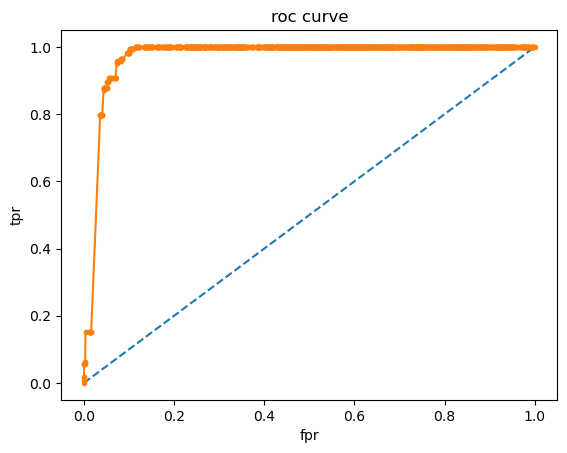

In [37]:
#auc score
auc_ad=roc_auc_score(y_test,admodel.predict_proba(x_test_tfi),multi_class='ovr',average='weighted')
print('auc',auc_ad)

#roc curve
ad_probs=admodel.predict_proba(x_test_tfi)
ad_auc=roc_auc_score(y_test,ad_probs,multi_class='ovr',average='weighted')
ad_fpr,ad_tpr,_=roc_curve(y_test,ad_probs[:,1],pos_label=1)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(ad_fpr,ad_tpr,marker='.')
plt.title('roc curve')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot()

# Knn algorithm

f1 value for K=  1 :is 0.8435954616496781
f1 value for K=  2 :is 0.5009519238272804
f1 value for K=  3 :is 0.2847336574124361
f1 value for K=  4 :is 0.2577321207747868
f1 value for K=  5 :is 0.2584416063218669
f1 value for K=  6 :is 0.22710538878224049
f1 value for K=  7 :is 0.2141434912122566
f1 value for K=  8 :is 0.20038851725708628
f1 value for K=  9 :is 0.19641765342013948
f1 value for K=  10 :is 0.18520531370624704


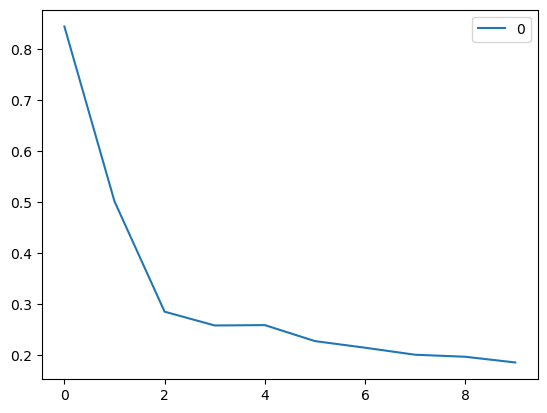

In [192]:
#To find the best value of k for knn algorithm
f1_val = []  
for K in range(10):
    K = K + 1
    model1 = KNeighborsClassifier(n_neighbors=K)            #building the model
    
    model1.fit(x_train_tfi, y_train)       
    y_pred1 = model1.predict(x_test_tfi)                   #predict for test data
    f1 = f1_score(y_test, y_pred1,average='weighted')      #calculating f1 score
    f1_val.append(f1)            
    print('f1 value for K= ', K, ':is', f1)
# Plot the Graph for K Values
curve = pd.DataFrame(f1_val)  # Elbow Curve
curve.plot()
plt.show()

From the elbow curve, we can get the best k value based on f1 score as k=2

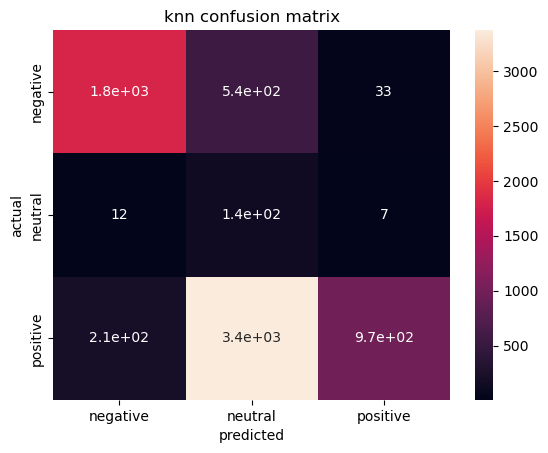

In [38]:
#building the model
knmodel=KNeighborsClassifier(n_neighbors=2)
knmodel=knmodel.fit(x_train_tfi,y_train)

#predicting the model
y_pred_kn = knmodel.predict(x_test_tfi)

#confusion matrix
cm_kn=confusion_matrix(y_test,y_pred_kn)
sb.heatmap(cm_kn,annot=True,xticklabels=['negative','neutral','positive'],yticklabels=['negative','neutral','positive'])
plt.title('knn confusion matrix')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

## Calculating model scores

In [39]:
#accuracy score
ac_kn=accuracy_score(y_test,y_pred_kn)

#precision score
pr_kn=precision_score(y_test,y_pred_kn,average='weighted')

#recall score
re_kn=recall_score(y_test,y_pred_kn,average='weighted')

#f1 score
f1_kn=f1_score(y_test,y_pred_kn,average='weighted')

#train accuracy
y_pred_knt = knmodel.score(x_train_tfi,y_train)

print('train accuracy of knn algorithm',y_pred_knt)
print('accuracy of knn algorithm',ac_kn)
print('precision score of knn algorithm',pr_kn)
print('recall score of knn algorithm',re_kn)
print('f1 score of knn algorithm',f1_kn)

train accuracy of knn algorithm 0.8600077266181997
accuracy of knn algorithm 0.41255794353139486
precision score of knn algorithm 0.9154330032113998
recall score of knn algorithm 0.41255794353139486
f1 score of knn algorithm 0.5009519238272804


## Plotting roc curve

auc 0.8493314224088345


[]

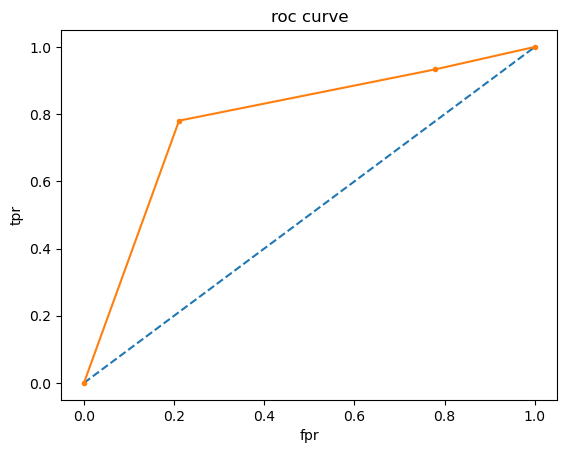

In [40]:
#auc score
auc_kn=roc_auc_score(y_test,knmodel.predict_proba(x_test_tfi),multi_class='ovr',average='weighted')
print('auc',auc_kn)

#roc curve
kn_probs=knmodel.predict_proba(x_test_tfi)
kn_auc=roc_auc_score(y_test,kn_probs,multi_class='ovr',average='weighted')
kn_fpr,kn_tpr,_=roc_curve(y_test,kn_probs[:,1],pos_label=1)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(kn_fpr,kn_tpr,marker='.')
plt.title('roc curve')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot()

auc 0.9935532093644704


[]

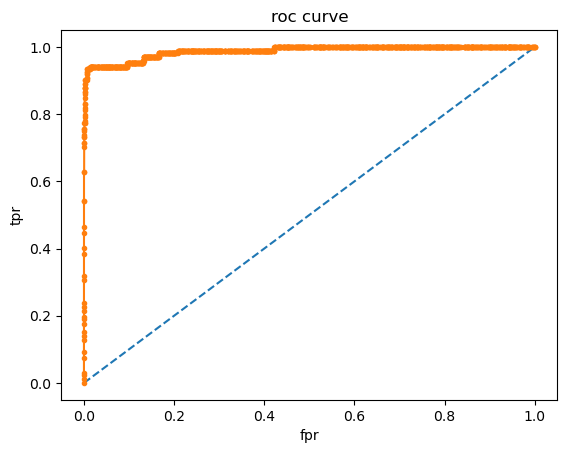

In [199]:
#auc score
auc_st=roc_auc_score(y_test,stmodel.predict_proba(x_test_tfi),multi_class='ovr',average='weighted')
print('auc',auc_st)

#roc curve
st_probs=stmodel.predict_proba(x_test_tfi)
st_auc=roc_auc_score(y_test,st_probs,multi_class='ovr',average='weighted')
st_fpr,st_tpr,_=roc_curve(y_test,st_probs[:,1],pos_label=1)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(st_fpr,st_tpr,marker='.')
plt.title('roc curve')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot()

## Creating a dataframe with all model scores

In [41]:
df_acc=pd.DataFrame()
df_acc['test accuracy']=[ac_lr,ac_nb,ac_kn,ac_ad]
df_acc['precision']=[pr_lr,pr_nb,pr_kn,pr_ad]
df_acc['recall']=[re_lr,re_nb,re_kn,re_ad]
df_acc['f1 score']=[f1_lr,f1_nb,f1_kn,f1_ad]
df_acc['train accuracy']=[y_pred_lrt,y_pred_nbt,y_pred_knt,y_pred_adt]
df_acc.rename(index={0:'logistic regression',1:'naive bayes',2:'knn',3:'ada boost'},inplace=True)

## Plotting all model scores

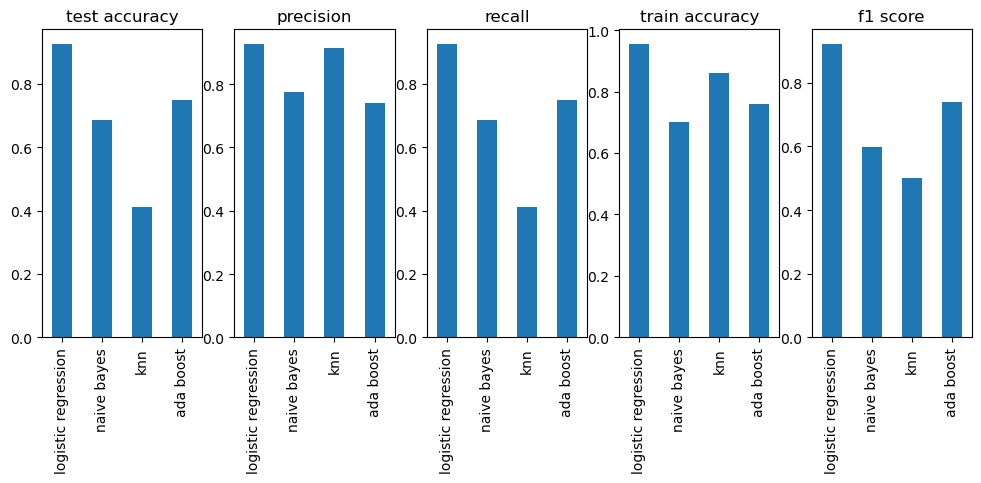

In [42]:
plt.figure(figsize=(12,4))
plt.subplot(151)
plt.title('test accuracy')
df_acc['test accuracy'].plot(kind='bar')

plt.subplot(152)
plt.title('precision')
df_acc['precision'].plot(kind='bar')

plt.subplot(153)
plt.title('recall')
df_acc['recall'].plot(kind='bar')

plt.subplot(154)
plt.title('train accuracy')
df_acc['train accuracy'].plot(kind='bar')

plt.subplot(155)
plt.title('f1 score')
df_acc['f1 score'].plot(kind='bar')
plt.show()

## Observations:

   ### From the above plots, we can see that Logistic regression with multiclass ovr classifier is the best model for prediction in terms of accuracy, f1 score and other scores.
   
   ### Also based on confusion matrix and AUC score, we can say that logistic regression is the best model for predicting the sentiment of customers similar to Toy data.

# GUI

#### Importing the requird libraries

In [206]:
from tkinter import *
import re
import pandas as pd
import joblib as jb
from sklearn.feature_extraction.text import TfidfVectorizer

#### Taking the logistic regression classifier as best model we create the gui

In [212]:
tk=Tk()
tk.title("Product Feedback")

#adding labels 
label=Label(tk,text="Give your valuable feedback ")
label.pack()

#adding entry block
block = Entry(tk,width=60)
block.pack()

#adding output
outcome=Label(tk,text="",pady=10)
outcome.pack()


def feedback_type():
    rtext=block.get()
    
    #Remove punctuation
    rtext=re.sub('[^\w\s]','',rtext)
    #Remove hashtags
    rtext=re.sub('#\W+','',rtext)
    # Remove all non-letters and non-spaces
    rtext = re.sub("[^a-zA-Z0-9\s ]",'', rtext)
    # Remove all numbers
    rtext = re.sub("\d+", "", rtext)
    #Remove underscore
    rtext=re.sub('_','',rtext)
    #Remove urls
    rtext=re.sub('http\S+','',rtext)
    #Remove html tags
    rtext=re.sub('<.*?>','',rtext)
    # Remove all hyphens except between two words
    rtext = re.sub("-(?!\w)|(?<!\w)-", "", rtext)
    # Remove multiple spaces and lowercase everything
    rtext =re.sub('\s+',' ',rtext)
    rtext=rtext.lower()
    #vectorizing the data
    rtext_vec=myvector.transform([rtext])
    #predicting the target text
    pred=lrmodel.predict(rtext_vec)
    #outcome configuration
    if pred==0:
        outcome.configure(text='Negative')
    elif pred==1:
        outcome.configure(text='neutral')
    else:
        outcome.configure(text='positive')
#creating dialog box with def function        
icon=Button(tk,text='Sentiment',command=feedback_type)
icon.pack()

#calling the dialog box
tk.mainloop()

#### We can use the above function to predict the sentiment of a particular review in a fraction of a second

# CONCLUSION


 ##### Among the six Classification models we have tried, **logistic Regression**(94% accuracy) model performs the best prediction over the Toy & Video Games dataset. Among the features we have tried, product average overall rating, number of review of product, product price, and product sales ranking are having positive efect to the testing results. 
 #### The parameters of these features show that the product average overall rating has the largest efect to the product rating, which indicated that most users preferences on Video Games and Toys are similar.

#### Among the sentiment analysis, we can see that nearly 64.6k customers have positive sentiment, nearly 31.6k customers have negative sentiment and 3.7k customers have neutral sentiment which means we need to focus on the those 40 k customers who are in neutral and negative. Amazon should analyze where the actual flaws are, whether they are in Products or they are in quality of service including user interfaces. We can also conclude that so much irrelevant reviews are making more helpful reviews unfindable. So reviewers should review properly so that it can add value to someone's purchases. 







